# Telecom Churn Case Study

<font size=4 color='blue'>The Major Steps involved are:-</font>
<font size=4 color='brown'>
- Reading the Dataset.
- Missing value Analysis and Imputation.
- High Value Customers Filtering.
- Tagging the Customers as Churned
- Data Preparation.
- Model Building     
    
</font>

## <font color='brown'> Importing the Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
# import library for splitting train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

## <font color='brown'> Reading the Dataset</font>

Since, our dataset have too many rows and columns, we change the default setting to view them

In [2]:
# to display all rows and colums
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.reset_option('^display.')

Importing DataSet

In [3]:
df_telecom = pd.read_csv("D:/Telecom Churn Case Study/telecom_churn_data.csv")

In [4]:
print(df_telecom.shape[0],'- Rows and ', df_telecom.shape[1],'- Columns')

99999 - Rows and  226 - Columns


## <font color='brown'> Missing values Analysis</font>

Missing values percentage columns-wise

In [5]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# pd.set_option('display.max_rows', 500)
round(100*(df_telecom.isnull().sum()/len(df_telecom.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

Check the distinct values for few of the major missing values coulmns <br>
And check wheather we can impute them, by some means

In [7]:
df_telecom['count_rech_2g_6'].unique()

array([ 0., nan,  1.,  3.,  4.,  2.,  7.,  8., 12.,  5., 16., 11.,  6.,
       10., 20.,  9., 18., 19., 22., 14., 17., 13., 15., 21., 25., 32.,
       39., 24., 28., 30., 42., 34.])

In [8]:
df_telecom['date_of_last_rech_data_6'].unique()

array(['6/21/2014', nan, '6/4/2014', '6/27/2014', '6/30/2014', '6/6/2014',
       '6/2/2014', '6/12/2014', '6/19/2014', '6/29/2014', '6/5/2014',
       '6/17/2014', '6/11/2014', '6/25/2014', '6/10/2014', '6/20/2014',
       '6/23/2014', '6/13/2014', '6/26/2014', '6/16/2014', '6/14/2014',
       '6/24/2014', '6/28/2014', '6/15/2014', '6/9/2014', '6/22/2014',
       '6/1/2014', '6/8/2014', '6/7/2014', '6/18/2014', '6/3/2014'],
      dtype=object)

In [9]:
df_telecom['count_rech_3g_6'].unique()

array([ 1., nan,  0.,  5.,  3.,  2.,  8.,  4.,  6., 10., 22.,  7., 13.,
       11., 29., 16., 18., 12., 19.,  9., 23., 14., 17., 15., 21., 28.])

In [10]:
df_telecom['av_rech_amt_data_6'].unique()

array([2.5200e+02,        nan, 5.6000e+01, 1.5400e+02, 6.4000e+01,
       1.0570e+03, 2.7400e+02, 1.9800e+02, 8.6000e+01, 1.4000e+01,
       3.0800e+02, 1.3110e+03, 1.7900e+02, 7.5000e+01, 9.8000e+01,
       1.2500e+02, 1.3700e+02, 2.0300e+02, 1.4500e+02, 1.5000e+02,
       5.0000e+01, 2.8500e+02, 4.6000e+01, 3.0400e+02, 2.3000e+01,
       3.9600e+02, 1.7000e+01, 5.0400e+02, 9.1000e+01, 1.7500e+02,
       1.8200e+02, 1.8900e+02, 2.5000e+01, 2.0400e+02, 1.1500e+02,
       6.5500e+02, 1.6400e+02, 3.4000e+01, 1.4900e+02, 2.9000e+01,
       1.7700e+02, 1.0000e+02, 3.3000e+01, 6.8000e+01, 4.0000e+02,
       8.1000e+01, 2.2400e+02, 2.7500e+02, 1.9600e+02, 3.2300e+02,
       8.2000e+01, 6.6660e+01, 4.5500e+02, 3.0000e+02, 8.8000e+01,
       9.6000e+01, 1.6900e+02, 4.5000e+01, 8.0000e+00, 2.9000e+02,
       7.5600e+02, 2.6300e+02, 7.8000e+01, 1.0100e+02, 2.2900e+02,
       6.7000e+01, 9.2000e+01, 2.5000e+02, 1.2300e+02, 2.1200e+02,
       7.0100e+02, 2.8000e+01, 4.5300e+02, 3.7900e+02, 1.0000e

In [11]:
df_telecom['max_rech_data_6'].unique()

array([2.520e+02,       nan, 5.600e+01, 1.540e+02, 2.500e+01, 2.740e+02,
       1.980e+02, 2.300e+01, 1.400e+01, 6.550e+02, 9.800e+01, 1.250e+02,
       4.100e+01, 1.450e+02, 4.600e+01, 1.520e+02, 1.700e+01, 4.900e+01,
       9.100e+01, 1.790e+02, 1.490e+02, 2.900e+01, 1.770e+02, 4.550e+02,
       8.000e+00, 1.000e+00, 3.300e+01, 1.500e+01, 5.050e+02, 4.800e+01,
       2.020e+02, 4.490e+02, 6.100e+01, 2.200e+01, 5.200e+01, 7.550e+02,
       5.000e+00, 1.010e+02, 9.000e+00, 9.510e+02, 2.950e+02, 1.555e+03,
       1.505e+03, 8.550e+02, 9.950e+02, 1.300e+01, 1.255e+03, 1.480e+02,
       4.950e+02])

In [12]:
df_telecom['total_rech_data_6'].unique()

array([ 1., nan,  3.,  5.,  4.,  2.,  6.,  8.,  7., 12., 16., 11., 10.,
       14., 20.,  9., 18., 29., 23., 15., 22., 27., 17., 21., 13., 19.,
       35., 25., 33., 61., 55., 24., 26., 28., 40., 32., 46., 34.])

In [13]:
df_telecom['arpu_3g_6'].unique()

array([212.17,    nan,   0.  , ...,  76.93, 141.48, 235.68])

In [14]:
df_telecom['arpu_2g_6'].unique()

array([212.17,    nan,   0.  , ...,  91.82,  36.14,  18.68])

In [15]:
df_telecom['night_pck_user_6'].unique()

array([ 0., nan,  1.])

In [16]:
df_telecom['fb_user_6'].unique()

array([ 1., nan,  0.])

In [17]:
df_telecom['arpu_3g_7'].unique()

array([212.17,   0.  ,    nan, ..., 448.  , 105.64, 262.65])

In [18]:
df_telecom['count_rech_2g_7'].unique()

array([ 0.,  1., nan,  2.,  5., 12.,  7.,  3.,  6., 10.,  8.,  4., 16.,
       11.,  9., 13., 15., 29., 22., 14., 23., 17., 21., 19., 20., 18.,
       26., 27., 30., 25., 28., 31., 32., 48., 43., 35., 24.])

In [19]:
df_telecom['fb_user_7'].unique()

array([ 1., nan,  0.])

In [20]:
df_telecom['count_rech_3g_7'].unique()

array([ 1.,  0., nan,  2.,  8.,  4.,  3.,  5.,  7., 20., 15.,  6., 10.,
       12., 17., 23., 22., 11.,  9., 13., 19., 14., 21., 24., 18., 35.,
       34., 16., 31.])

In [21]:
df_telecom['arpu_2g_7'].unique()

array([212.17,  28.61,    nan, ...,  57.57,  79.27,   8.43])

In [22]:
df_telecom['av_rech_amt_data_7'].unique()

array([2.5200e+02, 1.5400e+02,        nan, 1.7700e+02, 3.5600e+02,
       5.0000e+01, 2.5530e+03, 4.1000e+01, 1.1500e+02, 1.7000e+01,
       3.0000e+02, 6.5500e+02, 4.5500e+02, 9.8000e+01, 3.0800e+02,
       1.1900e+02, 1.9600e+02, 1.9800e+02, 1.0800e+02, 1.4500e+02,
       2.8500e+02, 3.0400e+02, 2.7500e+02, 1.5000e+02, 2.5000e+01,
       1.1600e+02, 9.1000e+01, 2.9000e+02, 7.5600e+02, 2.6800e+02,
       3.5800e+02, 2.0000e+02, 2.0500e+02, 1.0000e+02, 6.9000e+01,
       1.4000e+01, 8.2000e+01, 4.2000e+01, 2.4400e+02, 1.3200e+02,
       1.7900e+02, 3.2000e+01, 7.0000e+01, 5.0400e+02, 3.9000e+01,
       3.8900e+02, 7.5000e+01, 2.7400e+02, 7.0700e+02, 7.7000e+02,
       5.1000e+01, 1.9100e+02, 2.4800e+02, 1.1700e+02, 1.4900e+02,
       2.5900e+02, 8.5000e+01, 1.4400e+02, 6.7000e+01, 1.0300e+02,
       1.8600e+02, 2.9600e+02, 2.3000e+01, 2.2100e+02, 2.9900e+02,
       1.7240e+03, 4.6000e+01, 2.7700e+02, 3.9600e+02, 7.2000e+01,
       3.4000e+01, 1.2950e+02, 5.5000e+02, 3.4800e+02, 4.0500e

In [23]:
df_telecom['max_rech_data_7'].unique()

array([2.520e+02, 1.540e+02,       nan, 1.790e+02, 2.500e+01, 1.255e+03,
       4.100e+01, 2.300e+01, 1.700e+01, 6.550e+02, 4.550e+02, 9.800e+01,
       1.980e+02, 1.450e+02, 1.520e+02, 1.770e+02, 2.900e+01, 9.100e+01,
       1.400e+01, 4.800e+01, 8.000e+00, 2.740e+02, 1.490e+02, 4.600e+01,
       4.900e+01, 3.300e+01, 1.250e+02, 4.490e+02, 5.600e+01, 1.000e+00,
       2.020e+02, 5.000e+00, 2.200e+01, 5.050e+02, 5.200e+01, 9.000e+00,
       7.550e+02, 1.010e+02, 6.100e+01, 1.500e+01, 1.555e+03, 9.510e+02,
       8.550e+02, 1.300e+01, 2.950e+02, 1.505e+03, 9.950e+02, 6.750e+02,
       7.950e+02])

In [24]:
df_telecom['night_pck_user_7'].unique()

array([ 0., nan,  1.])

In [25]:
df_telecom['total_rech_data_7'].unique()

array([ 1., nan,  2.,  8.,  5., 12.,  7.,  4.,  6.,  3., 10., 16., 11.,
        9., 13., 29., 15., 42., 17., 14., 23., 22., 20., 19., 21., 32.,
       25., 18., 26., 24., 48., 35., 30., 27., 43., 31., 39., 44., 40.,
       50., 34., 37., 54.])

In [26]:
df_telecom['date_of_last_rech_data_7'].unique()

array(['7/16/2014', '7/25/2014', nan, '7/31/2014', '7/23/2014',
       '7/7/2014', '7/27/2014', '7/2/2014', '7/28/2014', '7/12/2014',
       '7/4/2014', '7/5/2014', '7/6/2014', '7/26/2014', '7/19/2014',
       '7/10/2014', '7/11/2014', '7/29/2014', '7/18/2014', '7/9/2014',
       '7/24/2014', '7/14/2014', '7/13/2014', '7/22/2014', '7/30/2014',
       '7/20/2014', '7/21/2014', '7/15/2014', '7/8/2014', '7/17/2014',
       '7/1/2014', '7/3/2014'], dtype=object)

In [27]:
df_telecom['night_pck_user_9'].unique()

array([nan,  0.,  1.])

In [28]:
df_telecom['date_of_last_rech_data_9'].unique()

array([nan, '9/17/2014', '9/1/2014', '9/9/2014', '9/21/2014', '9/10/2014',
       '9/26/2014', '9/12/2014', '9/29/2014', '9/6/2014', '9/20/2014',
       '9/23/2014', '9/3/2014', '9/30/2014', '9/8/2014', '9/27/2014',
       '9/28/2014', '9/24/2014', '9/14/2014', '9/18/2014', '9/19/2014',
       '9/2/2014', '9/22/2014', '9/25/2014', '9/16/2014', '9/15/2014',
       '9/13/2014', '9/5/2014', '9/4/2014', '9/7/2014', '9/11/2014'],
      dtype=object)

In [29]:
df_telecom['fb_user_9'].unique()

array([nan,  1.,  0.])

In [30]:
df_telecom['arpu_2g_9'].unique()

array([       nan, 0.0000e+00, 4.6000e-01, ..., 5.9556e+02, 1.0237e+02,
       7.2568e+02])

In [31]:
df_telecom['max_rech_data_9'].unique()

array([      nan, 4.600e+01, 1.700e+01, 2.520e+02, 2.740e+02, 6.550e+02,
       1.490e+02, 2.300e+01, 1.450e+02, 1.790e+02, 8.000e+00, 9.800e+01,
       1.540e+02, 7.550e+02, 1.980e+02, 2.500e+01, 1.750e+02, 1.520e+02,
       5.600e+01, 2.900e+01, 9.100e+01, 1.250e+02, 1.640e+02, 4.550e+02,
       4.100e+01, 2.020e+02, 3.300e+01, 2.480e+02, 4.900e+01, 2.200e+01,
       1.400e+01, 1.000e+00, 4.490e+02, 3.480e+02, 4.800e+01, 2.950e+02,
       5.050e+02, 5.000e+00, 9.510e+02, 1.555e+03, 1.300e+01, 1.010e+02,
       5.200e+01, 9.000e+00, 8.550e+02, 9.950e+02, 1.255e+03, 1.500e+01,
       4.950e+02, 7.950e+02, 1.505e+03])

In [32]:
df_telecom['arpu_3g_9'].unique()

array([   nan,   2.84,   0.  , ..., 803.83,  42.89, 725.69])

In [33]:
df_telecom['total_rech_data_9'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  7., 12.,  9., 11., 14.,
       33., 10., 84., 13., 27., 32., 20., 18., 19., 24., 16., 21., 26.,
       15., 30., 17., 41., 38., 40., 31., 52., 22., 23., 51., 28.])

In [34]:
df_telecom['av_rech_amt_data_9'].unique()

array([       nan, 4.6000e+01, 1.7000e+01, 2.5200e+02, 4.2800e+02,
       9.0700e+02, 1.4900e+02, 6.9000e+01, 1.4500e+02, 1.7900e+02,
       2.4000e+01, 5.7800e+02, 1.9600e+02, 1.5400e+02, 7.5500e+02,
       2.3000e+01, 2.9000e+02, 1.3800e+02, 1.3600e+02, 3.2700e+02,
       1.4300e+02, 2.9800e+02, 2.2100e+02, 4.3100e+02, 1.7500e+02,
       5.5400e+02, 3.0400e+02, 1.1200e+02, 5.0000e+01, 3.5800e+02,
       5.0400e+02, 1.9800e+02, 7.5000e+01, 2.5000e+01, 2.7200e+02,
       5.8000e+01, 9.1000e+01, 9.8000e+01, 2.1800e+02, 1.2300e+02,
       1.2500e+02, 1.6400e+02, 1.5000e+02, 6.0800e+02, 3.5400e+02,
       5.1000e+01, 4.5500e+02, 3.7300e+02, 5.0200e+02, 3.0000e+02,
       5.0000e+02, 4.9000e+01, 4.2900e+02, 3.3800e+02, 5.6000e+01,
       2.6200e+02, 3.4000e+01, 9.2000e+01, 3.6700e+02, 1.6900e+02,
       6.7000e+01, 1.4000e+02, 4.0600e+02, 1.5600e+02, 3.9000e+01,
       3.2900e+02, 4.2700e+02, 3.5000e+02, 3.1300e+02, 2.9900e+02,
       1.4320e+03, 3.3000e+01, 1.3200e+02, 3.7000e+02, 5.9000e

In [35]:
df_telecom['count_rech_3g_9'].unique()

array([nan,  0.,  1.,  2.,  3.,  5.,  8.,  4.,  6., 11., 49., 23.,  7.,
       10., 18., 24., 19.,  9., 21., 22., 12., 13., 15., 39., 14., 26.,
       16., 27.])

In [36]:
df_telecom['count_rech_2g_9'].unique()

array([nan,  1.,  0.,  2.,  3.,  5.,  6.,  8.,  7., 11., 12.,  4.,  9.,
       10., 14., 33., 35., 13., 22., 15., 18., 24., 21., 16., 27., 40.,
       30., 25., 32., 20., 23., 17., 19.])

In [37]:
df_telecom['fb_user_8'].unique()

array([ 1., nan,  0.])

In [38]:
df_telecom['av_rech_amt_data_8'].unique()

array([2.5200e+02, 5.0000e+01,        nan, 6.9000e+01, 3.4000e+01,
       1.5400e+02, 2.7400e+02, 2.7000e+02, 4.1000e+01, 4.5500e+02,
       2.5000e+01, 1.4500e+02, 2.1200e+02, 9.8000e+01, 2.3000e+01,
       4.0000e+02, 1.9800e+02, 1.7000e+01, 2.7700e+02, 1.1900e+02,
       1.9600e+02, 4.5200e+02, 9.2000e+01, 1.4000e+02, 2.0200e+02,
       3.2900e+02, 3.5800e+02, 1.0000e+02, 1.7900e+02, 6.0800e+02,
       2.6700e+02, 1.5000e+02, 5.1000e+01, 9.1000e+01, 1.6400e+02,
       1.1400e+02, 4.6000e+01, 1.2500e+02, 4.2500e+02, 2.9200e+02,
       3.4800e+02, 6.7000e+01, 4.8000e+01, 7.0700e+02, 1.7500e+02,
       8.2000e+01, 3.0800e+02, 2.3900e+02, 3.2000e+01, 4.5000e+02,
       1.1700e+02, 1.4000e+01, 5.0400e+02, 6.0000e+02, 1.4200e+02,
       3.0400e+02, 1.8200e+02, 4.2000e+01, 3.5000e+02, 3.0000e+02,
       2.8600e+02, 1.1200e+02, 8.4000e+01, 7.7000e+02, 3.3000e+01,
       3.2100e+02, 8.7000e+01, 1.4900e+02, 2.9900e+02, 2.0900e+02,
       1.5800e+02, 1.2530e+03, 1.1500e+02, 7.5500e+02, 5.6000e

In [39]:
df_telecom['count_rech_3g_8'].unique()

array([ 1.,  0., nan,  2.,  3.,  5.,  7.,  4., 23., 30., 13.,  6.,  8.,
       10., 24., 12., 25., 15., 16.,  9., 14., 45., 19., 21., 18., 11.,
       17., 20., 29., 42.])

In [40]:
df_telecom['count_rech_2g_8'].unique()

array([ 0.,  2., nan,  3.,  1., 16.,  7.,  4.,  5., 13., 15., 24.,  6.,
       12.,  9., 10., 14.,  8., 27., 11., 18., 29., 22., 17., 19., 26.,
       25., 21., 33., 34., 20., 44., 32., 31., 23.])

In [41]:
df_telecom['date_of_last_rech_data_8'].unique()

array(['8/8/2014', '8/10/2014', nan, '8/23/2014', '8/24/2014',
       '8/21/2014', '8/30/2014', '8/6/2014', '8/25/2014', '8/7/2014',
       '8/26/2014', '8/11/2014', '8/2/2014', '8/31/2014', '8/20/2014',
       '8/29/2014', '8/17/2014', '8/14/2014', '8/28/2014', '8/3/2014',
       '8/15/2014', '8/18/2014', '8/19/2014', '8/27/2014', '8/13/2014',
       '8/22/2014', '8/1/2014', '8/9/2014', '8/16/2014', '8/12/2014',
       '8/4/2014', '8/5/2014'], dtype=object)

In [42]:
df_telecom['total_rech_data_8'].unique()

array([ 1.,  2., nan,  3., 16.,  7.,  4.,  6.,  5., 13., 17., 15., 24.,
       14., 12.,  9.,  8., 10., 50., 11., 18., 57., 20., 28., 29., 46.,
       23., 25., 22., 26., 19., 32., 49., 42., 48., 39., 40., 34., 44.,
       27., 38., 21., 30., 33., 60., 37., 55.])

In [43]:
df_telecom['max_rech_data_8'].unique()

array([2.520e+02, 2.500e+01,       nan, 2.300e+01, 1.700e+01, 1.540e+02,
       2.740e+02, 1.790e+02, 4.100e+01, 4.550e+02, 1.450e+02, 9.800e+01,
       1.980e+02, 1.750e+02, 1.520e+02, 2.900e+01, 9.100e+01, 1.640e+02,
       4.600e+01, 8.000e+00, 1.400e+01, 3.300e+01, 1.490e+02, 5.600e+01,
       7.550e+02, 4.900e+01, 1.250e+02, 2.020e+02, 1.000e+00, 1.770e+02,
       4.490e+02, 2.480e+02, 4.800e+01, 5.200e+01, 6.550e+02, 2.950e+02,
       2.200e+01, 5.000e+00, 6.750e+02, 9.510e+02, 1.010e+02, 5.050e+02,
       8.550e+02, 1.300e+01, 1.505e+03, 6.100e+01, 1.555e+03, 1.500e+01,
       1.255e+03, 4.950e+02, 9.000e+00])

In [44]:
df_telecom['arpu_3g_8'].unique()

array([212.17,   0.  ,    nan, ...,  92.18, 229.46, 602.68])

In [45]:
df_telecom['arpu_2g_8'].unique()

array([212.17,   7.6 ,    nan, ..., 425.88, 345.9 ,  48.24])

In [46]:
df_telecom['night_pck_user_8'].unique()

array([ 0., nan,  1.])

From the above we found out that we cannot just impute the Nan value using 0, because they already have '0' as value.

In [47]:
june_columns = []
for x in df_telecom.columns:
    if '6' in x:
        june_columns.append(x)

In [48]:
df_telecom[june_columns].head(4)

last_date_of_month_6   arpu_6  onnet_mou_6  offnet_mou_6  roam_ic_mou_6  \
0            6/30/2014  197.385          NaN           NaN            NaN   
1            6/30/2014   34.047        24.11         15.74            0.0   
2            6/30/2014  167.690        11.54        143.33            0.0   
3            6/30/2014  221.338        99.91        123.31            0.0   

   roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
0            NaN               NaN               NaN               NaN   
1            0.0             23.88             11.51              0.00   
2            0.0              7.19             29.34             24.11   
3            0.0             73.68            107.43              1.91   

   loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
0               NaN           NaN               NaN               NaN   
1               0.0         35.39              0.23              0.00   
2               0.0         60.66              4.34             41.81   
3               0.0        183.03             26.23              2.99   

   std_og_t2f_mou_6  std_og_t2c_mou_6  std_og_mou_6  isd_og_mou_6  \
0               NaN               NaN           NaN           NaN   
1              0.00               0.0          0.23           0.0   
2              1.48               0.0         47.64           0.0   
3              0.00               0.0         29.23           0.0   

   spl_og_mou_6  og_others_6  total_og_mou_6  loc_ic_t2t_mou_6  \
0           NaN          NaN            0.00               NaN   
1          4.68         0.00           40.31              1.61   
2         46.56         0.45          155.33            115.69   
3         10.96         0.00          223.23             62.08   

   loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6  std_ic_t2t_mou_6  \
0               NaN               NaN           NaN               NaN   
1             17.48              0.00         19.09              0.00   
2             14.38             99.48        229.56             72.41   
3            113.96             57.43        233.48             43.48   

   std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_t2o_mou_6  std_ic_mou_6  \
0               NaN               NaN               NaN           NaN   
1              5.90              0.00               0.0          5.90   
2             45.18             21.73               0.0        139.33   
3              1.33              1.18               0.0         45.99   

   total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  total_rech_num_6  \
0            0.00           NaN           NaN          NaN                 4   
1           26.83          0.00          1.83         0.00                 4   
2          370.04          0.21          0.00         0.93                 5   
3          280.08          0.59          0.00         0.00                10   

   total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  last_day_rch_amt_6  \
0               362             252           6/21/2014                 252   
1                74              44           6/29/2014                  44   
2               168              86           6/17/2014                   0   
3               230              60           6/28/2014                  30   

  date_of_last_rech_data_6  total_rech_data_6  max_rech_data_6  \
0                6/21/2014                1.0            252.0   
1                      NaN                NaN              NaN   
2                      NaN                NaN              NaN   
3                      NaN                NaN              NaN   

   count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  vol_2g_mb_6  \
0              0.0              1.0               252.0        30.13   
1              NaN              NaN                 NaN         0.00   
2              NaN              NaN                 NaN         0.00   
3              NaN              NaN                 Na

In [49]:
july_columns = []
for x in df_telecom.columns:
    if '7' in x:
        july_columns.append(x)

In [50]:
df_telecom[july_columns].head(3)

last_date_of_month_7   arpu_7  onnet_mou_7  offnet_mou_7  roam_ic_mou_7  \
0            7/31/2014  214.816          NaN           NaN            NaN   
1            7/31/2014  355.074        78.68         99.84            0.0   
2            7/31/2014  189.058        55.24        220.59            0.0   

   roam_og_mou_7  loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  \
0            NaN               NaN               NaN               NaN   
1            0.0             74.56             75.94              0.00   
2            0.0             28.74             16.86             21.79   

   loc_og_t2c_mou_7  loc_og_mou_7  std_og_t2t_mou_7  std_og_t2m_mou_7  \
0               NaN           NaN               NaN               NaN   
1              2.91        150.51              4.11              0.46   
2            135.54         67.41             26.49             67.41   

   std_og_t2f_mou_7  std_og_t2c_mou_7  std_og_mou_7  isd_og_mou_7  \
0               NaN               NaN           NaN           NaN   
1              0.00               0.0          4.58           0.0   
2             14.76               0.0        108.68           0.0   

   spl_og_mou_7  og_others_7  total_og_mou_7  loc_ic_t2t_mou_7  \
0           NaN          NaN            0.00               NaN   
1         23.43          0.0          178.53             29.91   
2        236.84          0.0          412.94             71.11   

   loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7  std_ic_t2t_mou_7  \
0               NaN               NaN           NaN               NaN   
1             65.38              8.93        104.23              0.00   
2             15.44            122.29        208.86             71.29   

   std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_t2o_mou_7  std_ic_mou_7  \
0               NaN               NaN               NaN           NaN   
1              0.00              0.00               0.0          0.00   
2            177.01             58.34               0.0        306.66   

   total_ic_mou_7  spl_ic_mou_7  isd_ic_mou_7  ic_others_7  total_rech_num_7  \
0            0.00           NaN           NaN          NaN                 3   
1          104.23           0.0          0.00         0.00                 9   
2          519.53           0.0          0.85         3.14                 4   

   total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  last_day_rch_amt_7  \
0               252             252           7/16/2014                 252   
1               384             154           7/31/2014                  23   
2               315             200           7/24/2014                 200   

  date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
0                7/16/2014                1.0            252.0   
1                7/25/2014                1.0            154.0   
2                      NaN                NaN              NaN   

   count_rech_2g_7  count_rech_3g_7  av_rech_amt_data_7  vol_2g_mb_7  \
0              0.0              1.0               252.0         1.32   
1              1.0              0.0               154.0       108.07   
2              NaN              NaN                 NaN         0.00   

   vol_3g_mb_7  arpu_3g_7  arpu_2g_7  night_pck_user_7  monthly_2g_7  \
0       150.76     212.17     212.17               0.0             0   
1         0.00       0.00      28.61               0.0             1   
2         0.00        NaN        NaN               NaN             0   

   sachet_2g_7  monthly_3g_7  sachet_3g_7  fb_user_7  
0            0             1            0        1.0  
1            0             0            0        1.0  
2            0             0            0        NaN

From the data-set we have observed few calculation to impute missing value.

In [51]:
df_telecom['count_rech_2g_6'] = np.where(df_telecom['count_rech_2g_6'].isnull(), df_telecom.monthly_2g_6 + df_telecom.sachet_2g_6 , df_telecom.count_rech_2g_6)
df_telecom['count_rech_3g_6'] = np.where(df_telecom['count_rech_3g_6'].isnull(), df_telecom.monthly_2g_6 + df_telecom.sachet_3g_6 , df_telecom.count_rech_3g_6)
df_telecom['total_rech_data_6'] = np.where(df_telecom['total_rech_data_6'].isnull(),df_telecom.count_rech_2g_6 + df_telecom.count_rech_3g_6 , df_telecom.total_rech_data_6)

Unable to find any deduction from set to impute in those

In [52]:
df_telecom = df_telecom.drop(['night_pck_user_6', 'date_of_last_rech_data_6','av_rech_amt_data_6','fb_user_6','arpu_3g_6','arpu_2g_6','max_rech_data_6'], axis = 1)

Do the same for similar columns for 7,8,9 ie. july, august and september

In [53]:
df_telecom['count_rech_2g_7'] = np.where(df_telecom['count_rech_2g_7'].isnull(), df_telecom.monthly_2g_7 + df_telecom.sachet_2g_7 , df_telecom.count_rech_2g_7)
df_telecom['count_rech_3g_7'] = np.where(df_telecom['count_rech_3g_7'].isnull(), df_telecom.monthly_2g_7 + df_telecom.sachet_3g_7 , df_telecom.count_rech_3g_7)
df_telecom['total_rech_data_7'] = np.where(df_telecom['total_rech_data_7'].isnull(),df_telecom.count_rech_2g_7 + df_telecom.count_rech_3g_7 , df_telecom.total_rech_data_7)
df_telecom = df_telecom.drop(['night_pck_user_7', 'date_of_last_rech_data_7','av_rech_amt_data_7','fb_user_7','arpu_3g_7','arpu_2g_7','max_rech_data_7'], axis = 1)

In [54]:

df_telecom['count_rech_2g_8'] = np.where(df_telecom['count_rech_2g_8'].isnull(), df_telecom.monthly_2g_8 + df_telecom.sachet_2g_8 , df_telecom.count_rech_2g_8)
df_telecom['count_rech_3g_8'] = np.where(df_telecom['count_rech_3g_8'].isnull(), df_telecom.monthly_2g_8 + df_telecom.sachet_3g_8 , df_telecom.count_rech_3g_8)
df_telecom['total_rech_data_8'] = np.where(df_telecom['total_rech_data_8'].isnull(),df_telecom.count_rech_2g_8 + df_telecom.count_rech_3g_8 , df_telecom.total_rech_data_8)
df_telecom = df_telecom.drop(['night_pck_user_8', 'date_of_last_rech_data_8','av_rech_amt_data_8','fb_user_8','arpu_3g_8','arpu_2g_8','max_rech_data_8'], axis = 1)


In [55]:
df_telecom['count_rech_2g_9'] = np.where(df_telecom['count_rech_2g_9'].isnull(), df_telecom.monthly_2g_9 + df_telecom.sachet_2g_9 , df_telecom.count_rech_2g_9)
df_telecom['count_rech_3g_9'] = np.where(df_telecom['count_rech_3g_9'].isnull(), df_telecom.monthly_2g_9 + df_telecom.sachet_3g_9 , df_telecom.count_rech_3g_9)
df_telecom['total_rech_data_9'] = np.where(df_telecom['total_rech_data_9'].isnull(),df_telecom.count_rech_2g_9 + df_telecom.count_rech_3g_9 , df_telecom.total_rech_data_9)
df_telecom = df_telecom.drop(['night_pck_user_9', 'date_of_last_rech_data_9','av_rech_amt_data_9','fb_user_9','arpu_3g_9','arpu_2g_9','max_rech_data_9'], axis = 1)


## <font color='brown'> Missing value Imputation</font>

Lets check the missing values again

In [56]:
round(100*(df_telecom.isnull().sum()/len(df_telecom.index)),2).sort_values(ascending=False)

loc_ic_t2t_mou_9        7.75
ic_others_9             7.75
offnet_mou_9            7.75
std_og_t2c_mou_9        7.75
roam_ic_mou_9           7.75
spl_ic_mou_9            7.75
isd_ic_mou_9            7.75
roam_og_mou_9           7.75
loc_og_t2t_mou_9        7.75
og_others_9             7.75
loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
loc_og_t2m_mou_9        7.75
loc_og_mou_9            7.75
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou_9        7.75
loc_ic_t2f_mou_9        7.75
std_og_t2m_mou_9        7.75
isd_og_mou_9            7.75
std_ic_mou_9            7.75
std_ic_t2t_mou_9        7.75
std_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
loc_ic_mou_9            7.75
std_og_t2f_mou_9        7.75
spl_og_mou_9            7.75
std_ic_t2f_mou_9        7.75
onnet_mou_9             7.75
std_ic_t2m_mou_9        7.75
std_og_t2f_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2m_mou_8        5.38
std_ic_t2m_mou_8        5.38
std_og_t2t_mou_8        5.38
std_ic_t2f_mou

Major missing values columns imputation and dropping performed.

Remaining values filling with Iterative Imputer, For iterative imputer all values must be in numeric.

In [57]:
df_telecom.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 198 entries, mobile_number to sep_vbc_3g
dtypes: float64(155), int64(35), object(8)
memory usage: 151.1+ MB


In [58]:
df_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 198 columns):
mobile_number           int64
circle_id               int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
last_date_of_month_9    object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
ro

We have 8 colums of object datatype i.e. date <br>
last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, <br>
date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8, date_of_last_rech_9 <br>
Converting them into date datatype and extract some useful information

In [59]:
df_telecom[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']] = df_telecom[['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']].apply(lambda x : pd.to_datetime(x,format='%m/%d/%Y'))
df_telecom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']] = df_telecom[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].apply(lambda x : pd.to_datetime(x,format='%m/%d/%Y'))

In [60]:
df_telecom['Days_btw_last_rech_and_last_month_date_6'] = df_telecom['last_date_of_month_6'].dt.day - df_telecom['date_of_last_rech_6'].dt.day
df_telecom['Days_btw_last_rech_and_last_month_date_7'] = df_telecom['last_date_of_month_7'].dt.day - df_telecom['date_of_last_rech_7'].dt.day
df_telecom['Days_btw_last_rech_and_last_month_date_8'] = df_telecom['last_date_of_month_8'].dt.day - df_telecom['date_of_last_rech_8'].dt.day
df_telecom['Days_btw_last_rech_and_last_month_date_9'] = df_telecom['last_date_of_month_9'].dt.day - df_telecom['date_of_last_rech_9'].dt.day

In [61]:
df_telecom[['Days_btw_last_rech_and_last_month_date_6','Days_btw_last_rech_and_last_month_date_7','Days_btw_last_rech_and_last_month_date_8','Days_btw_last_rech_and_last_month_date_9']].head(4)

Days_btw_last_rech_and_last_month_date_6  \
0                                       9.0   
1                                       1.0   
2                                      13.0   
3                                       2.0   

   Days_btw_last_rech_and_last_month_date_7  \
0                                      15.0   
1                                       0.0   
2                                       7.0   
3                                       0.0   

   Days_btw_last_rech_and_last_month_date_8  \
0                                      23.0   
1                                       3.0   
2                                      17.0   
3                                       0.0   

   Days_btw_last_rech_and_last_month_date_9  
0                                       2.0  
1                                       0.0  
2                                       1.0  
3                                       0.0

Dropping the original columns

In [62]:
df_telecom = df_telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'], axis = 1)

In [63]:
round(100*(df_telecom.isnull().sum()/len(df_telecom.index)),2).sort_values(ascending=False)

loc_ic_mou_9                                7.75
loc_ic_t2m_mou_9                            7.75
std_og_t2f_mou_9                            7.75
std_og_t2c_mou_9                            7.75
ic_others_9                                 7.75
isd_og_mou_9                                7.75
spl_og_mou_9                                7.75
og_others_9                                 7.75
loc_ic_t2t_mou_9                            7.75
loc_ic_t2f_mou_9                            7.75
std_og_t2t_mou_9                            7.75
std_ic_t2t_mou_9                            7.75
std_ic_t2m_mou_9                            7.75
std_ic_t2f_mou_9                            7.75
std_ic_t2o_mou_9                            7.75
std_ic_mou_9                                7.75
spl_ic_mou_9                                7.75
isd_ic_mou_9                                7.75
std_og_t2m_mou_9                            7.75
std_og_mou_9                                7.75
roam_og_mou_9       

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=3, random_state=0)
imp.fit(df_telecom)
IterativeImputer(random_state=0)
df_telecom2 = df_telecom
df_telecom2 = pd.DataFrame(imp.transform(df_telecom2), columns=df_telecom.columns)


In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=3, random_state=0)
imp.fit(df_telecom)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=3, max_value=None, min_value=None, missing_values=nan,
                 n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [219]:
df_new = pd.DataFrame(imp.fit_transform(df_telecom))
df_new.head()

0         1         2         3        4       5       6    \
0  7.000702e+09  1069.180  1349.850  3171.480    57.84   54.68   52.29   
1  7.001525e+09   378.721   492.223   137.362   413.69  351.03   35.08   
2  7.002192e+09   492.846   205.671   593.260   501.76  108.39  534.24   
3  7.000876e+09   430.975   299.869   187.894    50.51   74.01   70.61   
4  7.000187e+09   690.008    18.980    25.499  1185.91    9.28    7.79   

      7       8       9      10      11     12     13     14     15      16   \
0  453.43  567.16  325.91  16.23   33.49  31.64  23.74  12.59  38.06   51.39   
1   94.66   80.63  136.48   0.00    0.00   0.00   0.00   0.00   0.00  297.13   
2  413.31  119.28  482.46  23.53  144.24  72.11   7.98  35.26   1.44   49.63   
3  296.29  229.74  162.76   0.00    2.83   0.00   0.00  17.74   0.00   42.61   
4   61.64    0.00    5.54   0.00    4.76   4.81   0.00   8.46  13.34   38.99   

      17     18      19      20      21     22     23     24   25   26    27   \
0   31.38  40.28  308.63  447.38  162.28  62.13  55.14  53.23  0.0  0.0  0.00   
1  217.59  12.49   80.96   70.58   50.54   0.00   0.00   0.00  0.0  0.0  7.15   
2    6.19  36.01  151.13   47.28  294.46   4.54   0.00  23.51  0.0  0.0  0.49   
3   65.16  67.38  273.29  145.99  128.28   0.00   4.48  10.26  0.0  0.0  0.00   
4    0.00   0.00   58.54    0.00    0.00   0.00   0.00   0.00  0.0  0.0  0.00   

      28      29      30       31      32      33      34     35      36   \
0  422.16  533.91  255.79     4.30   23.29   12.01   49.89  31.76   49.14   
1  378.09  288.18   63.04   116.56  133.43   22.58   13.69  10.04   75.69   
2  205.31   53.48  353.99   446.41   85.98  498.23  255.36  52.94  156.94   
3  315.91  215.64  205.93     7.89    2.58    3.23   22.99  64.51   18.29   
4   97.54    0.00    0.00  1146.91    0.81    0.00    1.55   0.00    0.00   

    37     38     39       40      41      42   43    44     45    46    47   \
0  6.66  20.08  16.68    60.86   75.14   77.84  0.0  0.18  10.01  4.50  0.00   
1  0.00   0.00   0.00   130.26  143.48   98.28  0.0  0.00   0.00  0.00  0.00   
2  0.00   0.00   0.00   701.78  138.93  655.18  0.0  0.00   1.29  0.00  0.00   
3  0.00   0.00   0.00    30.89   67.09   21.53  0.0  0.00   0.00  0.00  3.26   
4  0.00   0.00   0.00  1148.46    0.81    0.00  0.0  0.00   0.00  2.58  0.00   

     48    49   50   51       52      53       54     55     56     57   \
0   6.50  0.00  0.0  0.0   487.53  609.24   350.16  58.14  32.26  27.31   
1  10.23  0.00  0.0  0.0   508.36  431.66   171.56  23.84   9.84   0.31   
2   4.78  0.00  0.0  0.0   907.09  192.41  1015.26  67.88   7.58  52.58   
3   5.91  0.00  0.0  0.0   346.81  286.01   233.38  41.33  71.44  28.89   
4   0.00  0.93  0.0  0.0  1249.53    0.81     0.00  34.54   0.00   0.00   

      58      59      60      61      62     63      64      65      66   \
0  217.56  221.49  121.19  152.16  101.46  39.53  427.88  355.23  188.04   
1   57.58   13.98   15.48    0.00    0.00   0.00   81.43   23.83   15.79   
2  142.88   18.53  195.18    4.81    0.00   7.49  215.58   26.11  255.26   
3  226.81  149.69  150.16    8.71    8.68  32.71  276.86  229.83  211.78   
4   47.41    2.31    0.00    0.00    0.00   0.00   81.96    2.31    0.00   

      67     68      69      70      71      72     73     74     75      76   \
0   36.89  11.83   30.39   91.44  126.99  141.33  52.19  34.24  22.21  180.54   
1    0.00   0.58    0.10   22.43    4.08    0.65   0.00   0.00   0.00   22.43   
2  115.68  38.29  154.58  308.13   29.79  317.91   0.00   0.00   1.91  423.81   
3   68.79  78.64    6.33   18.68   73.08   73.93   0.51   0.00   2.18   87.99   
4    8.63   0.00    0.00    1.28    0.00    0.00   0.00   0.00   0.00    9.91   

      77      78      79      80       81    82   83   84      85     86   \
0  173.08  193.94  626.46  558.04   428.74  0.21  0.0  0.0    2.06  14.53   
1    4.66    0.75  103.86   28.49    16.54  0.00  0.0  0.0    0.00   0.00   
2   68.09  474.41  968.61  17

In [66]:
IterativeImputer(random_state=0)
df_telecom2 = df_telecom
df_telecom2 = pd.DataFrame(imp.transform(df_telecom2), columns=df_telecom.columns)

In [67]:
df_telecom = df_telecom2

In [68]:
round(100*(df_telecom.isnull().sum()/len(df_telecom.index)),2).sort_values(ascending=False)

Days_btw_last_rech_and_last_month_date_9    0.0
std_og_t2t_mou_9                            0.0
spl_og_mou_7                                0.0
spl_og_mou_6                                0.0
isd_og_mou_9                                0.0
isd_og_mou_8                                0.0
isd_og_mou_7                                0.0
isd_og_mou_6                                0.0
std_og_mou_9                                0.0
std_og_mou_8                                0.0
std_og_mou_7                                0.0
std_og_mou_6                                0.0
std_og_t2c_mou_9                            0.0
std_og_t2c_mou_8                            0.0
std_og_t2c_mou_7                            0.0
std_og_t2c_mou_6                            0.0
std_og_t2f_mou_9                            0.0
std_og_t2f_mou_8                            0.0
std_og_t2f_mou_7                            0.0
std_og_t2f_mou_6                            0.0
std_og_t2m_mou_9                        

## <font color='brown'> Data Preparation-1</font>

In [69]:
df_telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7.000843e+09      109.0             0.0             0.0             0.0   
1   7.001866e+09      109.0             0.0             0.0             0.0   
2   7.001626e+09      109.0             0.0             0.0             0.0   
3   7.001204e+09      109.0             0.0             0.0             0.0   
4   7.000142e+09      109.0             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100   -44.245984   -16.847566         0.00   
1   34.047  355.074  268.321   86.285    24.110000    78.680000         7.68   
2  167.690  189.058  210.226  290.714    11.540000    55.240000        37.26   
3  221.338  251.102  508.054  389.500    99.910000    54.390000       310.98   
4  261.636  309.876  238.174  163.426    50.310000   149.440000        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0   -32.737485     186.74041    174.447428          0.00    172.457123   
1    18.340000      15.74000     99.840000        304.76     53.760000   
2    74.810000     143.33000    220.590000        208.36    118.910000   
3   241.710000     123.31000    109.010000         71.68    113.540000   
4    58.780000      76.96000     91.880000        124.26     45.810000   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0      33.312169      21.945048           0.00      21.205956      13.607162   
1       0.000000       0.000000           0.00       0.000000       0.000000   
2       0.000000       0.000000           0.00      38.490000       0.000000   
3       0.000000      54.860000          44.38       0.000000       0.000000   
4       0.000000       0.000000           0.00       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0       5.106913           0.00       3.339418         41.004154   
1       0.000000           0.00       0.000000         23.880000   
2       0.000000           0.00      70.940000          7.190000   
3      28.090000          39.04       0.000000         73.680000   
4       0.000000           0.00       0.000000         50.310000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0         27.155687              0.00         34.784183         93.342006   
1         74.560000              7.68         18.340000         11.510000   
2         28.740000             13.58         14.390000         29.340000   
3         34.810000             10.61         15.490000        107.430000   
4        149.440000             83.89         58.780000         67.640000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0         91.393587              0.00         90.448923          3.753947   
1         75.940000            291.86         53.760000          0.000000   
2         16.860000             38.46         28.160000         24.110000   
3         83.210000             22.46         65.460000          1.910000   
4         91.880000            124.26         37.890000          0.000000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0          3.801346              0.00          3.664167         -7.805741   
1          0.000000              0.00          0.000000          0.000000   
2         21.790000             15.61         22.240000          0.000000   
3          0.650000              4.91          2.060000          0.000000   
4          0.000000              0.00          1.930000          0.000000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0        -14.627997              0.00        -10.631859      5.200479   
1          2.910000              0.00          0.000000     35.390000   
2        135.540000             45.76          0.480000     60.660000   
3          0.000000            

Columns having 0 variance

In [70]:
drop_cols = []
for col in df_telecom.columns:
    if (len(df_telecom[col].unique())==1):
        drop_cols.append(col)
drop_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

<font size=3 color='blue'> We have to drop this columns having 0 variance.</font>

In [71]:
df_telecom = df_telecom.drop(drop_cols, axis=1)
df_telecom.head(10)

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0   7.000843e+09   197.385   214.816   213.803   21.100   -44.245984   
1   7.001866e+09    34.047   355.074   268.321   86.285    24.110000   
2   7.001626e+09   167.690   189.058   210.226  290.714    11.540000   
3   7.001204e+09   221.338   251.102   508.054  389.500    99.910000   
4   7.000142e+09   261.636   309.876   238.174  163.426    50.310000   
5   7.000286e+09    50.258    58.810    83.386  170.826    50.160000   
6   7.001051e+09   429.023   190.704   255.114  114.751    71.030000   
7   7.000702e+09  1069.180  1349.850  3171.480  500.000    57.840000   
8   7.001525e+09   378.721   492.223   137.362  166.787   413.690000   
9   7.001864e+09   119.518   247.435   170.231  160.042    33.890000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   -16.847566         0.00   -32.737485     186.74041    174.447428   
1    78.680000         7.68    18.340000      15.74000     99.840000   
2    55.240000        37.26    74.810000     143.33000    220.590000   
3    54.390000       310.98   241.710000     123.31000    109.010000   
4   149.440000        83.89    58.780000      76.96000     91.880000   
5    43.630000        85.48   138.790000      19.28000     13.440000   
6    45.030000        76.66    15.230000     262.73000     49.240000   
7    54.680000        52.29   -31.729439     453.43000    567.160000   
8   351.030000        35.08    33.460000      94.66000     80.630000   
9    30.110000        22.43    27.840000      63.48000     54.160000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    172.457123      33.312169      21.945048           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   
5         14.46     46.910000       0.000000       0.000000           0.00   
6         92.08     50.330000       0.000000       0.000000           0.00   
7        325.91    172.959165      16.230000      33.490000          31.64   
8        136.48    108.710000       0.000000       0.000000           0.00   
9         78.34    123.480000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0      21.205956      13.607162       5.106913           0.00       3.339418   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   
5       0.000000       0.000000       0.000000           0.00       0.000000   
6       0.000000       0.000000       0.000000           0.00       0.000000   
7      36.927259      23.740000      12.590000          38.06       2.005677   
8       0.000000       0.000000       0.000000           0.00       0.000000   
9       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         41.004154         27.155687              0.00         34.784183   
1         23.880000         74.560000              7.68         18.340000   
2          7.190000         28.740000             13.58         14.390000   
3         73.680000         34.810000             10.61         15.490000   
4         50.310000        149.440000             83.89         58.780000   
5         50.160000         43.630000             85.48        138.790000   
6         71.030000         45.030000             76.14         15.230000   
7         51.390000         31.380000             40.28      

<font color='green' size=3> Since few column values are just addition of most other columns let us look at the collinearity between the different columns</font>

In [72]:
june_columns = []
for x in df_telecom.columns:
    if '6' in x:
        june_columns.append(x)

In [73]:
july_columns = []
for x in df_telecom.columns:
    if '7' in x:
        july_columns.append(x)

In [74]:
august_columns = []
for x in df_telecom.columns:
    if '8' in x:
        august_columns.append(x)

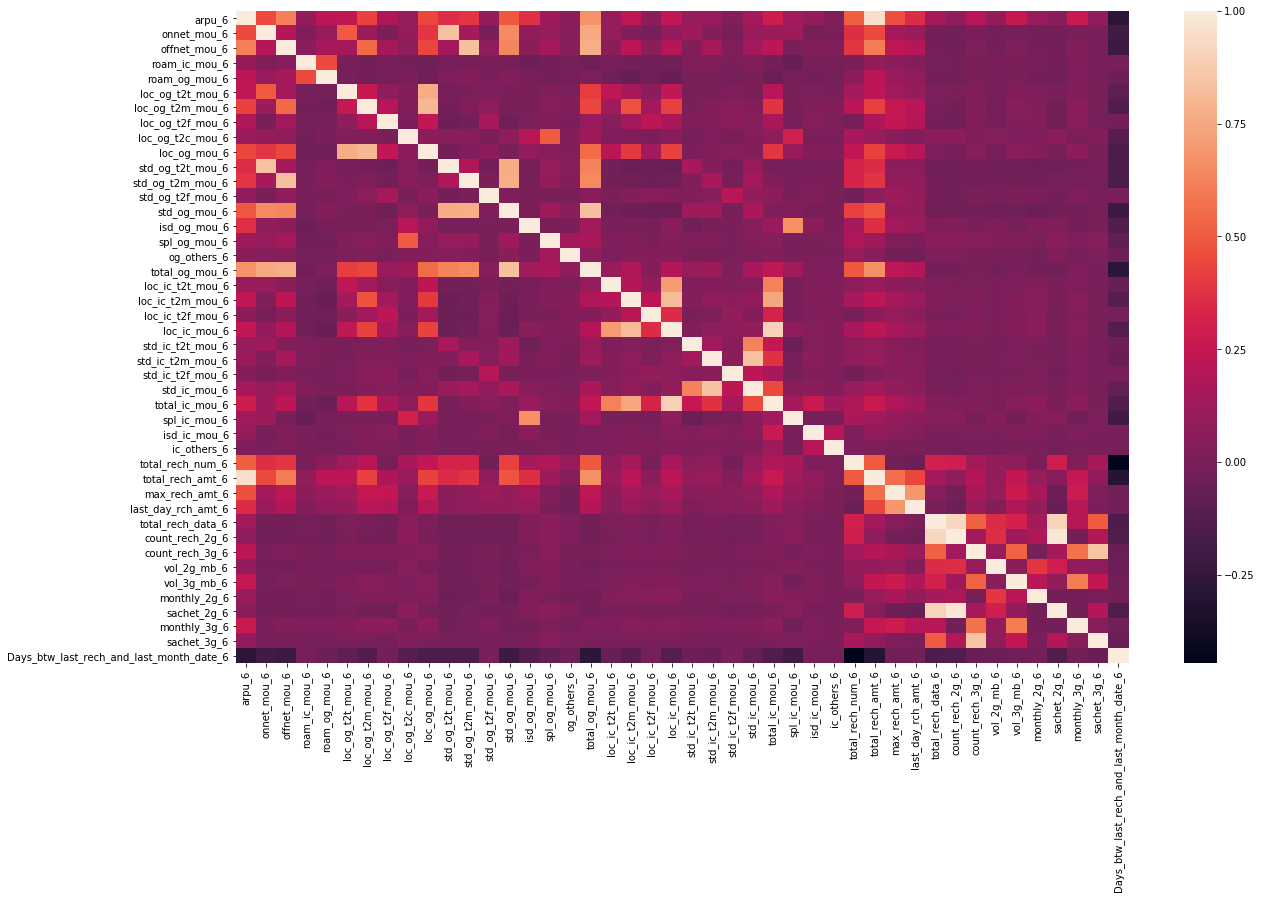

In [75]:
cor_mat = df_telecom[june_columns].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor_mat)

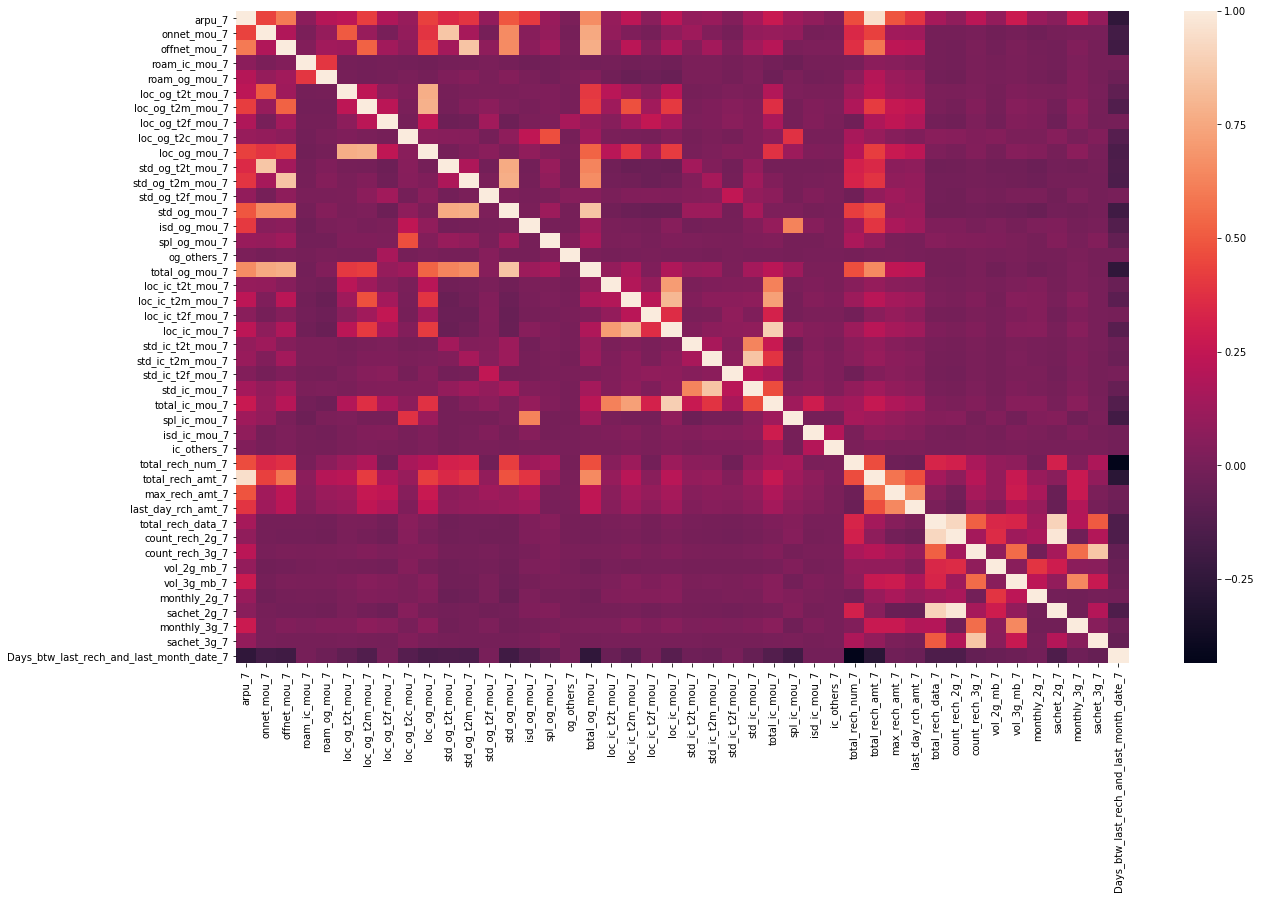

In [76]:
cor_mat = df_telecom[july_columns].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor_mat)

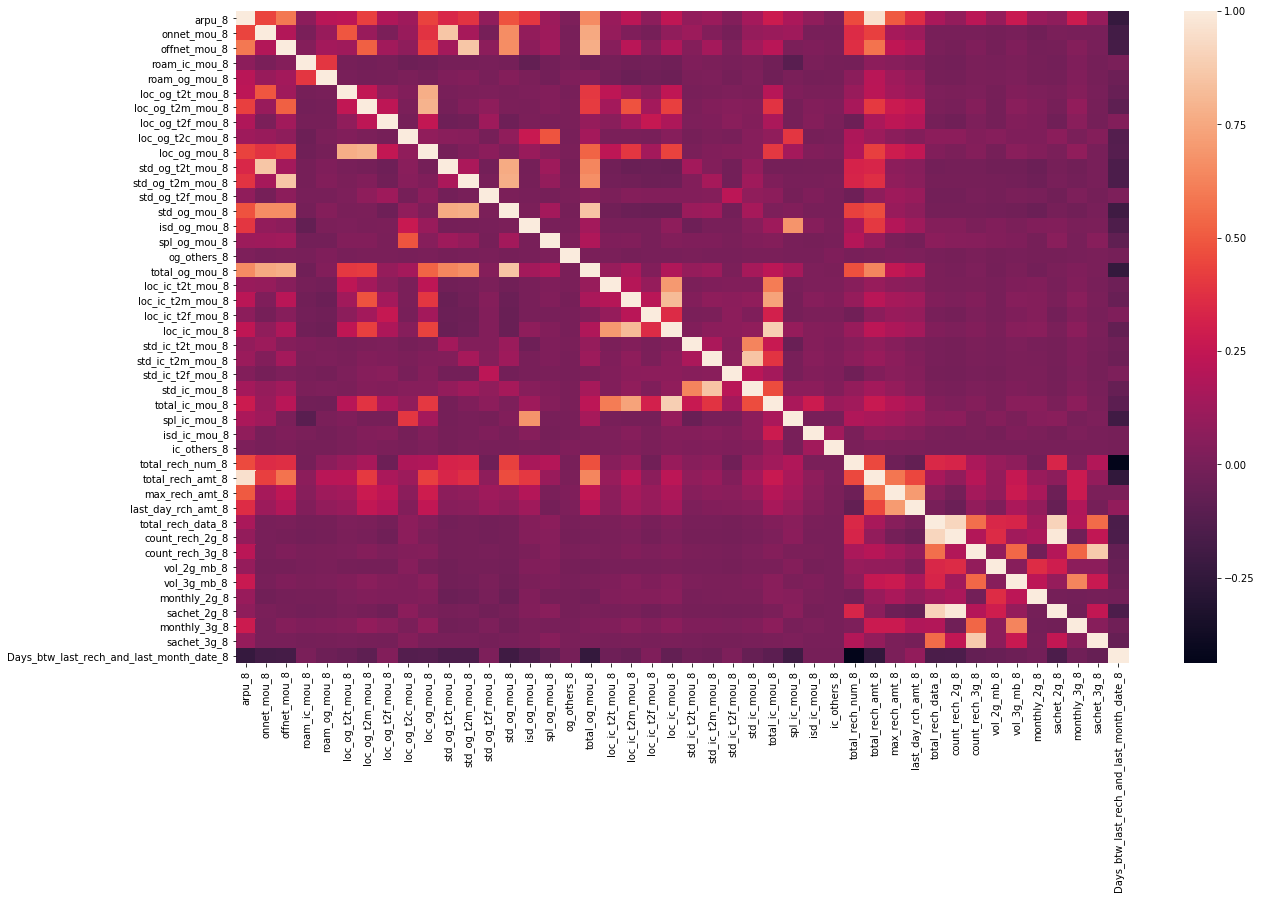

In [77]:
cor_mat = df_telecom[august_columns].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor_mat)

### Let us look at the summary of the Datasets

In [78]:
df_telecom.describe(percentiles = {0.25,0.50,0.75,0.90,0.95,0.99, 0.995, 0.999})

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09    282.987358    278.536648    279.154731    261.645069   
std     6.956694e+05    328.439770    338.156291    344.474791    341.998630   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%     7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%     7.001812e+09    371.060000    365.344500    369.370500    353.466500   
90%     7.002174e+09    620.075400    617.252000    618.160400    601.537000   
95%     7.002291e+09    829.488200    828.357200    833.303300    805.107200   
99%     7.002387e+09   1410.792540   1428.685880   1455.539960   1402.445660   
99.5%   7.002398e+09   1726.672790   1736.969920   1772.514510   1714.434170   
99.9%   7.002409e+09   2726.161436   2687.592802   2823.736464   2670.115008   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     125.458132    127.868890    123.552689    117.678348    197.491620   
std      293.307465    304.161180    303.144735    299.479371    310.559389   
min      -78.739695   -318.458983   -505.044146   -327.805606      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     36.720000   
50%       30.980000     29.240000     28.040000     23.840000    103.410000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
90%      330.590000    334.496000    326.992000    315.690000    464.304000   
95%      594.285000    607.158000    594.812000    579.855000    712.595000   
99%     1410.511400   1463.311600   1452.734200   1398.037200   1517.047400   
99.5%   1837.740300   1894.673200   1915.615500   1855.939500   1942.244000   
99.9%   3139.162840   3161.314100   3142.348860   3169.474800   3173.787600   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     196.182154    195.367547    188.968166      10.777791       7.640761   
std      319.542457    318.291673    306.814473      71.639302      72.185083   
min        0.000000      0.000000      0.000000    -156.463514     -94.710969   
25%       33.960000     34.510000     31.230000       0.000000       0.000000   
50%       98.530000    101.960000    101.290000       0.000000       0.000000   
75%      217.830000    215.500000    202.835000       0.000000       0.000000   
90%      468.790000    466.540000    444.860000      25.626157      13.786753   
95%      727.457000    712.352000    689.869000      40.510000      24.184387   
99%     1524.160600   1495.840400   1466.138400     215.642400     150.340800   
99.5%   1977.096900   1933.611700   1916.286200     338.064300     264.265700   
99.9%   3335.240120   3221.605640   3208.328300     747.931500     703.443740   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        8.909929       7.742591      13.900376       9.636476   
std        67.032624      55.255058      70.022739      57.324141   
min      -380.715159    -244.299082       0.000000     -16.800511   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        24.364000      21.744108      20.610000       8.623015   
95%        37.534623   

<font color='green' size=3>Capping the negative values, making them 0</font>

In [79]:
df_telecom = df_telecom.mask(df_telecom < 0, 0)

In [80]:
df_telecom.describe(percentiles={0.25,0.5,0.75,0.9,0.95,0.99,0.995})

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean    7.001207e+09    283.095946    278.682935    279.211935    261.820431   
std     6.956694e+05    328.187736    337.881891    344.407694    341.701980   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
25%     7.000606e+09     93.411500     86.980500     84.126000     62.685000   
50%     7.001205e+09    197.704000    191.640000    192.080000    176.849000   
75%     7.001812e+09    371.060000    365.344500    369.370500    353.466500   
90%     7.002174e+09    620.075400    617.252000    618.160400    601.537000   
95%     7.002291e+09    829.488200    828.357200    833.303300    805.107200   
99%     7.002387e+09   1410.792540   1428.685880   1455.539960   1402.445660   
99.5%   7.002398e+09   1726.672790   1736.969920   1772.514510   1714.434170   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183964    128.515350    125.864581    120.210605    197.491620   
std      292.433526    303.868897    302.023141    298.331050    310.559389   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     36.720000   
50%       30.980000     29.240000     28.040000     23.840000    103.410000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
90%      330.590000    334.496000    326.992000    315.690000    464.304000   
95%      594.285000    607.158000    594.812000    579.855000    712.595000   
99%     1410.511400   1463.311600   1452.734200   1398.037200   1517.047400   
99.5%   1837.740300   1894.673200   1915.615500   1855.939500   1942.244000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     196.182154    195.367547    188.968166      10.786722       7.651186   
std      319.542457    318.291673    306.814473      71.633983      72.180614   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       33.960000     34.510000     31.230000       0.000000       0.000000   
50%       98.530000    101.960000    101.290000       0.000000       0.000000   
75%      217.830000    215.500000    202.835000       0.000000       0.000000   
90%      468.790000    466.540000    444.860000      25.626157      13.786753   
95%      727.457000    712.352000    689.869000      40.510000      24.184387   
99%     1524.160600   1495.840400   1466.138400     215.642400     150.340800   
99.5%   1977.096900   1933.611700   1916.286200     338.064300     264.265700   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        8.920277       7.761792      13.900376       9.636650   
std        67.014640      55.234287      70.022739      57.324087   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        24.364000      21.744108      20.610000       8.623015   
95%        37.534623      26.591881      65.412000      40.783000   
99%       157.661400     132.916400     281.115400     215.685000   
99.5%     273.512000     231.430071     429.038300     344.191000   
max     13095.360000    8464.030000    3775.110000    28

The Outliers are present but should not be removed as if they could respond to the ones who have 'churned'. Which may increase the imbalance.</font>

## <font color='brown'> Filtering High Value Customers</font>

In [81]:
# comman Recharge amount column of both month june and july - total_rech_amt_6 and total_rech_amt_7
df_telecom['total_rech_amt_good_phase'] = (df_telecom.total_rech_amt_6+df_telecom.total_rech_amt_7)/2

In [82]:
df_telecom['total_rech_amt_good_phase'].describe(percentiles = [.1,.25,.5,.7,.9,.95,.99])


count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
10%         60.000000
25%        115.000000
50%        229.000000
70%        368.500000
90%        698.000000
95%        937.500000
99%       1590.000000
max      37762.500000
Name: total_rech_amt_good_phase, dtype: float64

In [83]:
def is_hvc(x):
    if x >= 368.5:
        return 1
    else:
        return 0

# Create a new column
df_telecom['cust_hvc'] = df_telecom['total_rech_amt_good_phase'].apply(is_hvc)


In [84]:
df_telecom[['cust_hvc','total_rech_amt_good_phase']].sum()

cust_hvc                        30011.0
total_rech_amt_good_phase    32523554.0
dtype: float64

We have got around 30 thousand rows having the high value customers. hence dropping the rows not having the high value customers.

In [85]:
# defining the DataFrame to contain only the High value customers
df_telecom = df_telecom[df_telecom['cust_hvc']==1]
# Now dropping the column 'cust+hcv'
df_telecom = df_telecom.drop('cust_hvc', axis=1)

In [86]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 183 entries, mobile_number to total_rech_amt_good_phase
dtypes: float64(183)
memory usage: 42.1 MB


## <font color='brown'>Tagging of number to 'Churn' and 'Not churn'</font>

### Tagging the customers in the Dataset, as 1 for churned ones and 0 for the ones who have not churned.

Finds out if the customer churn or not

In [87]:
september_columns = []
for x in df_telecom.columns:
    if '9' in x:
        september_columns.append(x)

In [88]:
df_telecom[september_columns]

arpu_9  onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
7       500.000         0.00    172.959165      36.927259       2.005677   
8       166.787        33.46    108.710000       0.000000       0.000000   
13      322.732       244.81    214.060000     136.780000      12.780000   
16      206.490        31.34    224.390000       0.000000       0.000000   
17      257.583       558.51     87.890000       0.000000      17.980000   
21      578.596       161.63    869.890000       0.000000       0.000000   
24      473.030       138.04    481.860000       0.000000       0.000000   
33      799.356         0.00      0.000000       0.000000       0.000000   
38      391.709       494.79    213.240000       0.000000       0.000000   
41      143.596        40.06     49.060000       0.000000       0.000000   
48     1189.744      1589.23    728.410000       0.000000       0.000000   
53     1076.247        99.83    403.230000       0.000000       0.000000   
56      281.710        27.49     97.030000       0.000000       0.000000   
57     1529.608       119.44    205.890000       0.000000       0.000000   
60      404.224        83.51    155.310000       0.000000       0.000000   
61      368.777        67.44    189.680000       0.000000       0.000000   
69      179.852        59.73    478.510000       0.000000       0.000000   
73      734.423      1308.29    302.790000      16.110000       5.860000   
74      369.708       610.36     73.240000       3.150000       0.260000   
77      158.710         6.31     57.680000       0.000000       0.000000   
87      832.143       247.89    420.490000       0.000000       0.000000   
92      523.638       104.86    410.810000       0.000000       0.000000   
96      565.457        94.94    996.280000       0.000000       0.000000   
97        0.000         0.00    171.965356      22.374948       3.201248   
101    1180.985       163.03    434.590000     103.580000     393.810000   
102     191.264         1.00    287.380000       0.000000       0.000000   
103     914.966       209.09   1194.590000       0.000000       0.000000   
105     688.654       311.56    183.730000       0.000000       0.000000   
111       0.000         0.00    172.781007      21.397610       3.292354   
115     874.938        29.29   1044.790000       0.000000       0.000000   
122     264.152       273.01     42.730000       0.000000       0.000000   
124     284.038       170.63     97.240000       0.000000       0.000000   
131     539.936        94.24    496.940000       0.000000       0.000000   
133     696.824       817.41    433.860000       0.000000       0.000000   
134     247.392        72.03     19.490000       0.000000       0.000000   
143       0.000         0.00    172.566332      22.968480       3.365483   
146     791.234        77.56   2007.710000      40.090000     171.610000   
147     529.045        10.74    278.690000       0.000000       0.000000   
149     420.730        92.31    310.010000     152.530000     140.440000   
154     828.064       472.11   1270.830000       0.000000       0.000000   
157     905.958        65.73    399.130000       0.000000       0.000000   
158    1659.146       691.28   1066.780000       0.000000       0.000000   
165     118.842        26.19    137.460000       0.000000       0.000000   
170     732.215       100.04    462.960000      22.610000       1.260000   
171     256.271        67.76    365.640000       0.000000       0.000000   
173    1224.061      2094.16    391.690000       0.000000       0.000000   
175     366.373        93.46    275.710000       0.000000       0.000000   
176     230.625         0.00      0.000000       0.000000       0.000000   
177     334.667         4.71     59.290000       0.000000       0.000000   
184     846.401        59.66    221.990000       0.000000       0.000000   
185     328.095        59.51    138.780000       0.000000       0.000000   
188       0.000         0.00    172.820166      18.303262

When customer churns means <br>
Call mins, Data Usage 2g/3g all will be 0

In [89]:
df_telecom['churn'] = df_telecom.vol_3g_mb_9+df_telecom.vol_2g_mb_9+df_telecom.total_og_mou_9 + df_telecom.total_ic_mou_9

In [90]:
df_telecom2['churn'] = df_telecom2.vol_3g_mb_9+df_telecom2.vol_2g_mb_9+df_telecom2.total_og_mou_9 + df_telecom2.total_ic_mou_9

In [91]:
def is_churn(x):
    if x == 0 :
        return 1
    else:
        return 0

df_telecom['churn'] = df_telecom['churn'].apply(is_churn)

In [92]:
df_telecom['churn'].sum()

2593

droping 9th month ( september) column

In [93]:
df_telecom = df_telecom.drop(september_columns, axis=1)

### Checking for any data  imbalance

In [94]:
df_telecom['churn'].astype('category').value_counts()

0    27418
1     2593
Name: churn, dtype: int64

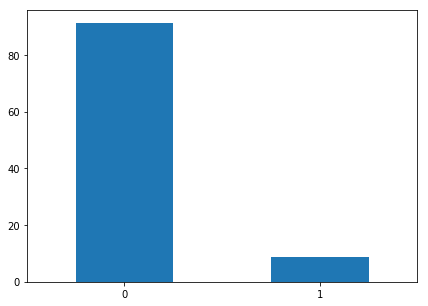

In [95]:
plt.figure(figsize=(7,5))
ax = round(100*(df_telecom['churn'].value_counts()/len(df_telecom.index)),2).plot(kind='bar', rot=0)
plt.show()

## <font color='brown'> Data Preparation-2</font>

### Outlier Treatment

In [96]:
non_binary_columns = []
for col in df_telecom.columns:
    if (len(df_telecom[col].unique())>2):
        non_binary_columns.append(col)
non_binary_columns

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [97]:
len(non_binary_columns)

139

In [98]:
len(df_telecom.columns)

140

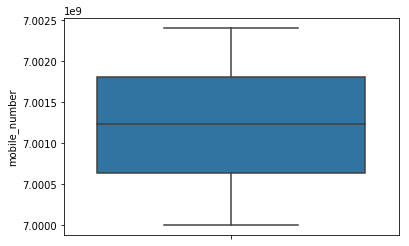

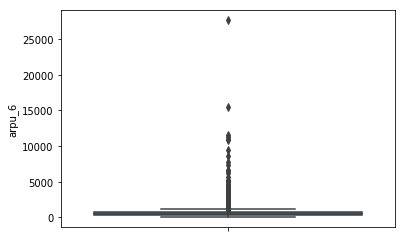

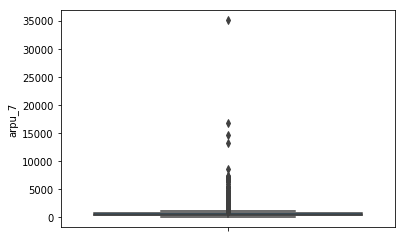

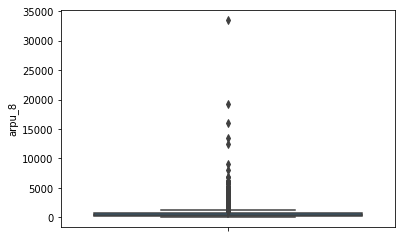

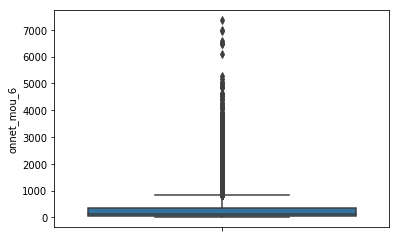

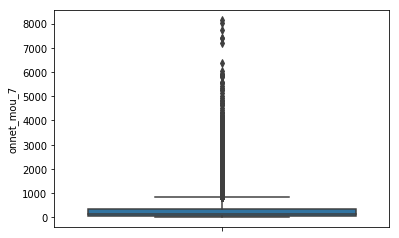

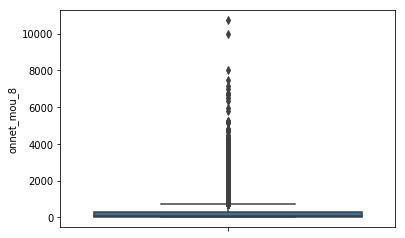

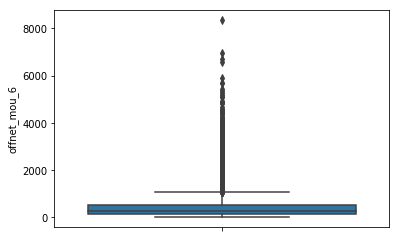

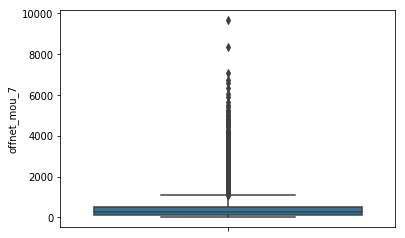

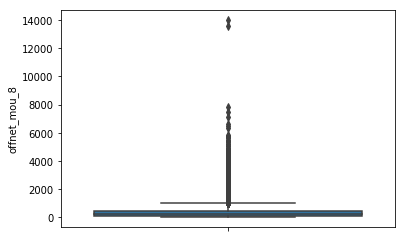

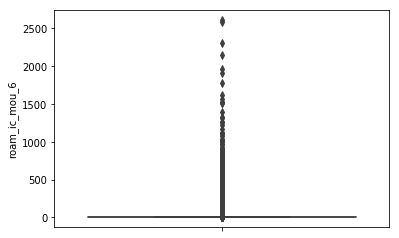

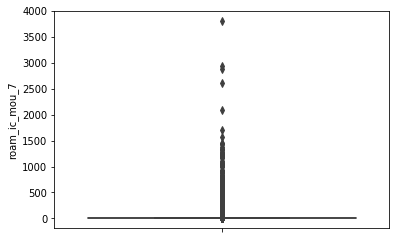

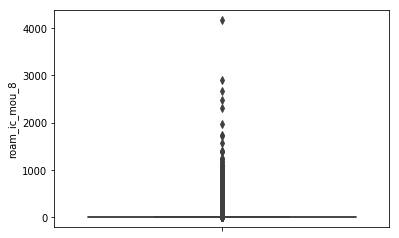

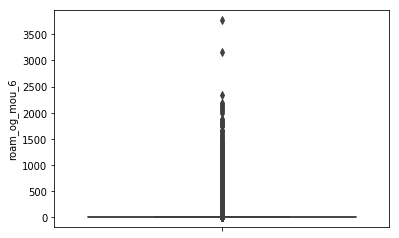

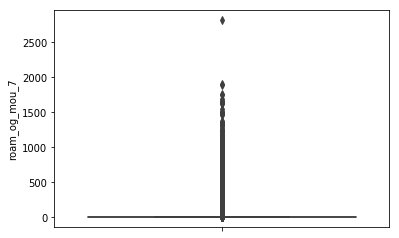

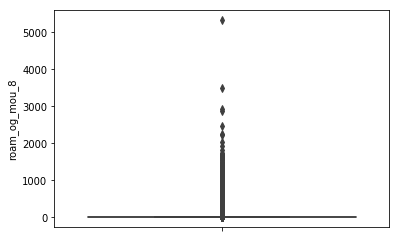

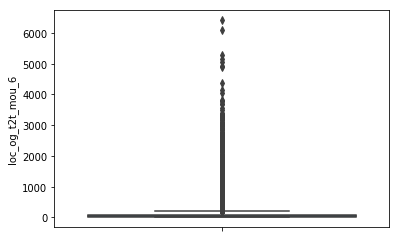

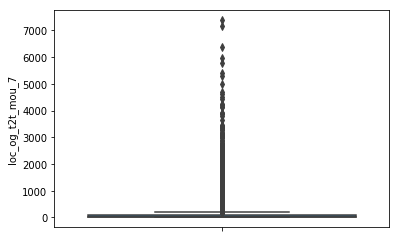

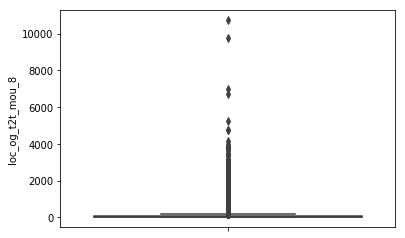

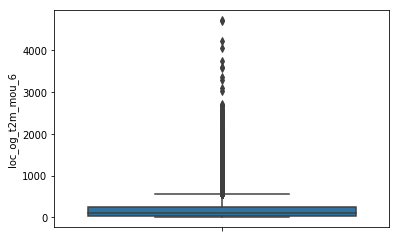

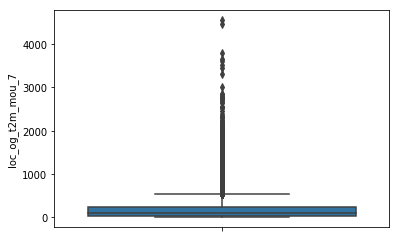

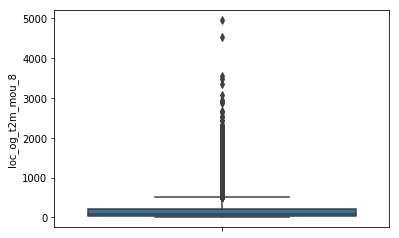

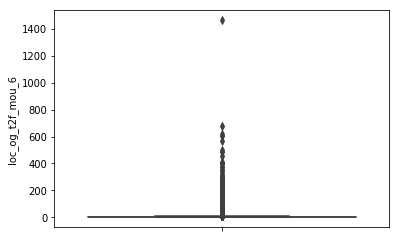

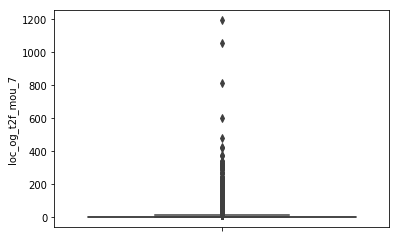

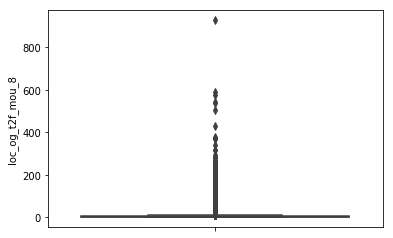

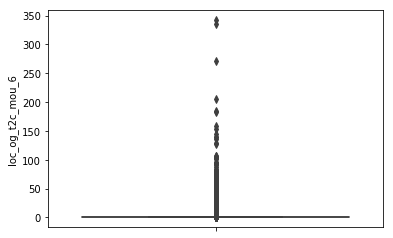

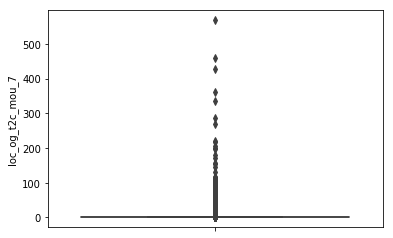

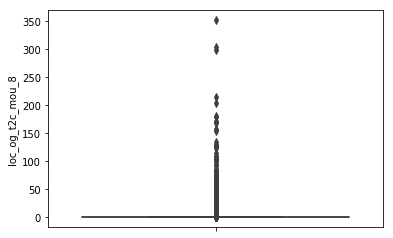

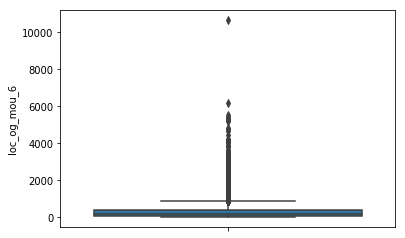

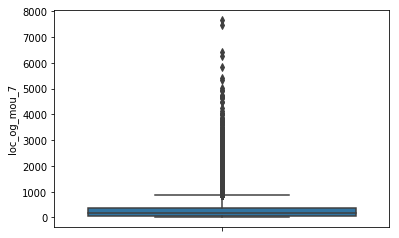

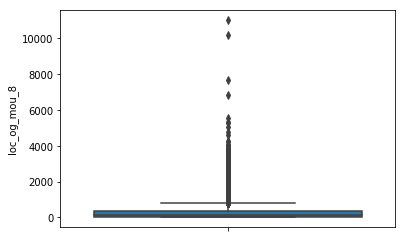

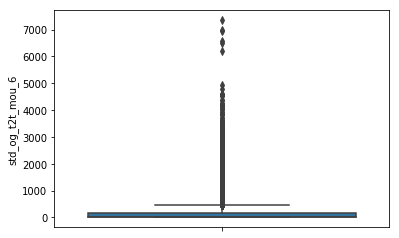

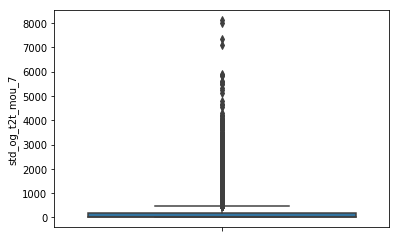

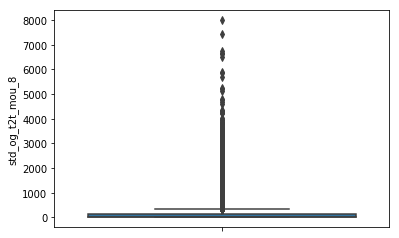

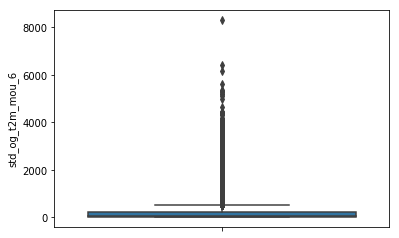

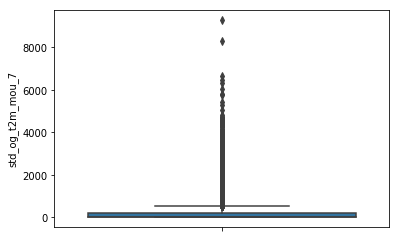

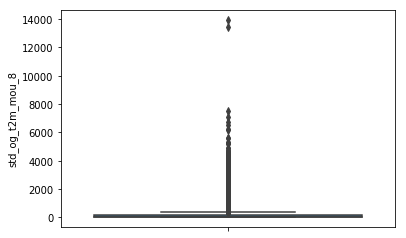

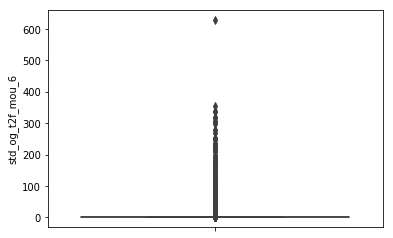

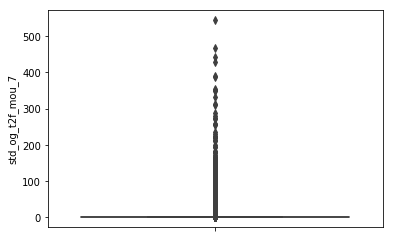

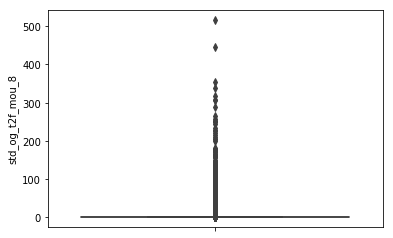

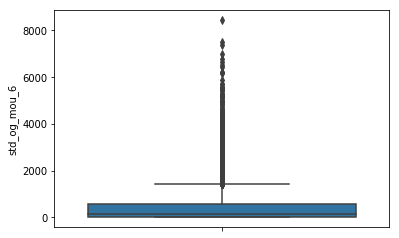

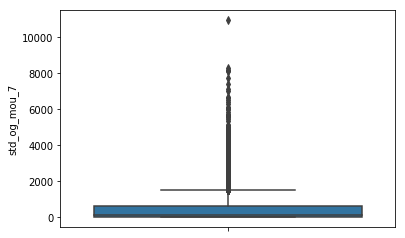

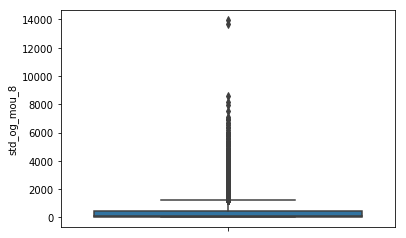

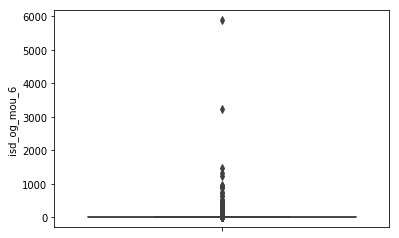

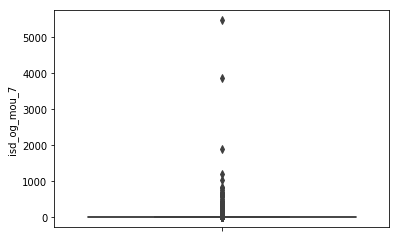

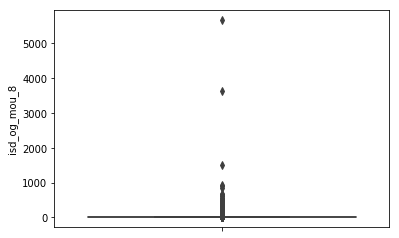

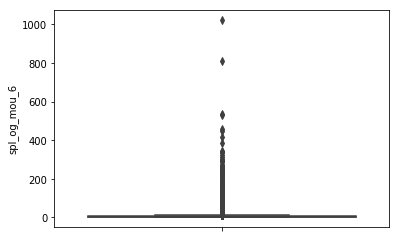

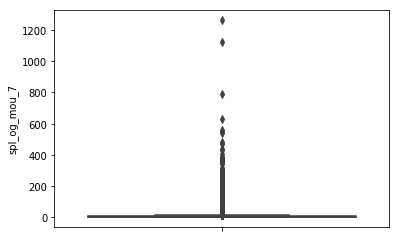

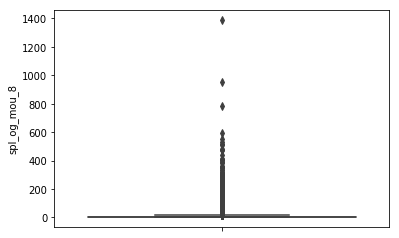

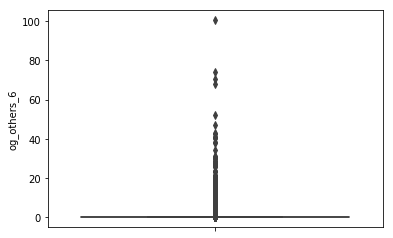

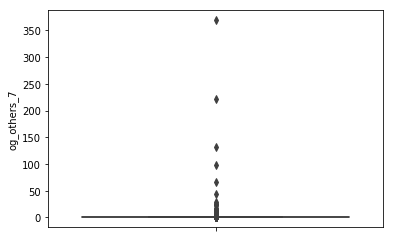

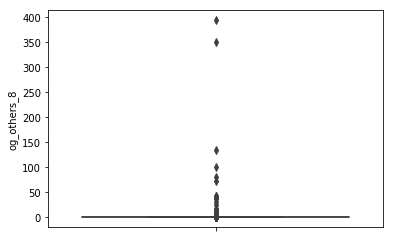

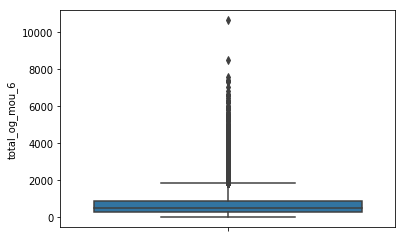

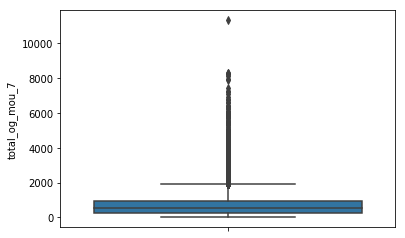

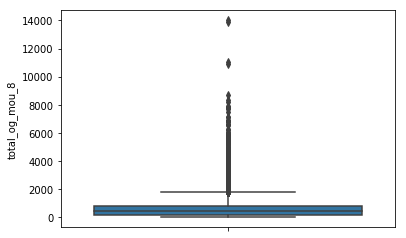

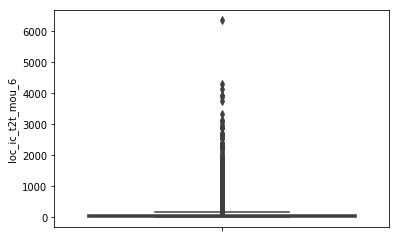

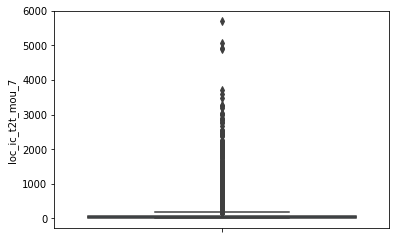

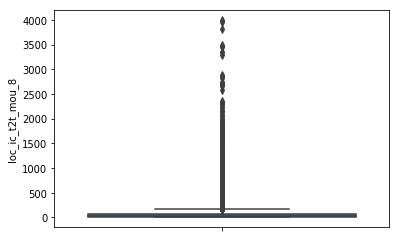

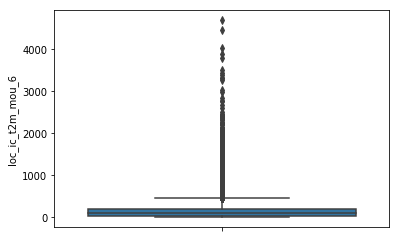

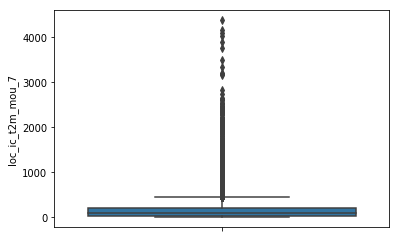

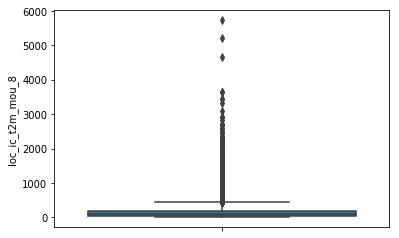

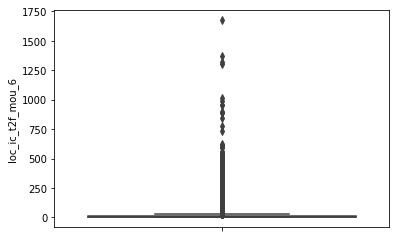

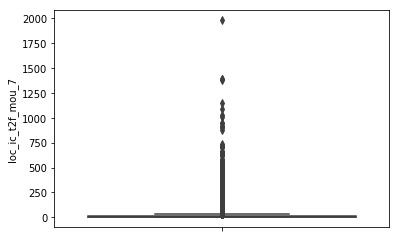

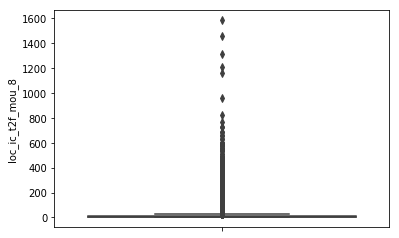

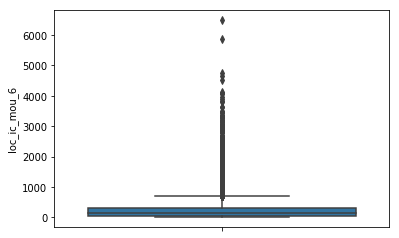

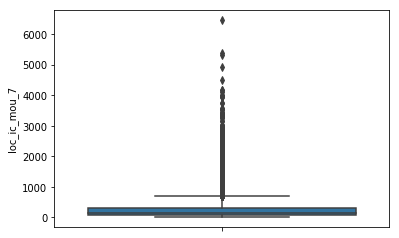

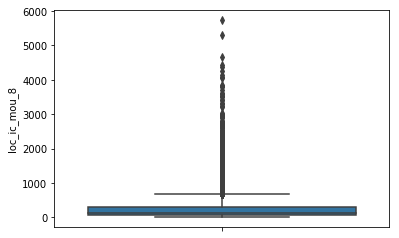

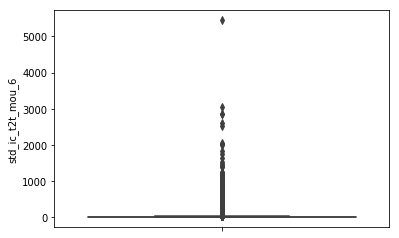

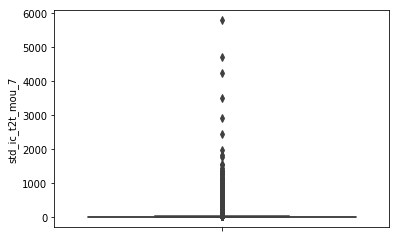

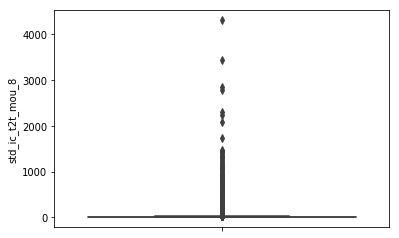

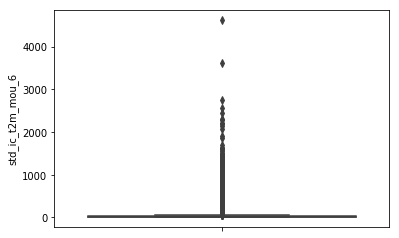

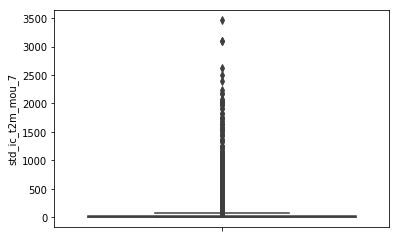

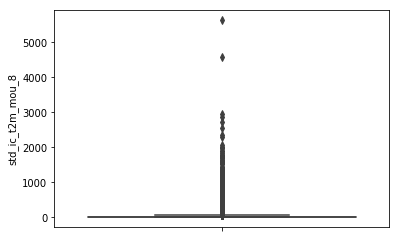

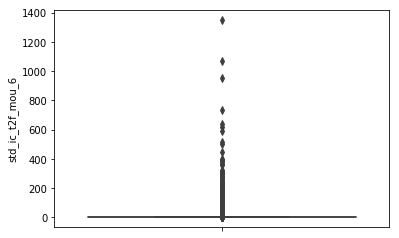

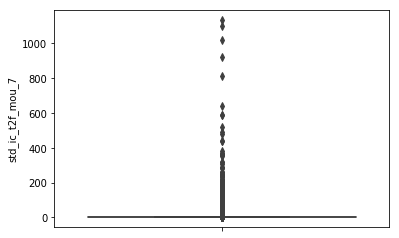

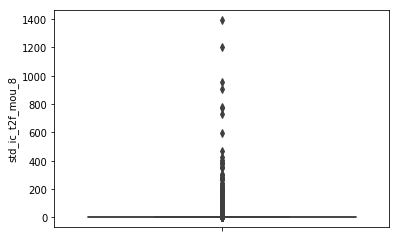

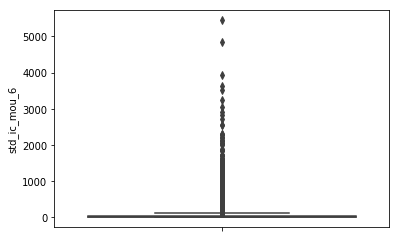

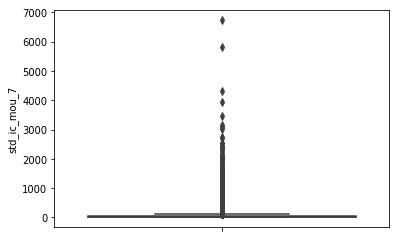

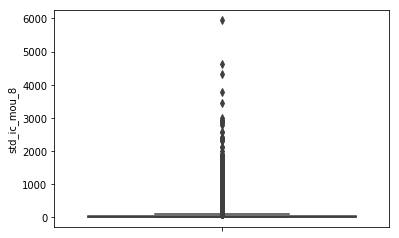

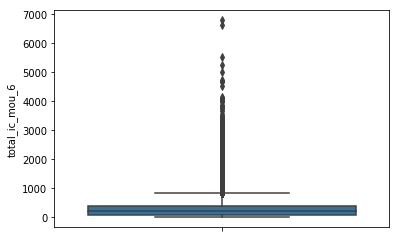

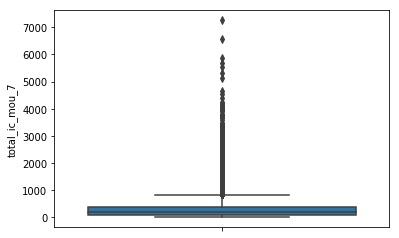

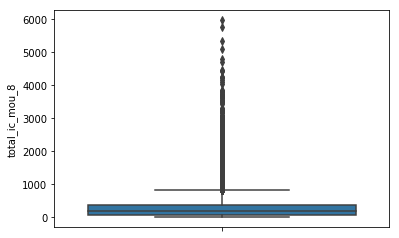

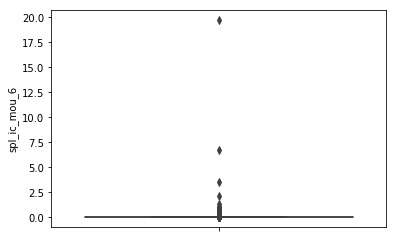

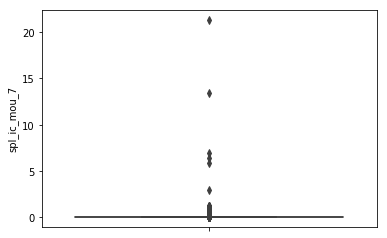

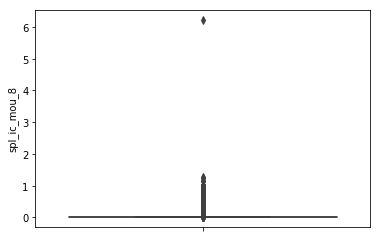

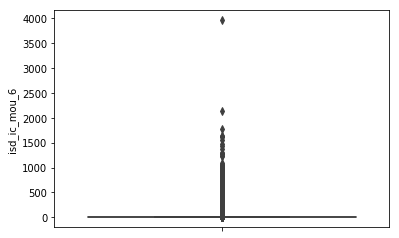

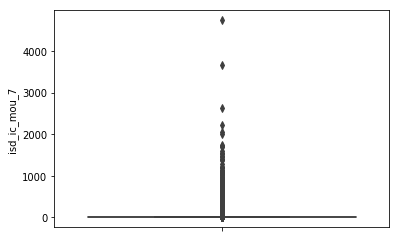

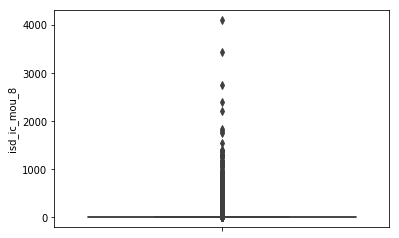

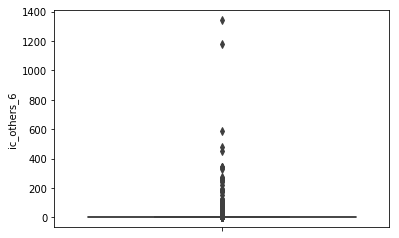

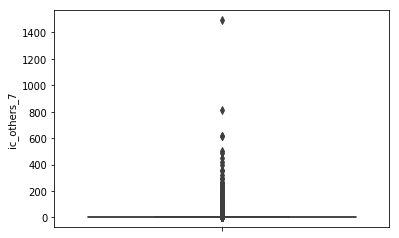

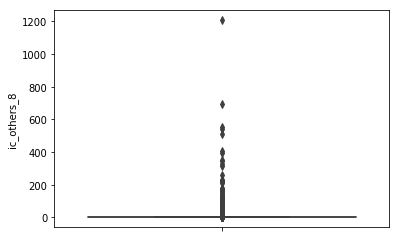

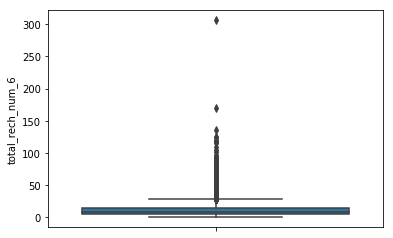

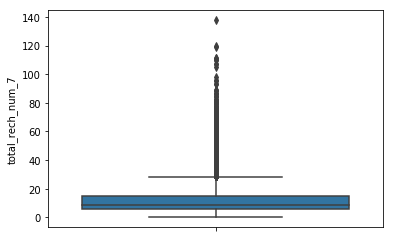

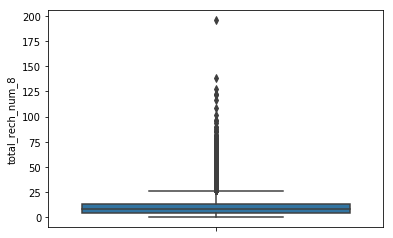

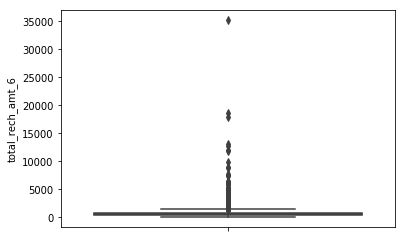

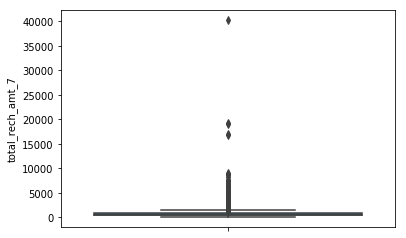

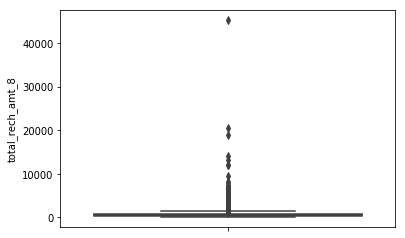

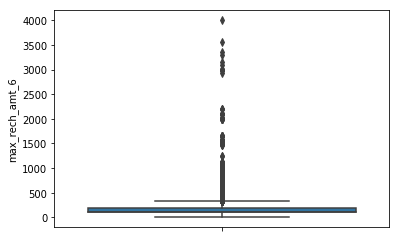

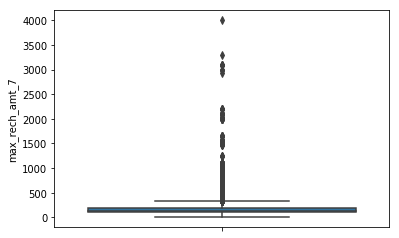

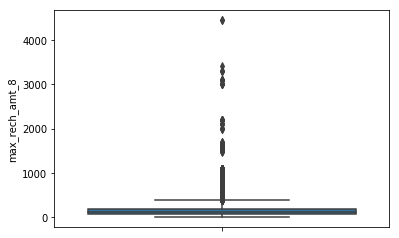

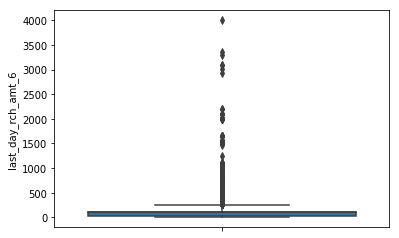

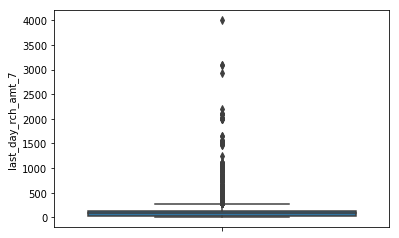

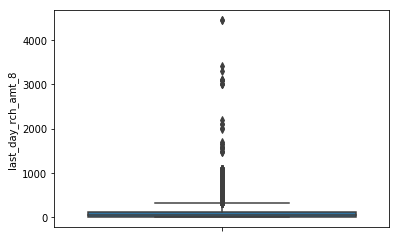

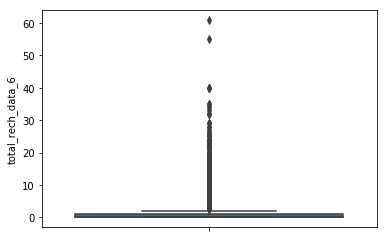

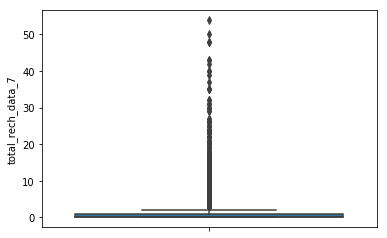

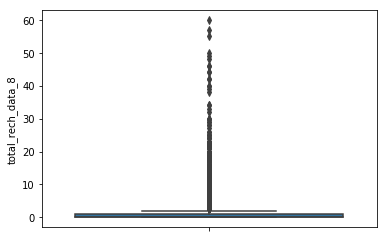

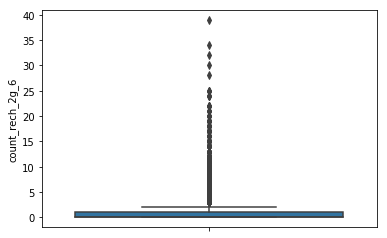

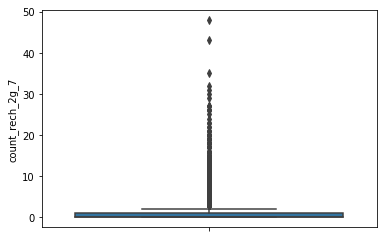

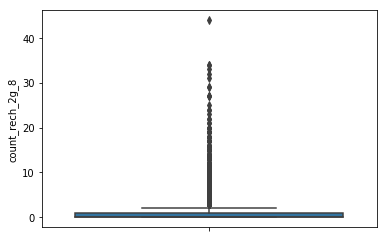

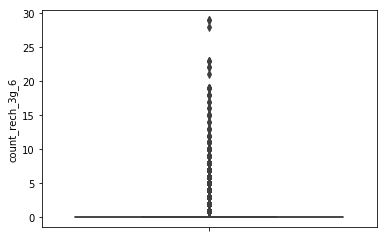

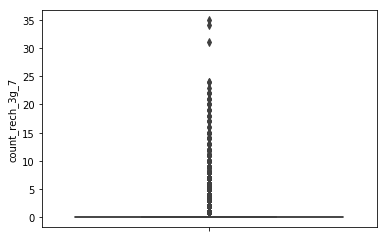

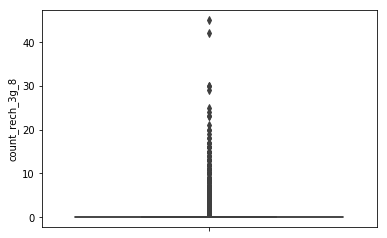

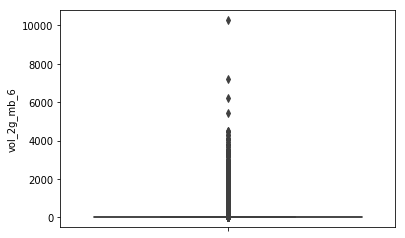

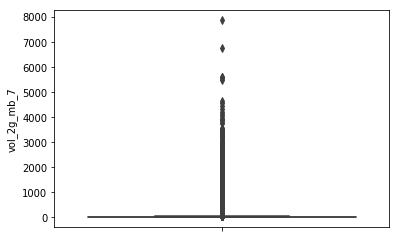

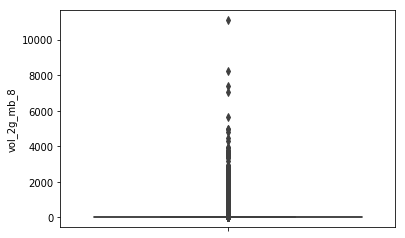

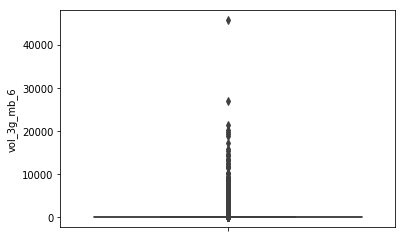

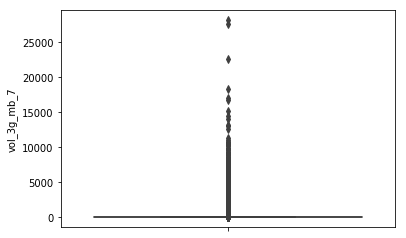

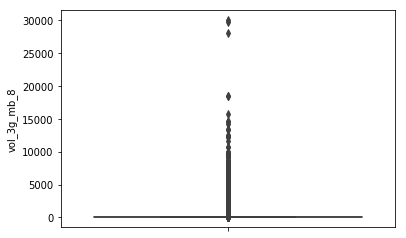

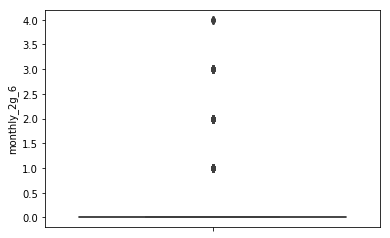

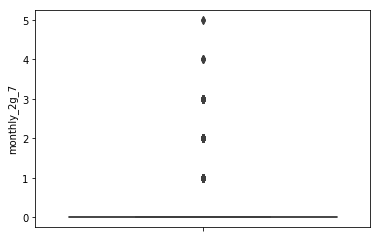

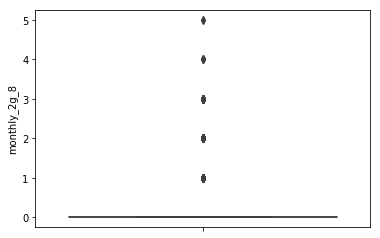

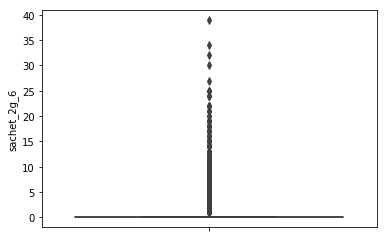

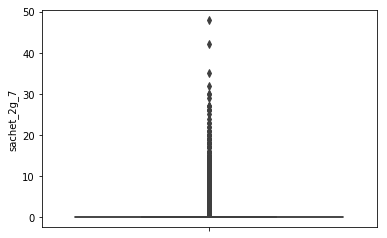

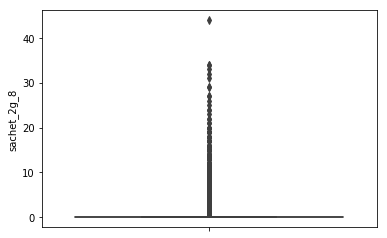

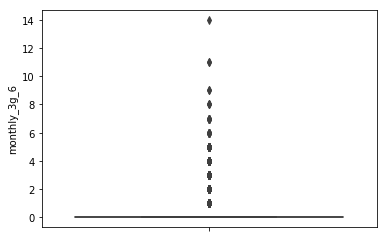

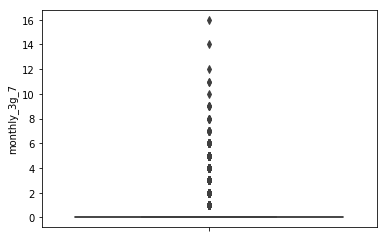

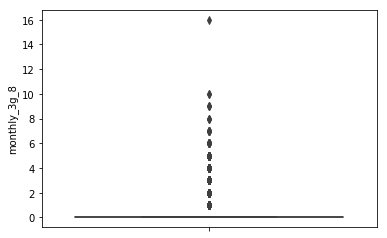

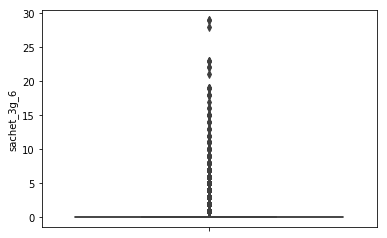

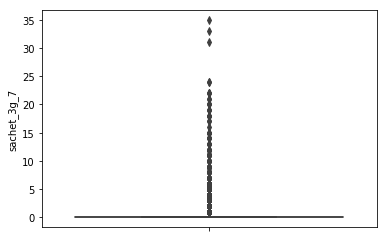

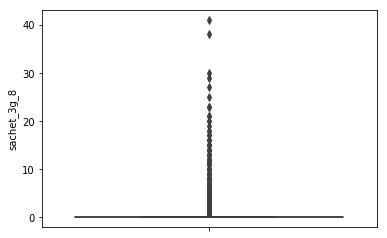

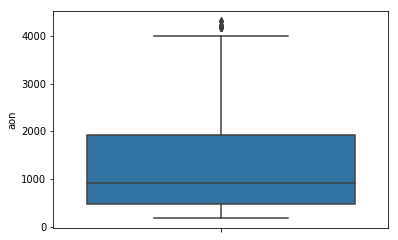

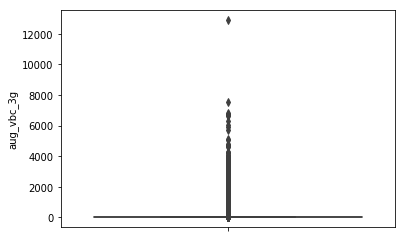

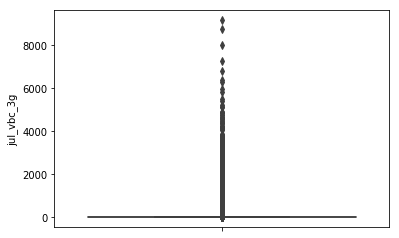

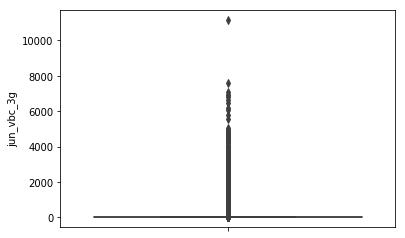

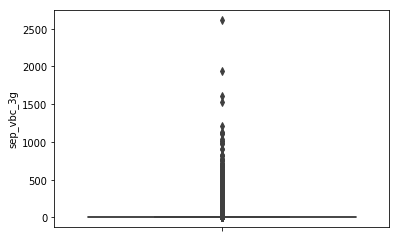

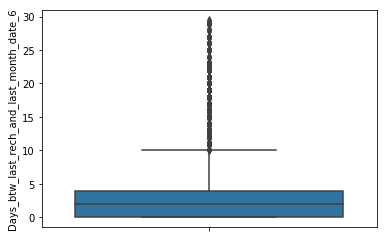

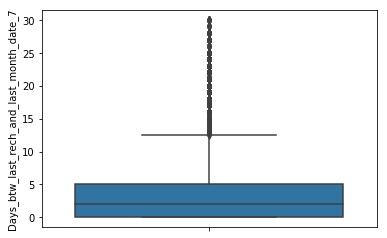

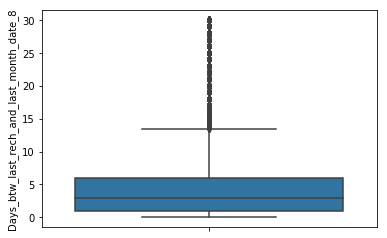

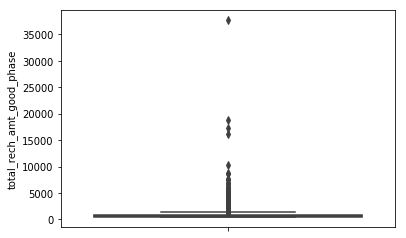

In [99]:
for x in non_binary_columns:
    plt.subplot(1,1,1)
    sns.boxplot(y=x, data=df_telecom)
    plt.show()


Significant amount of values are in outliers

In [100]:
# Contain Rows without outliers
df_telecom3 = pd.DataFrame(columns = df_telecom.columns) 

In [101]:
# Contain Rows with outliers
df_telecom4 = pd.DataFrame(columns = df_telecom.columns) 

In [102]:
for x in non_binary_columns:
    q1 = df_telecom[x].quantile(0.25)
    q3 = df_telecom[x].quantile(0.75)
    IQR = q3-q1
    df_telecom3 = df_telecom[~((df_telecom[x] < (q1-1.5*IQR)) | (df_telecom[x] > (q3+1.5*IQR)) )]
    df_telecom4 = df_telecom[((df_telecom[x] < (q1-1.5*IQR)) | (df_telecom[x] > (q3+1.5*IQR)) )]

In [103]:
df_telecom3.shape

(28195, 140)

In [104]:
#Feteching more outlier from df_telecom3abs
# into - df_telecom3_1 : not having outliers
# and - df_telecom3_2 : having outliers
for x in non_binary_columns:
    df_telecom3_1 = df_telecom3[~((df_telecom3[x].quantile(0.99)) <= df_telecom3[x])]
    df_telecom3_2 = df_telecom3[(df_telecom3[x].quantile(0.99)) <= df_telecom3[x]]

In [105]:
df_telecom3.shape

(28195, 140)

In [106]:
df_telecom3_1.shape

(27912, 140)

In [107]:
df_telecom3_2.shape

(283, 140)

In [108]:
df_telecom3 = df_telecom3_1

In [109]:
df_telecom3.shape

(27912, 140)

In [110]:
# Continung with df_telecom3

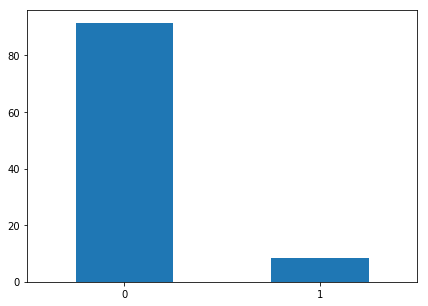

In [111]:
# checking the imbalance once again
plt.figure(figsize=(7,5))
ax = round(100*(df_telecom3['churn'].value_counts()/len(df_telecom3.index)),2).plot(kind='bar', rot=0)
plt.show()

In [112]:
df_telecom3.describe(percentiles={0.995})

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.791200e+04  27912.000000  27912.000000  27912.000000  27912.000000   
mean    7.001221e+09    519.120909    519.345238    476.632740    267.656936   
std     6.849593e+05    244.294705    242.403053    310.069920    386.293784   
min     7.000000e+09      0.000000      0.000000      0.000000      0.000000   
50%     7.001230e+09    475.603000    473.578500    433.788500    119.000000   
99.5%   7.002400e+09   1365.607005   1380.621860   1691.818435   2145.488400   
max     7.002411e+09   2389.825000   2100.000000   5748.252000   5278.290000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  27912.000000  27912.000000  27912.000000  27912.000000  27912.000000   
mean     275.321801    244.825756    372.851028    378.172271    343.383231   
std      407.129064    401.362820    362.802736    373.866027    392.897674   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%      118.335000     93.760000    268.470000    266.670000    229.190000   
99.5%   2244.936000   2284.553350   2041.075400   2126.363200   2215.822650   
max     8011.910000   6767.680000   4175.830000   4769.490000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   27912.000000   27912.000000   27912.000000   27912.000000   
mean       15.578722      12.144336      12.794833      23.834468   
std        70.359267      70.615778      67.875338      86.703279   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
99.5%     422.581800     400.591500     375.899900     588.393350   
max      2613.310000    3813.290000    4169.810000    2000.390000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   27912.000000   27912.000000      27912.000000      27912.000000   
mean       17.624922      17.217460         88.681116         88.614820   
std        72.870381      78.339734        214.650467        221.012299   
min         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000         32.580000         31.680000   
99.5%     488.905000     484.502850       1414.002650       1476.191600   
max      1637.540000    2476.910000       5278.290000       6371.980000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      27912.000000      27912.000000      27912.000000      27912.000000   
mean          81.680097        166.559830        167.314396        157.603801   
std          202.485139        206.030585        203.172058        202.207361   
min            0.000000          0.000000          0.000000          0.000000   
50%           29.503226         97.140000         99.875000         91.776349   
99.5%       1347.104500       1160.729100       1136.868900       1141.825450   
max         6723.790000       2717.840000       4456.740000       3547.130000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      27912.000000      27912.000000      27912.000000      27912.000000   
mean           6.376633          6.503718          6.120527          1.522284   
std           18.351719         18.284909         17.521191          6.761669   
min            0.000000          0.000000          0.000000          0.000000   
50%            0.360000          0.430000          0.380000          0.000000   
99.5%        112.363650        117.330050        110.563500         35.841150   
max          617.580000        481.840000        588.290000        342.860000   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
count      27912.000000      27912.000000  27912.000000  27912.000000   
mean           1.801863          1.686098    260.212193    261.175028   
std            8.751240          7.286750    326.810003    325

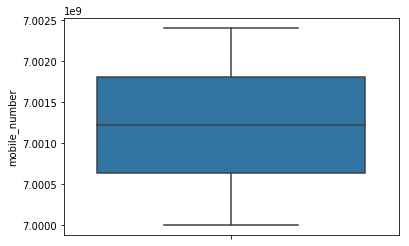

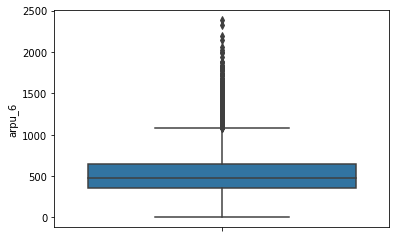

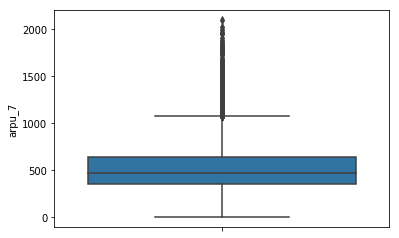

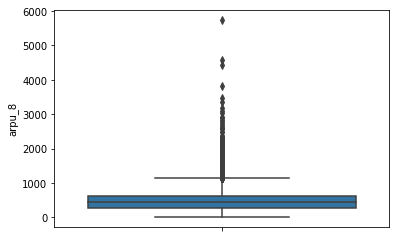

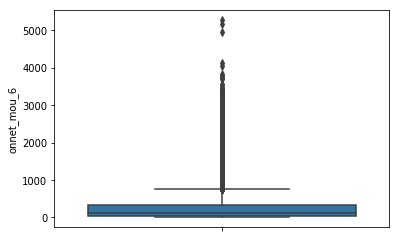

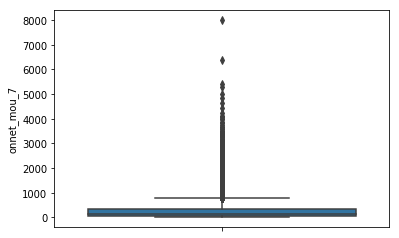

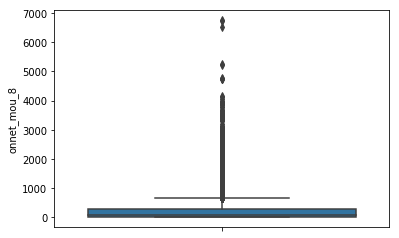

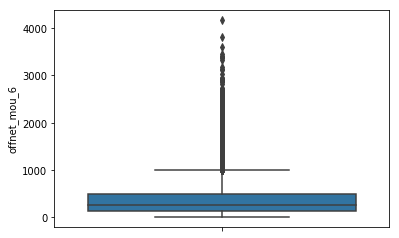

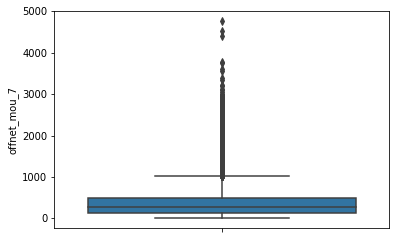

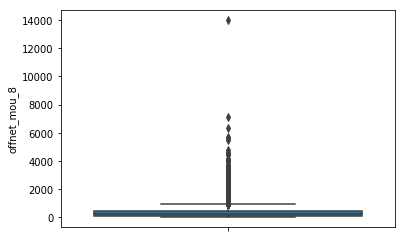

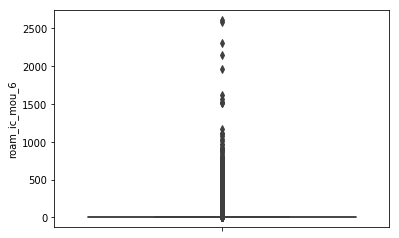

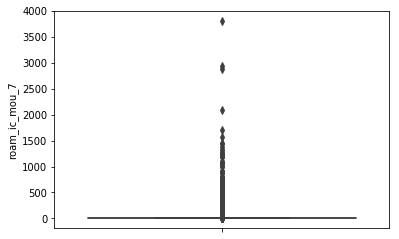

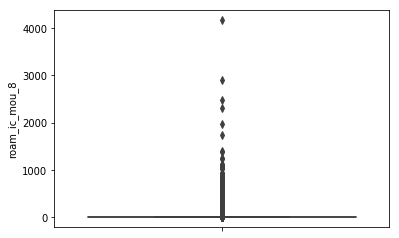

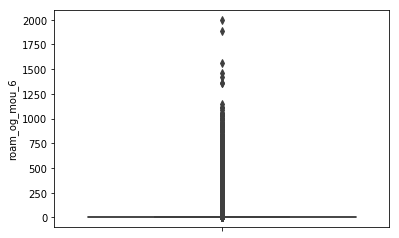

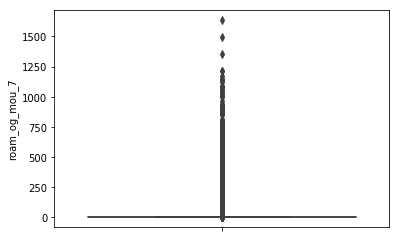

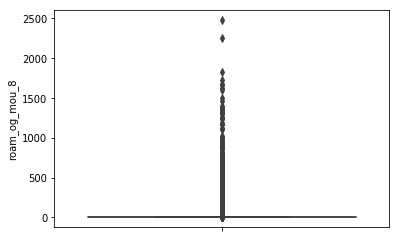

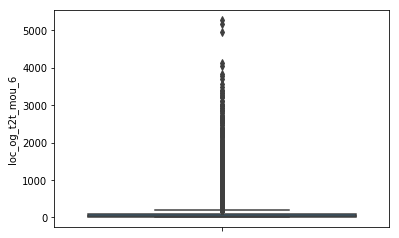

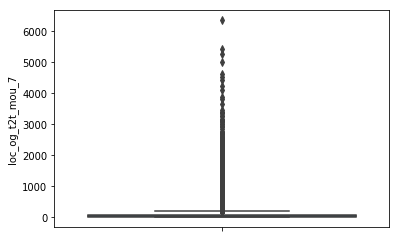

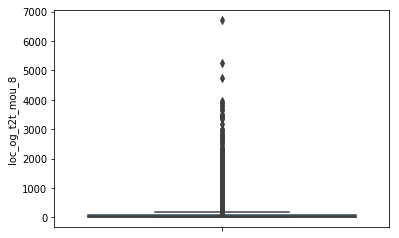

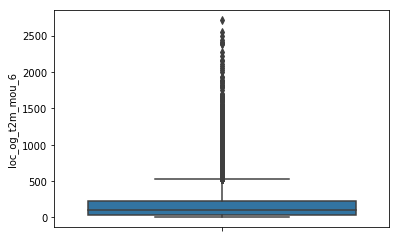

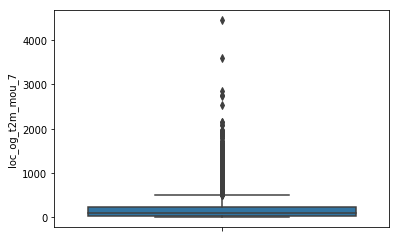

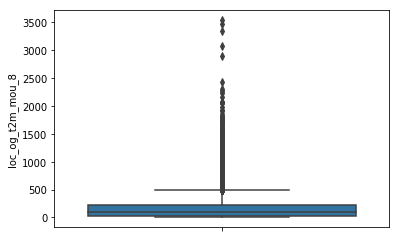

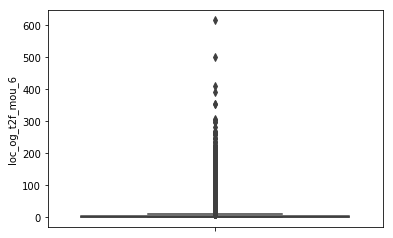

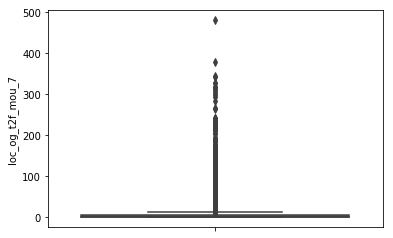

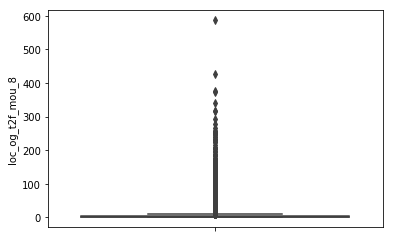

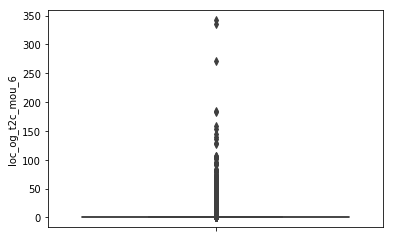

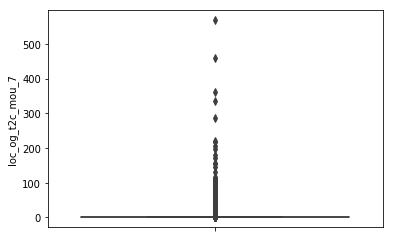

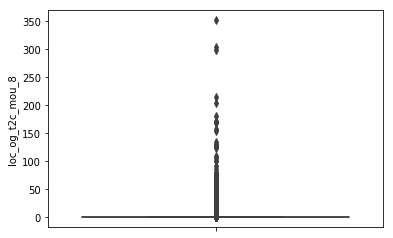

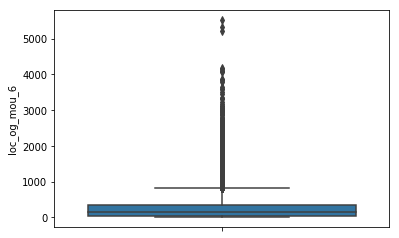

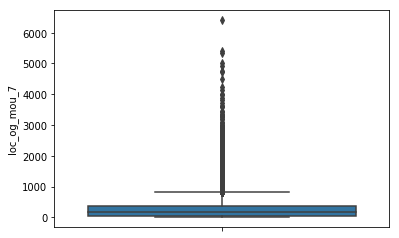

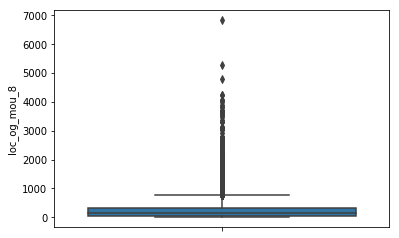

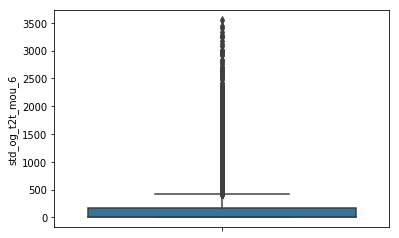

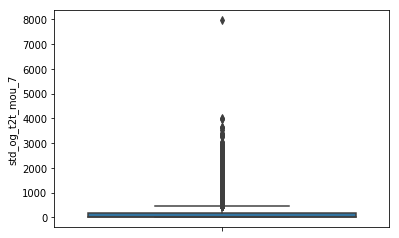

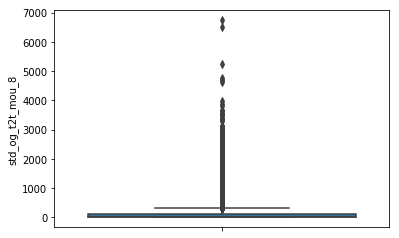

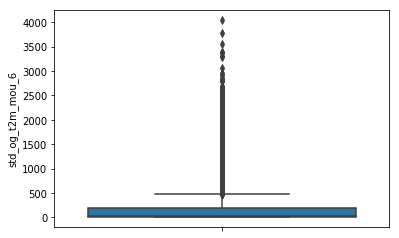

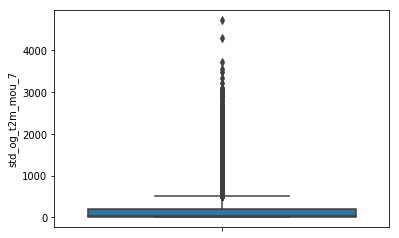

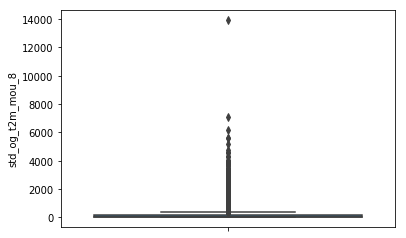

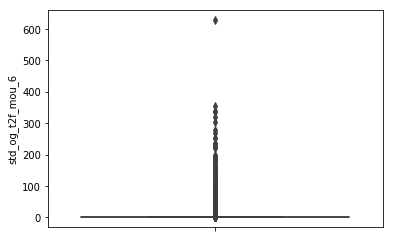

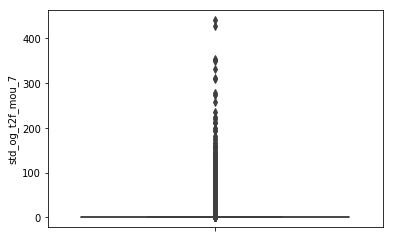

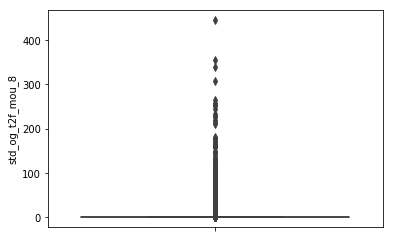

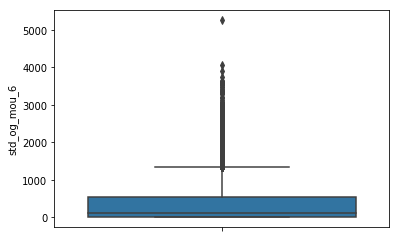

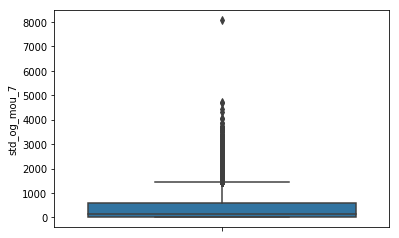

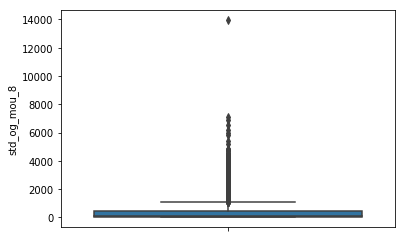

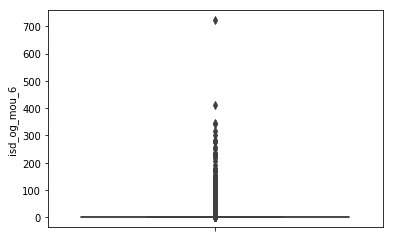

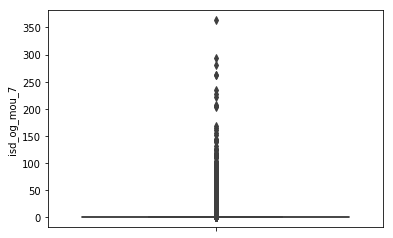

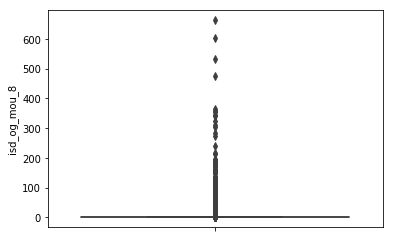

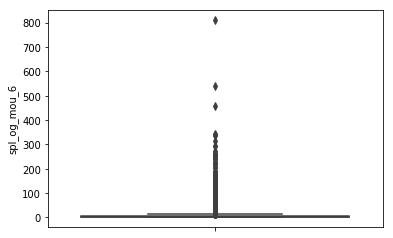

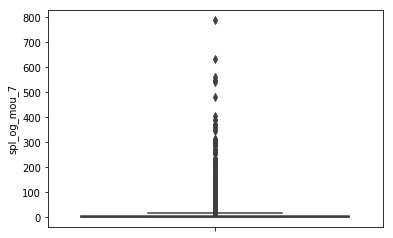

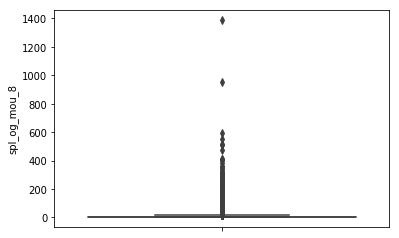

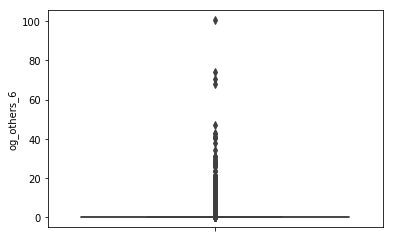

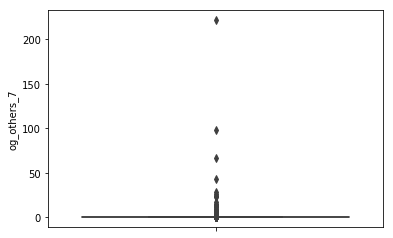

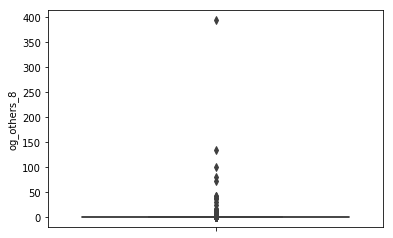

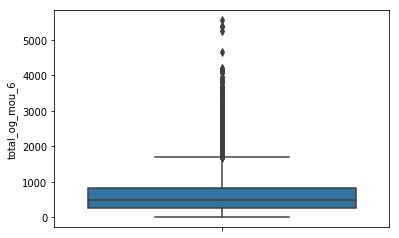

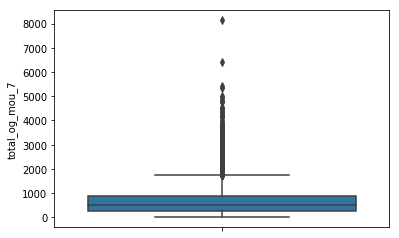

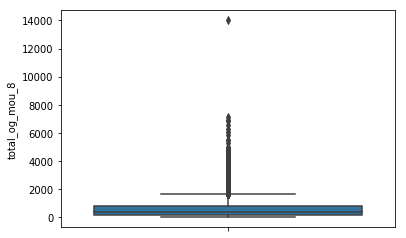

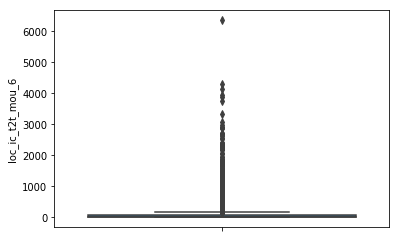

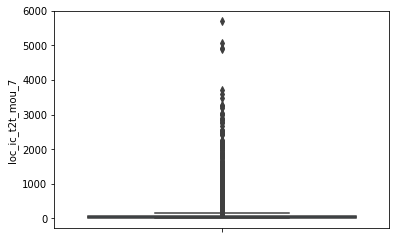

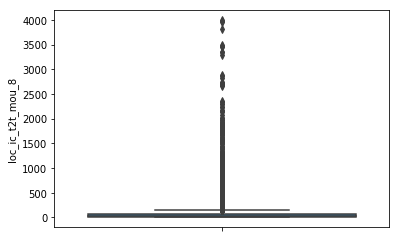

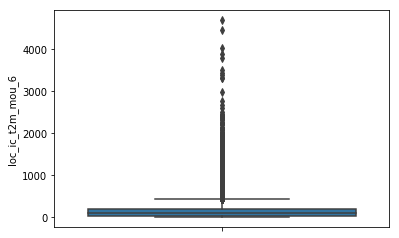

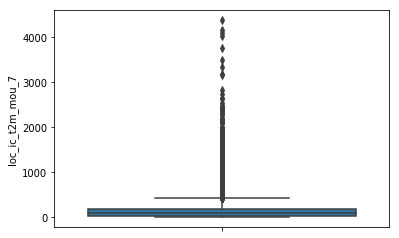

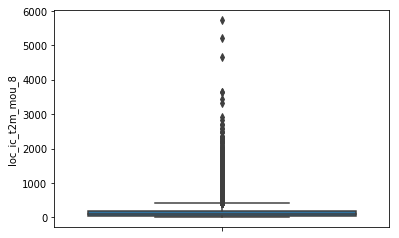

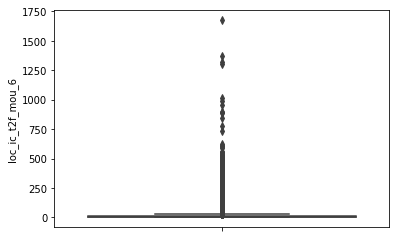

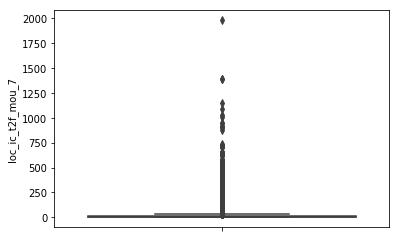

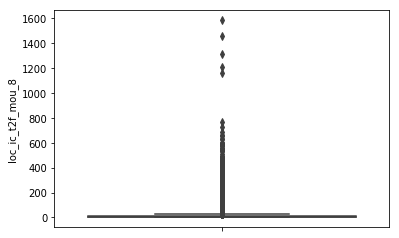

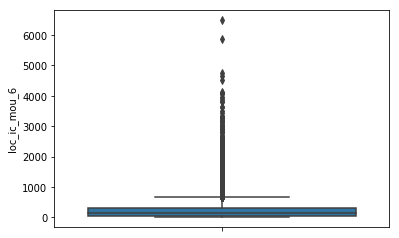

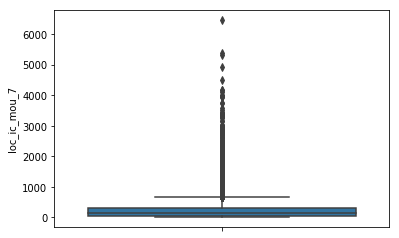

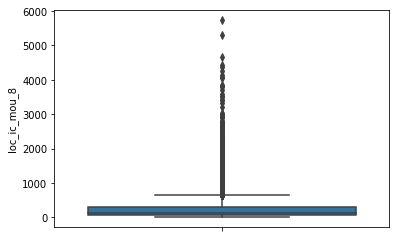

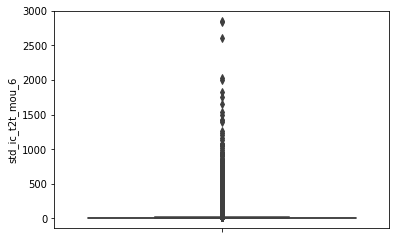

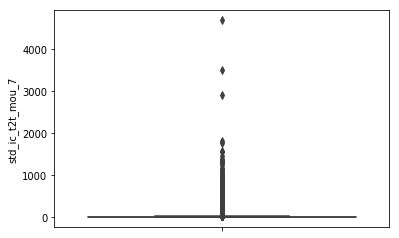

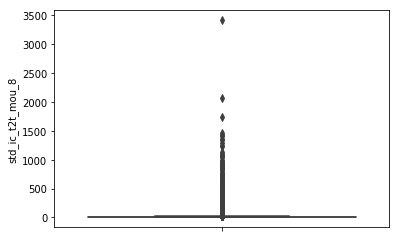

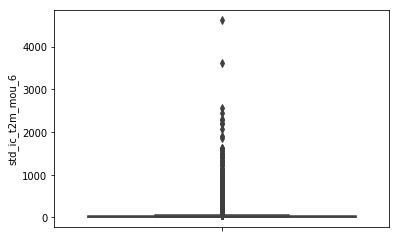

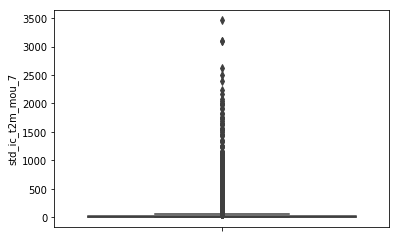

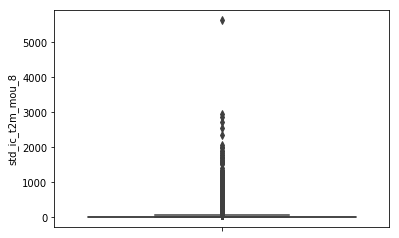

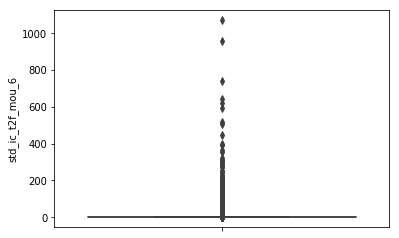

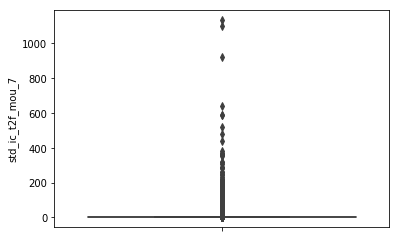

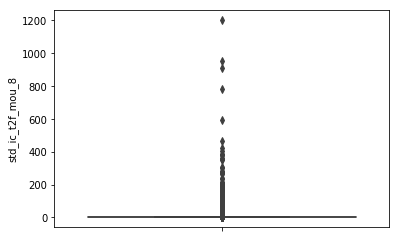

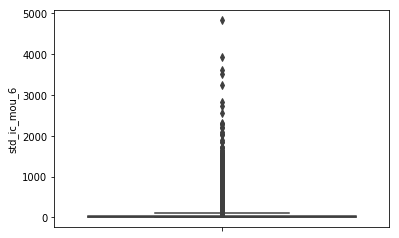

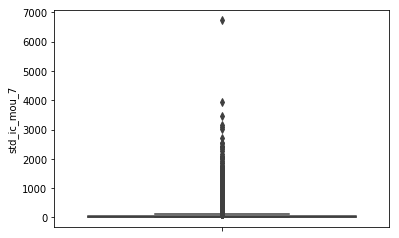

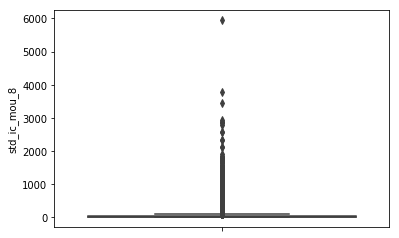

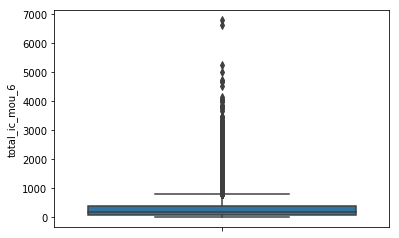

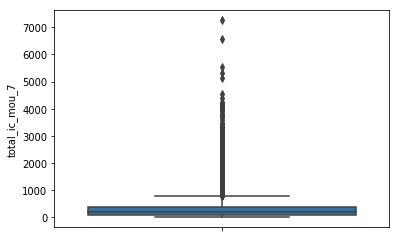

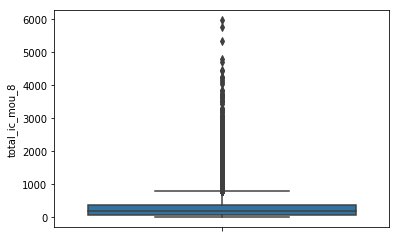

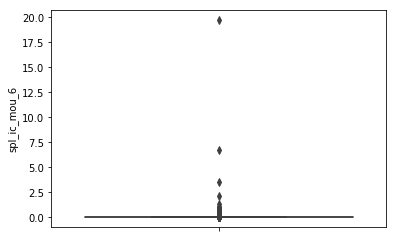

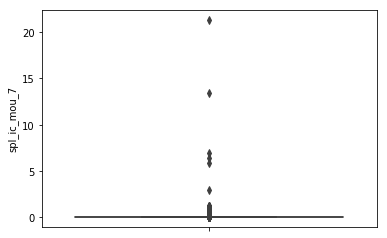

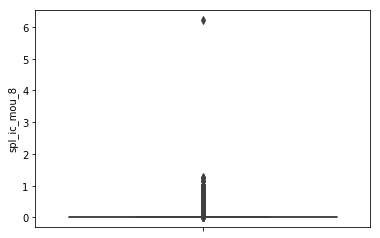

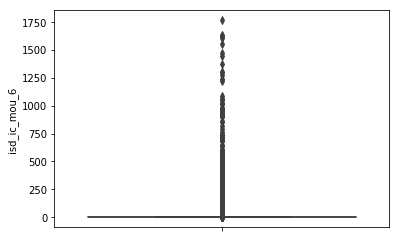

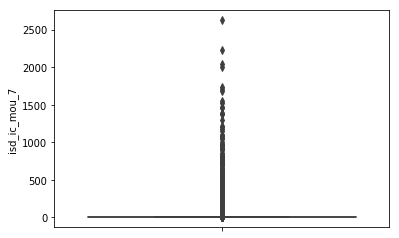

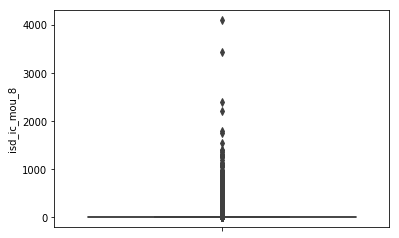

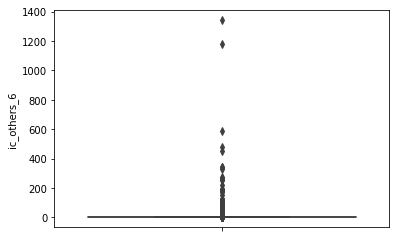

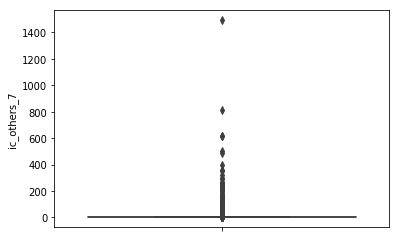

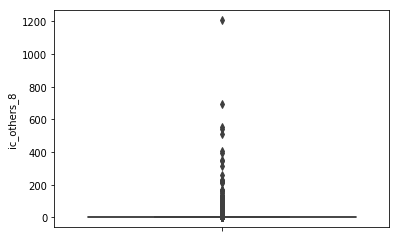

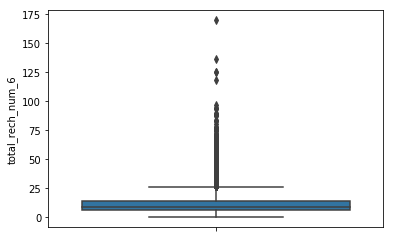

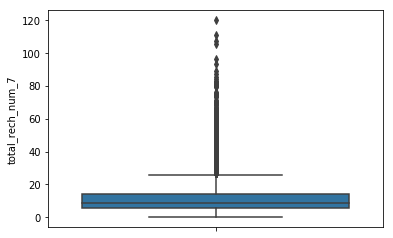

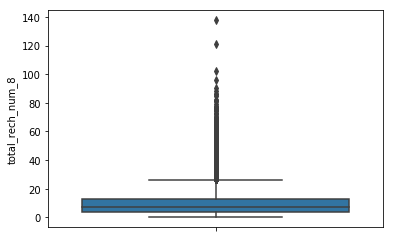

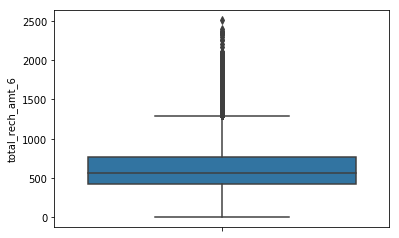

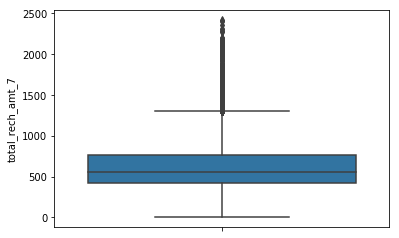

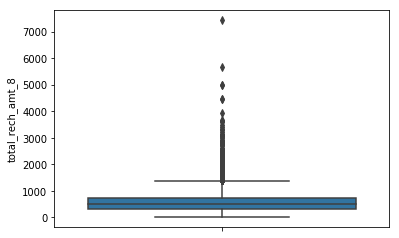

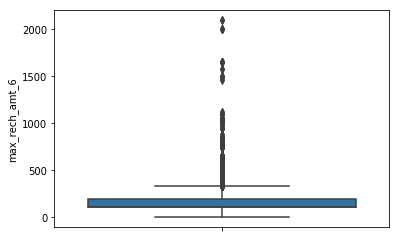

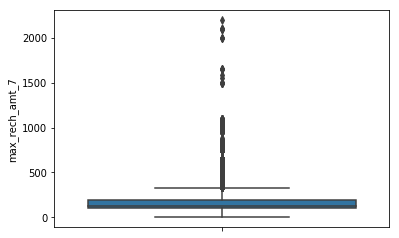

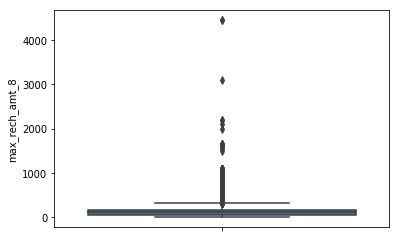

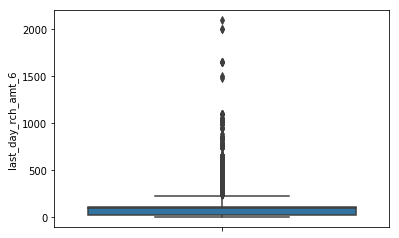

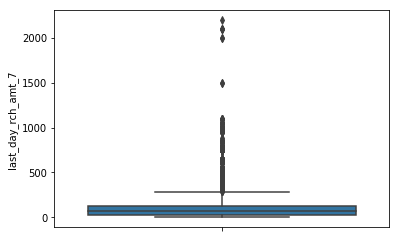

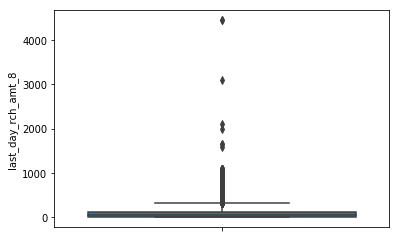

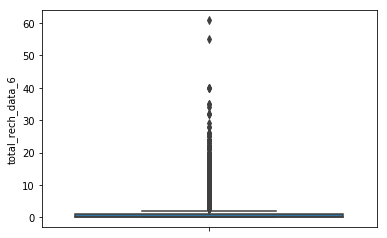

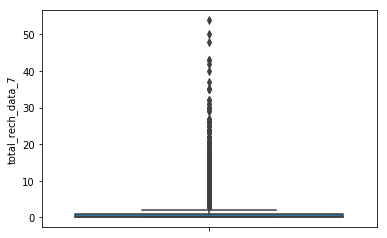

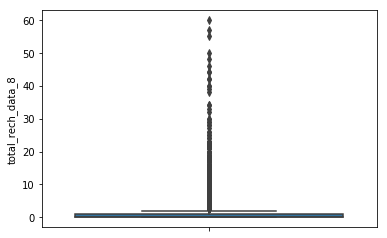

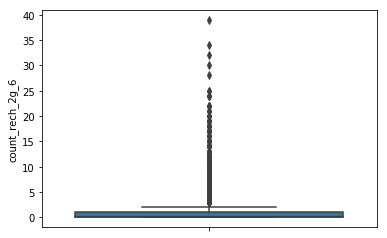

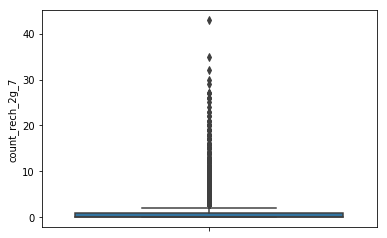

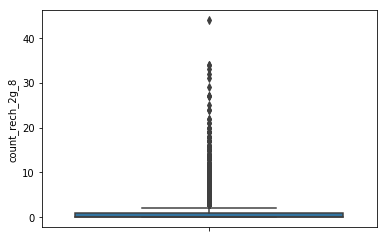

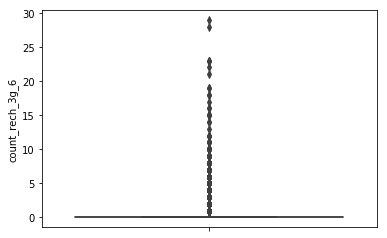

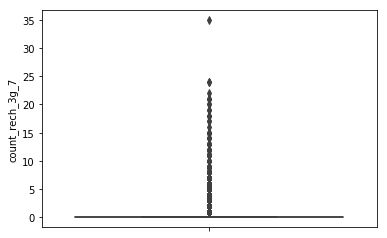

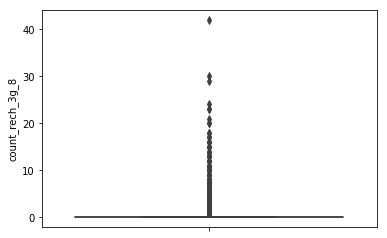

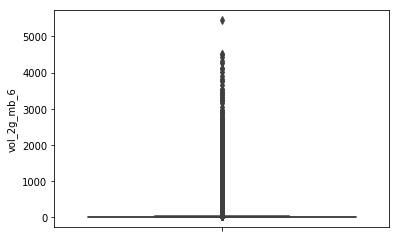

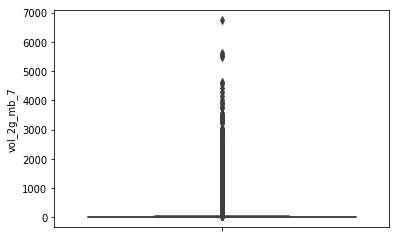

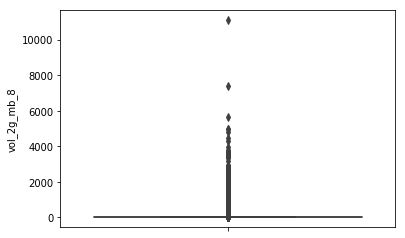

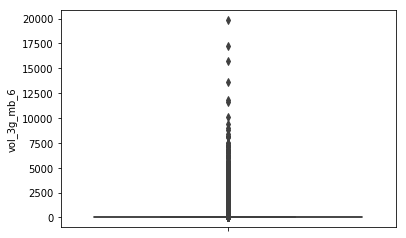

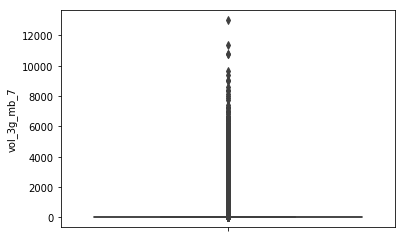

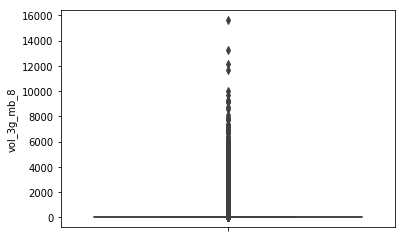

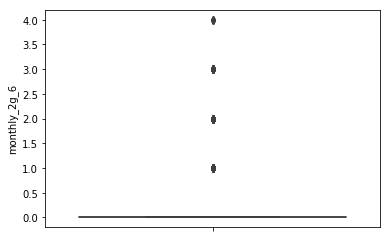

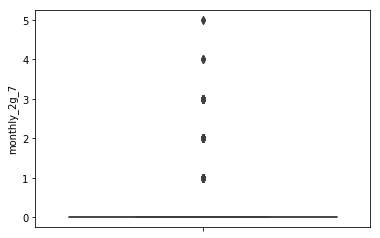

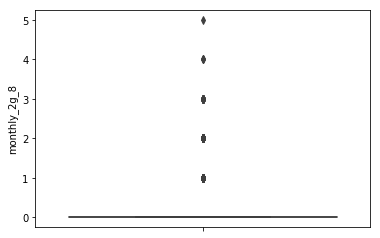

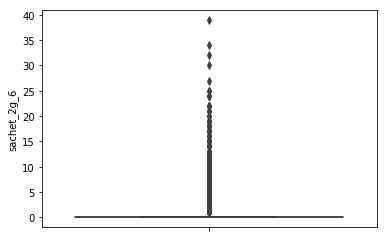

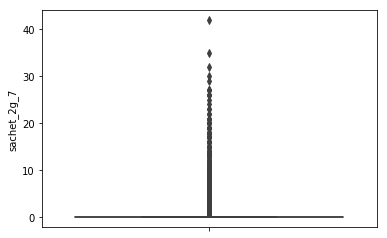

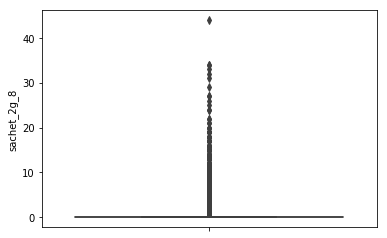

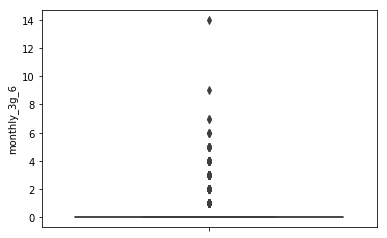

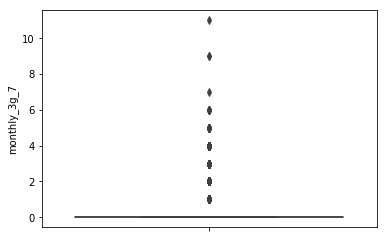

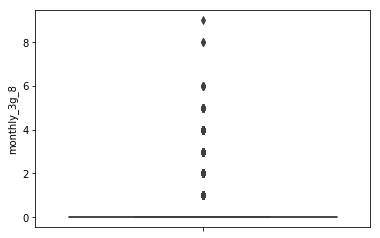

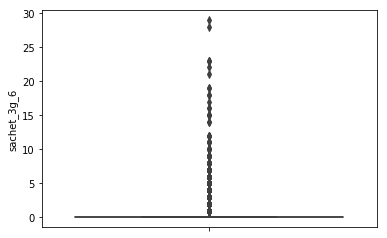

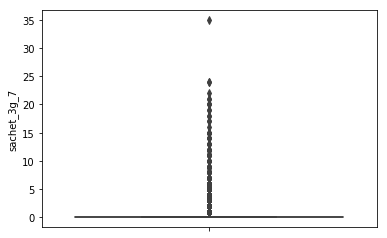

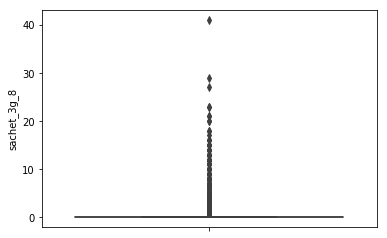

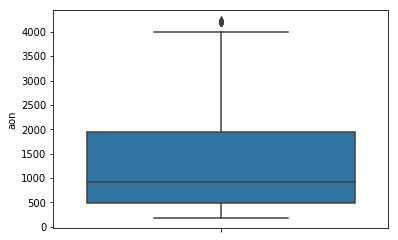

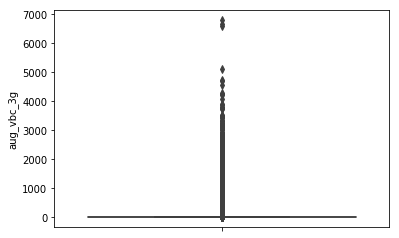

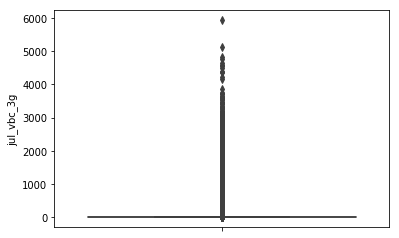

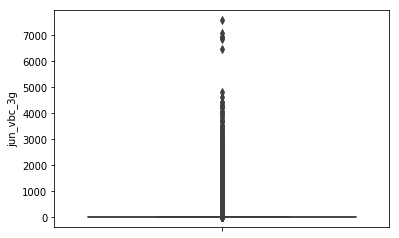

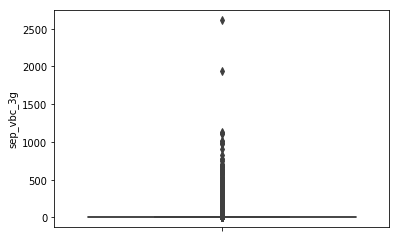

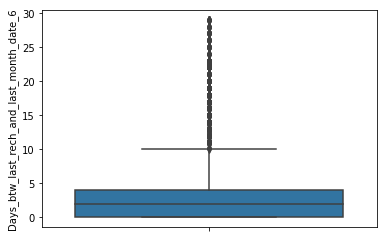

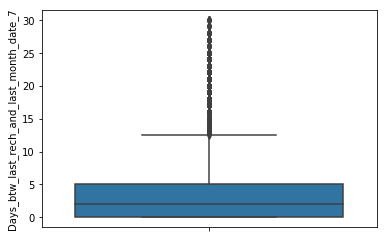

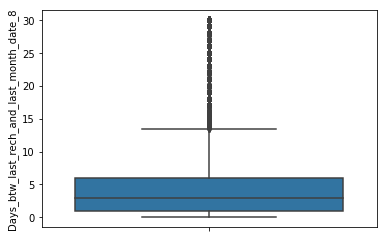

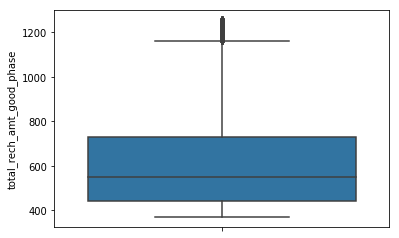

In [113]:
for x in non_binary_columns:
    plt.subplot(1,1,1)
    sns.boxplot(y=x, data=df_telecom3)
    plt.show()

In [114]:
telecom = df_telecom3

---------------------------------------------------------------------------------------------------------------------

<font color='green' size=4> Adding the Data for the months 6th and 7th and form it good phase Data. And similarly 8th month data will become that of action phase.</font>

In [115]:
# list of all the features to be added for good phase
tmp = []
for col in june_columns:
    tmp.append(col[:-1])   

In [116]:
# creating variables and data for the good phase
for col in tmp:
    telecom[col+'gd_phase'] = (telecom[col+'6'] + telecom[col+'7'])/2

In [117]:
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7    7.000702e+09  1069.180  1349.850  3171.480        57.84        54.68   
8    7.001525e+09   378.721   492.223   137.362       413.69       351.03   
13   7.002192e+09   492.846   205.671   593.260       501.76       108.39   
16   7.000876e+09   430.975   299.869   187.894        50.51        74.01   
17   7.000187e+09   690.008    18.980    25.499      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16          

In [118]:
# creating variables and data for the action phase
for col in tmp:
    telecom[col+'act_phase'] = (telecom[col+'8'])

In [119]:
# dropping the original columns
june_columns = []
for x in telecom.columns:
    if '6' in x:
        june_columns.append(x)
july_columns = []
for x in telecom.columns:
    if '7' in x:
        july_columns.append(x)
aug_columns = []
for x in telecom.columns:
    if '8' in x:
        aug_columns.append(x)


In [120]:
telecom = telecom.drop(june_columns, axis=1)
telecom = telecom.drop(july_columns, axis=1)
telecom = telecom.drop(aug_columns, axis=1)
telecom.head()

mobile_number     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7    7.000702e+09   802.0       57.74       19.38       18.74         0.0   
8    7.001525e+09   315.0       21.03      910.65      122.16         0.0   
13   7.002192e+09  2607.0        0.00        0.00        0.00         0.0   
16   7.000876e+09   511.0        0.00        2.45       21.89         0.0   
17   7.000187e+09   667.0        0.00        0.00        0.00         0.0   

    total_rech_amt_good_phase  churn  arpu_gd_phase  onnet_mou_gd_phase  \
7                      1185.0      1      1209.5150              56.260   
8                       519.0      0       435.4720             382.360   
13                      380.0      0       349.2585             305.075   
16                      459.0      0       365.4220              62.260   
17                      408.0      0       354.4940             597.595   

    offnet_mou_gd_phase  roam_ic_mou_gd_phase  roam_og_mou_gd_phase  \
7               510.295                24.860                18.165   
8                87.645                 0.000                 0.000   
13              266.295                83.885                21.620   
16              263.015                 1.415                 8.870   
17               30.820                 2.380                 4.230   

    loc_og_t2t_mou_gd_phase  loc_og_t2m_mou_gd_phase  loc_og_t2f_mou_gd_phase  \
7                    41.385                  378.005                   58.635   
8                   257.360                   75.770                    0.000   
13                   27.910                   99.205                    2.270   
16                   53.885                  209.640                    2.240   
17                   19.495                   29.270                    0.000   

    loc_og_t2c_mou_gd_phase  loc_og_mou_gd_phase  std_og_t2t_mou_gd_phase  \
7                       0.0              478.035                   13.795   
8                       0.0              333.135                  124.995   
13                      0.0              129.395                  266.195   
16                      0.0              265.775                    5.235   
17                      0.0               48.770                  573.860   

    std_og_t2m_mou_gd_phase  std_og_t2f_mou_gd_phase  std_og_mou_gd_phase  \
7                    40.825                    13.37               68.000   
8                    11.865                     0.00              136.870   
13                  154.150                     0.00              420.355   
16                   43.750                     0.00               48.990   
17                    0.775                     0.00              574.635   

    isd_og_mou_gd_phase  spl_og_mou_gd_phase  og_others_gd_phase  \
7                  0.09                 2.25               0.000   
8                  0.00                 0.00               0.000   
13                 0.00                 0.00               0.000   
16                 0.00                 1.63               0.000   
17                 0.00                 1.29               0.465   

    total_og_mou_gd_phase  loc_ic_t2t_mou_gd_phase  loc_ic_t2m_mou_gd_phase  \
7                 548.385                   45.200                  219.525   
8                 470.010                   16.840                   35.780   
13                549.750                   37.730                   80.705   
16                316.410                   56.385                  188.250   
17                625.170                   17.270                   24.860   

    loc_ic_t2f_mou_gd_phase  loc_ic_mou_gd_phase  std_ic_t2t_mou_gd_phase  \
7                   126.810              391.555                   24.360   
8                     0.000               52.630                    0.290   
13                    2.405              120.845                   76.985   
16                    8.695              253.345          

In [121]:
telecom['gd_phase_vbc_3g'] = (telecom['jul_vbc_3g']+telecom['jun_vbc_3g'])/2
telecom['act_phase_vbc_3g'] = (telecom['aug_vbc_3g'])
# We no longer need the variable 'total_rech_amt_good_phase', hence dropping it 
telecom = telecom.drop('total_rech_amt_good_phase', axis=1)


In [122]:
telecom.head()

mobile_number     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7    7.000702e+09   802.0       57.74       19.38       18.74         0.0   
8    7.001525e+09   315.0       21.03      910.65      122.16         0.0   
13   7.002192e+09  2607.0        0.00        0.00        0.00         0.0   
16   7.000876e+09   511.0        0.00        2.45       21.89         0.0   
17   7.000187e+09   667.0        0.00        0.00        0.00         0.0   

    churn  arpu_gd_phase  onnet_mou_gd_phase  offnet_mou_gd_phase  \
7       1      1209.5150              56.260              510.295   
8       0       435.4720             382.360               87.645   
13      0       349.2585             305.075              266.295   
16      0       365.4220              62.260              263.015   
17      0       354.4940             597.595               30.820   

    roam_ic_mou_gd_phase  roam_og_mou_gd_phase  loc_og_t2t_mou_gd_phase  \
7                 24.860                18.165                   41.385   
8                  0.000                 0.000                  257.360   
13                83.885                21.620                   27.910   
16                 1.415                 8.870                   53.885   
17                 2.380                 4.230                   19.495   

    loc_og_t2m_mou_gd_phase  loc_og_t2f_mou_gd_phase  loc_og_t2c_mou_gd_phase  \
7                   378.005                   58.635                      0.0   
8                    75.770                    0.000                      0.0   
13                   99.205                    2.270                      0.0   
16                  209.640                    2.240                      0.0   
17                   29.270                    0.000                      0.0   

    loc_og_mou_gd_phase  std_og_t2t_mou_gd_phase  std_og_t2m_mou_gd_phase  \
7               478.035                   13.795                   40.825   
8               333.135                  124.995                   11.865   
13              129.395                  266.195                  154.150   
16              265.775                    5.235                   43.750   
17               48.770                  573.860                    0.775   

    std_og_t2f_mou_gd_phase  std_og_mou_gd_phase  isd_og_mou_gd_phase  \
7                     13.37               68.000                 0.09   
8                      0.00              136.870                 0.00   
13                     0.00              420.355                 0.00   
16                     0.00               48.990                 0.00   
17                     0.00              574.635                 0.00   

    spl_og_mou_gd_phase  og_others_gd_phase  total_og_mou_gd_phase  \
7                  2.25               0.000                548.385   
8                  0.00               0.000                470.010   
13                 0.00               0.000                549.750   
16                 1.63               0.000                316.410   
17                 1.29               0.465                625.170   

    loc_ic_t2t_mou_gd_phase  loc_ic_t2m_mou_gd_phase  loc_ic_t2f_mou_gd_phase  \
7                    45.200                  219.525                  126.810   
8                    16.840                   35.780                    0.000   
13                   37.730                   80.705                    2.405   
16                   56.385                  188.250                    8.695   
17                   17.270                   24.860                    0.000   

    loc_ic_mou_gd_phase  std_ic_t2t_mou_gd_phase  std_ic_t2m_mou_gd_phase  \
7               391.555                   24.360                  109.215   
8                52.630                    0.290                   13.255   
13              120.845                   76.985                  168.960   
16              253.345                   73.715                   45.

In [123]:
telecom = telecom.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g'], axis=1)

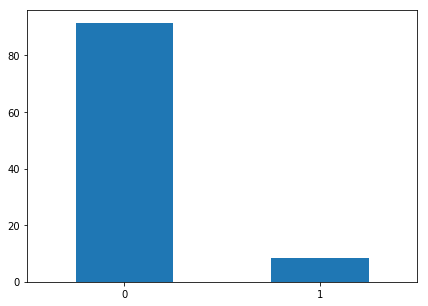

In [124]:
# checking the imbalance once again
plt.figure(figsize=(7,5))
ax = round(100*(telecom['churn'].value_counts()/len(telecom.index)),2).plot(kind='bar', rot=0)

plt.show()

In [125]:
binary_columns = []
for col in telecom.columns:
    if (len(telecom[col].unique())<=2):
        binary_columns.append(col)
binary_columns

['churn']

<font color='green' size=4>Making an original DataFrame to be used for modeling with and without PCA</font>

In [126]:
df_telecom_original = telecom

# <font color='brown'> Model Formation</font>

## <font color='brown'> Model Building: Using RFE and Manual Selection Methods</font>

In [127]:
# defining target variance 'y'
y = telecom[['mobile_number','churn']]
y = y.set_index('mobile_number')
# defining the Dataset containing the independent variables
X = telecom.drop('churn', axis=1)
X = X.set_index('mobile_number')
# spliting into train and test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

non_binary_columns = []
for col in telecom.columns:
    if (len(telecom[col].unique())>2):
        non_binary_columns.append(col)

non_binary_columns.pop(0)

'mobile_number'

## Scaling

In [128]:
# instantiation a variable
scaler = StandardScaler()

# applying the scaler and fit_transform on the numerical variables
X_train[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])

X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

aon  arpu_gd_phase  onnet_mou_gd_phase  \
mobile_number                                                
7.001327e+09  -0.370972       1.646860            0.898915   
7.001300e+09  -0.986701      -1.702922           -0.748540   
7.000634e+09  -0.185130       1.755739            1.581330   
7.001591e+09   2.428907      -0.174873           -0.493426   
7.000346e+09  -1.110255       0.605805            1.753284   

               offnet_mou_gd_phase  roam_ic_mou_gd_phase  \
mobile_number                                              
7.001327e+09             -0.468516             -0.232412   
7.001300e+09             -1.118308             -0.232412   
7.000634e+09              1.677682             -0.232412   
7.001591e+09             -0.370281             -0.232412   
7.000346e+09             -0.025502             -0.232412   

               roam_og_mou_gd_phase  loc_og_t2t_mou_gd_phase  \
mobile_number                                                  
7.001327e+09              -0.308203                 0.075326   
7.001300e+09              -0.308203                -0.429153   
7.000634e+09              -0.308203                -0.283221   
7.001591e+09              -0.308203                -0.138283   
7.000346e+09              -0.308203                 0.005329   

               loc_og_t2m_mou_gd_phase  loc_og_t2f_mou_gd_phase  \
mobile_number                                                     
7.001327e+09                 -0.220457                -0.366934   
7.001300e+09                 -0.852234                -0.320043   
7.000634e+09                 -0.630399                -0.233323   
7.001591e+09                  0.389042                -0.192081   
7.000346e+09                 -0.221210                -0.277954   

               loc_og_t2c_mou_gd_phase  loc_og_mou_gd_phase  \
mobile_number                                                 
7.001327e+09                 -0.250110            -0.101425   
7.001300e+09                 -0.250110            -0.830249   
7.000634e+09                 -0.055025            -0.589594   
7.001591e+09                 -0.250110             0.140031   
7.000346e+09                  0.011735            -0.144224   

               std_og_t2t_mou_gd_phase  std_og_t2m_mou_gd_phase  \
mobile_number                                                     
7.001327e+09                  0.994196                -0.314735   
7.001300e+09                 -0.546387                -0.583562   
7.000634e+09                  2.006003                 2.282028   
7.001591e+09                 -0.447927                -0.569752   
7.000346e+09                  2.011487                 0.188247   

               std_og_t2f_mou_gd_phase  std_og_mou_gd_phase  \
mobile_number                                                 
7.001327e+09                 -0.015250             0.497058   
7.001300e+09                 -0.180761            -0.784331   
7.000634e+09                 -0.180761             2.961893   
7.001591e+09                 -0.180761            -0.704946   
7.000346e+09                 -0.180761             1.556313   

               isd_og_mou_gd_phase  spl_og_mou_gd_phase  og_others_gd_phase  \
mobile_number                                                                 
7.001327e+09             -0.101597             0.659637            1.050049   
7.001300e+09              0.386435            -0.387875           -0.291620   
7.000634e+09             -0.101597            -0.176813           -0.291620   
7.001591e+09             -0.101597            -0.387875           -0.291620   
7.000346e+09             -0.101597            -0.076379            1.011098   

               total_og_mou_gd_phase  loc_ic_t2t_mou_gd_phase  \
mobile_number                                                   
7.001327e+09                0.443391                 0.105901   
7.001300e+09               -1.328246                -0.435017   
7.000634e+09                2.482428                -0.339181   
7.001591e+09

In [129]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [130]:
# Instantiating a Logistic Regression variable
## taking into account class imbalance
Logreg = LogisticRegression(class_weight='balanced')

# using RFE
rfe = RFE(Logreg, 25)  # selecting only the 15 features
rfe = rfe.fit(X_train, y_train)

# checking the columns supported by RFE
col = X_train.columns[rfe.support_]
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

[('aon', False, 6),
 ('arpu_gd_phase', False, 37),
 ('onnet_mou_gd_phase', False, 5),
 ('offnet_mou_gd_phase', True, 1),
 ('roam_ic_mou_gd_phase', False, 45),
 ('roam_og_mou_gd_phase', False, 27),
 ('loc_og_t2t_mou_gd_phase', True, 1),
 ('loc_og_t2m_mou_gd_phase', False, 30),
 ('loc_og_t2f_mou_gd_phase', False, 11),
 ('loc_og_t2c_mou_gd_phase', False, 51),
 ('loc_og_mou_gd_phase', True, 1),
 ('std_og_t2t_mou_gd_phase', True, 1),
 ('std_og_t2m_mou_gd_phase', False, 43),
 ('std_og_t2f_mou_gd_phase', False, 64),
 ('std_og_mou_gd_phase', True, 1),
 ('isd_og_mou_gd_phase', False, 33),
 ('spl_og_mou_gd_phase', False, 50),
 ('og_others_gd_phase', False, 35),
 ('total_og_mou_gd_phase', True, 1),
 ('loc_ic_t2t_mou_gd_phase', False, 21),
 ('loc_ic_t2m_mou_gd_phase', True, 1),
 ('loc_ic_t2f_mou_gd_phase', False, 34),
 ('loc_ic_mou_gd_phase', False, 53),
 ('std_ic_t2t_mou_gd_phase', False, 3),
 ('std_ic_t2m_mou_gd_phase', False, 2),
 ('std_ic_t2f_mou_gd_phase', False, 4),
 ('std_ic_mou_gd_phase', 

In [131]:
X_train_rfe = X_train[col]
# adding a constant 
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19512
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 09 Dec 2020   Deviance:                          nan
Time:                        22:53:21   Pearson chi2:                 2.42e+05
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.1884      0.164    -25.490      0.000      -4.510      -3.866
offnet_mou_gd_phase                                  1.1891      0.163      7.287      0.000       0.869       1.509
loc_og_t2t_mou_gd_phase                              1.0569      0.146      7.219      0.000       0.770       1.344
loc_og_mou_gd_phase                                 -1.0207      0.438     -2.333      0.020      -1.878      -0.163
std_og_t2t_mou_gd_phase                              1.0358      0.170      6.086      0.000       0.702       1.369
std_og_mou_gd_phase                                 -0.9268      0.608     -1.525      0.127      -2.118       0.264
total_og_mou_gd_phase                               -0.1961      0.587     -0.334      0.738      -1.347       0.955
loc_ic_t2m_mou_gd_phase                              0.3701      0.067      5.502      0.000       0.238       0.502
std_ic_mou_gd_phase                                  0.1844      0.050      3.651      0.000       0.085       0.283
onnet_mou_act_phase                                  1.2586      0.208      6.050      0.000       0.851       1.666
loc_og_t2m_mou_act_phase                             0.5227      0.235      2.220      0.026       0.061       0.984
loc_og_mou_act_phase                                -0.4766      0.223     -2.136      0.033      -0.914      -0.039
std_og_t2m_mou_act_phase                             0.9751      0.210      4.653      0.000       0.564       1.386
og_others_act_phase                                 -7.8638      8.056     -0.976      0.329     -23.653       7.926
total_og_mou_act_phase                              -2.4848      0.313     -7.942      0.000      -3.098      -1.872
loc_ic_t2t_mou_act_phase                             1.1396      0.374      3.046      0.002       0.406       1.873
loc_ic_t2m_mou_act_phase                             0.9478      0.503      1.884      0.060      -0.038       1.934
std_ic_t2t_mou_act_phase                             0.9347      0.485      1.927      0.054      -0.016       1.885
std_ic_t2m_mou_act_phase                             1.6572      0.863      1.921      0.055      -0.034       3.348
std_ic_mou_act_phase                                -1.4142      1.346     -1.051      0.293      -4.051       1.223
total_ic_mou_act_phase                              -3.4236      0.778     -4.398      0.000      -4.949      -1.898
isd_ic_mou_act_phase                                 0.7014      0.165      4.247      0.000       0.378       1.025
last_day_rch_amt_act_phase                          -0.4615      0.058     -7.946      0.000      -0.575      -0.348
vol_3g_mb_act_phase                                 -0.8026      0.103     -7.812      0.000      -1.004      -0.601
mon

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
4                                std_og_mou_gd_phase  508.18
5                              total_og_mou_gd_phase  505.96
2                                loc_og_mou_gd_phase  249.01
13                            total_og_mou_act_phase  136.75
8                                onnet_mou_act_phase   66.65
18                              std_ic_mou_act_phase   63.49
11                          std_og_t2m_mou_act_phase   55.47
19                            total_ic_mou_act_phase   55.45
3                            std_og_t2t_mou_gd_phase   53.13
0                                offnet_mou_gd_phase   49.50
17                          std_ic_t2m_mou_act_phase   30.74
1                            loc_og_t2t_mou_gd_phase   26.56
15                          loc_ic_t2m_mou_act_phase   24.33
9                           loc_og_t2m_mou_act_phase   22.45
14                          loc_ic_t2t_mou_act_phase   12.58
16                          std_ic_t2t_mou_act_phase   10.42
10                              loc_og_mou_act_phase    8.91
20                              isd_ic_mou_act_phase    3.42
6                            loc_ic_t2m_mou_gd_phase    3.08
7                                std_ic_mou_gd_phase    2.24
24  Days_btw_last_rech_and_last_month_date_act_phase    1.16
21                        last_day_rch_amt_act_phase    1.15
22                               vol_3g_mb_act_phase    1.11
23                              monthly_2g_act_phase    1.07
12                               og_others_act_phase    1.01

In [134]:
col = col.drop('std_og_t2t_mou_gd_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19513
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 09 Dec 2020   Deviance:                          nan
Time:                        22:53:23   Pearson chi2:                 2.47e+05
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.2030      0.166    -25.368      0.000      -4.528      -3.878
offnet_mou_gd_phase                                  0.2332      0.047      4.945      0.000       0.141       0.326
loc_og_t2t_mou_gd_phase                              0.4681      0.112      4.196      0.000       0.249       0.687
loc_og_mou_gd_phase                                 -0.2780      0.430     -0.647      0.518      -1.120       0.564
std_og_mou_gd_phase                                  0.2709      0.588      0.461      0.645      -0.881       1.423
total_og_mou_gd_phase                               -0.0361      0.598     -0.060      0.952      -1.207       1.135
loc_ic_t2m_mou_gd_phase                              0.3668      0.068      5.434      0.000       0.235       0.499
std_ic_mou_gd_phase                                  0.1767      0.051      3.499      0.000       0.078       0.276
onnet_mou_act_phase                                  1.5715      0.205      7.652      0.000       1.169       1.974
loc_og_t2m_mou_act_phase                             0.6848      0.236      2.897      0.004       0.222       1.148
loc_og_mou_act_phase                                -0.5247      0.225     -2.334      0.020      -0.965      -0.084
std_og_t2m_mou_act_phase                             1.1545      0.210      5.485      0.000       0.742       1.567
og_others_act_phase                                 -8.2493      8.128     -1.015      0.310     -24.180       7.681
total_og_mou_act_phase                              -2.8633      0.311     -9.194      0.000      -3.474      -2.253
loc_ic_t2t_mou_act_phase                             1.1157      0.373      2.994      0.003       0.385       1.846
loc_ic_t2m_mou_act_phase                             0.9271      0.501      1.851      0.064      -0.054       1.909
std_ic_t2t_mou_act_phase                             0.9177      0.481      1.909      0.056      -0.024       1.860
std_ic_t2m_mou_act_phase                             1.6215      0.855      1.897      0.058      -0.054       3.297
std_ic_mou_act_phase                                -1.3555      1.333     -1.017      0.309      -3.969       1.258
total_ic_mou_act_phase                              -3.4299      0.774     -4.431      0.000      -4.947      -1.913
isd_ic_mou_act_phase                                 0.6991      0.165      4.248      0.000       0.377       1.022
last_day_rch_amt_act_phase                          -0.4405      0.058     -7.655      0.000      -0.553      -0.328
vol_3g_mb_act_phase                                 -0.7784      0.101     -7.689      0.000      -0.977      -0.580
monthly_2g_act_phase                                -0.4256      0.082     -5.207      0.000      -0.586      -0.265
Day

In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
4                              total_og_mou_gd_phase  491.96
3                                std_og_mou_gd_phase  473.24
2                                loc_og_mou_gd_phase  235.63
12                            total_og_mou_act_phase  133.24
7                                onnet_mou_act_phase   63.92
17                              std_ic_mou_act_phase   63.49
18                            total_ic_mou_act_phase   55.40
10                          std_og_t2m_mou_act_phase   54.33
16                          std_ic_t2m_mou_act_phase   30.73
14                          loc_ic_t2m_mou_act_phase   24.31
8                           loc_og_t2m_mou_act_phase   21.65
13                          loc_ic_t2t_mou_act_phase   12.57
15                          std_ic_t2t_mou_act_phase   10.42
9                               loc_og_mou_act_phase    8.85
1                            loc_og_t2t_mou_gd_phase    8.47
0                                offnet_mou_gd_phase    4.16
19                              isd_ic_mou_act_phase    3.42
5                            loc_ic_t2m_mou_gd_phase    3.08
6                                std_ic_mou_gd_phase    2.24
23  Days_btw_last_rech_and_last_month_date_act_phase    1.16
20                        last_day_rch_amt_act_phase    1.15
21                               vol_3g_mb_act_phase    1.11
22                              monthly_2g_act_phase    1.07
11                               og_others_act_phase    1.01

In [136]:
col = col.drop('loc_og_t2t_mou_gd_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19514
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 09 Dec 2020   Deviance:                          nan
Time:                        22:53:25   Pearson chi2:                 3.83e+05
No. Iterations:                   100   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.1902      0.164    -25.589      0.000      -4.511      -3.869
offnet_mou_gd_phase                                  0.1755      0.045      3.892      0.000       0.087       0.264
loc_og_mou_gd_phase                                  0.1962      0.420      0.467      0.641      -0.627       1.020
std_og_mou_gd_phase                                  0.4882      0.595      0.820      0.412      -0.679       1.655
total_og_mou_gd_phase                               -0.2169      0.606     -0.358      0.721      -1.405       0.971
loc_ic_t2m_mou_gd_phase                              0.3012      0.066      4.593      0.000       0.173       0.430
std_ic_mou_gd_phase                                  0.1767      0.050      3.510      0.000       0.078       0.275
onnet_mou_act_phase                                  1.5863      0.206      7.699      0.000       1.182       1.990
loc_og_t2m_mou_act_phase                             0.2144      0.205      1.046      0.295      -0.187       0.616
loc_og_mou_act_phase                                -0.0725      0.185     -0.392      0.695      -0.435       0.290
std_og_t2m_mou_act_phase                             1.2327      0.210      5.862      0.000       0.821       1.645
og_others_act_phase                                 -7.9558      8.015     -0.993      0.321     -23.666       7.754
total_og_mou_act_phase                              -2.9308      0.312     -9.383      0.000      -3.543      -2.319
loc_ic_t2t_mou_act_phase                             1.2722      0.374      3.397      0.001       0.538       2.006
loc_ic_t2m_mou_act_phase                             1.1605      0.502      2.310      0.021       0.176       2.145
std_ic_t2t_mou_act_phase                             0.9447      0.486      1.944      0.052      -0.008       1.897
std_ic_t2m_mou_act_phase                             1.6797      0.864      1.944      0.052      -0.014       3.373
std_ic_mou_act_phase                                -1.3118      1.349     -0.972      0.331      -3.956       1.333
total_ic_mou_act_phase                              -3.7240      0.780     -4.777      0.000      -5.252      -2.196
isd_ic_mou_act_phase                                 0.7604      0.165      4.596      0.000       0.436       1.085
last_day_rch_amt_act_phase                          -0.4436      0.057     -7.715      0.000      -0.556      -0.331
vol_3g_mb_act_phase                                 -0.7643      0.101     -7.591      0.000      -0.962      -0.567
monthly_2g_act_phase                                -0.4256      0.082     -5.210      0.000      -0.586      -0.265
Days_btw_last_rech_and_last_month_date_act_phase     0.4079      0.027     14.990      0.000       0.355       0.461
===

In [137]:
col = col.drop('og_others_act_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19515
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3437.3
Date:                Wed, 09 Dec 2020   Deviance:                       6874.6
Time:                        22:53:25   Pearson chi2:                 3.72e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.0502      0.076    -53.189      0.000      -4.199      -3.901
offnet_mou_gd_phase                                  0.1736      0.045      3.854      0.000       0.085       0.262
loc_og_mou_gd_phase                                  0.2036      0.421      0.484      0.628      -0.621       1.028
std_og_mou_gd_phase                                  0.4976      0.596      0.835      0.404      -0.670       1.665
total_og_mou_gd_phase                               -0.2264      0.607     -0.373      0.709      -1.415       0.963
loc_ic_t2m_mou_gd_phase                              0.3020      0.066      4.600      0.000       0.173       0.431
std_ic_mou_gd_phase                                  0.1778      0.050      3.527      0.000       0.079       0.277
onnet_mou_act_phase                                  1.5909      0.206      7.721      0.000       1.187       1.995
loc_og_t2m_mou_act_phase                             0.2163      0.205      1.056      0.291      -0.185       0.618
loc_og_mou_act_phase                                -0.0745      0.185     -0.403      0.687      -0.437       0.288
std_og_t2m_mou_act_phase                             1.2379      0.210      5.886      0.000       0.826       1.650
total_og_mou_act_phase                              -2.9376      0.312     -9.406      0.000      -3.550      -2.325
loc_ic_t2t_mou_act_phase                             1.2343      0.369      3.344      0.001       0.511       1.958
loc_ic_t2m_mou_act_phase                             1.1079      0.495      2.240      0.025       0.138       2.078
std_ic_t2t_mou_act_phase                             0.9045      0.479      1.888      0.059      -0.035       1.844
std_ic_t2m_mou_act_phase                             1.6081      0.852      1.888      0.059      -0.062       3.278
std_ic_mou_act_phase                                -1.2558      1.333     -0.942      0.346      -3.867       1.356
total_ic_mou_act_phase                              -3.6447      0.767     -4.752      0.000      -5.148      -2.141
isd_ic_mou_act_phase                                 0.7443      0.163      4.567      0.000       0.425       1.064
last_day_rch_amt_act_phase                          -0.4435      0.057     -7.717      0.000      -0.556      -0.331
vol_3g_mb_act_phase                                 -0.7646      0.101     -7.593      0.000      -0.962      -0.567
monthly_2g_act_phase                                -0.4251      0.082     -5.204      0.000      -0.585      -0.265
Days_btw_last_rech_and_last_month_date_act_phase     0.4074      0.027     14.985      0.000       0.354       0.461
====================================================================================================================
"""

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
3                              total_og_mou_gd_phase  491.89
2                                std_og_mou_gd_phase  472.99
1                                loc_og_mou_gd_phase  228.81
10                            total_og_mou_act_phase  131.46
6                                onnet_mou_act_phase   63.53
15                              std_ic_mou_act_phase   63.47
16                            total_ic_mou_act_phase   55.11
9                           std_og_t2m_mou_act_phase   53.08
14                          std_ic_t2m_mou_act_phase   30.71
12                          loc_ic_t2m_mou_act_phase   23.96
7                           loc_og_t2m_mou_act_phase   19.61
11                          loc_ic_t2t_mou_act_phase   12.48
13                          std_ic_t2t_mou_act_phase   10.41
8                               loc_og_mou_act_phase    6.52
17                              isd_ic_mou_act_phase    3.40
0                                offnet_mou_gd_phase    3.33
4                            loc_ic_t2m_mou_gd_phase    2.92
5                                std_ic_mou_gd_phase    2.24
18                        last_day_rch_amt_act_phase    1.15
21  Days_btw_last_rech_and_last_month_date_act_phase    1.15
19                               vol_3g_mb_act_phase    1.11
20                              monthly_2g_act_phase    1.07

In [139]:
col = col.drop('loc_ic_t2m_mou_act_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19516
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3439.7
Date:                Wed, 09 Dec 2020   Deviance:                       6879.5
Time:                        22:53:26   Pearson chi2:                 3.28e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.0607      0.076    -53.378      0.000      -4.210      -3.912
offnet_mou_gd_phase                                  0.1695      0.045      3.765      0.000       0.081       0.258
loc_og_mou_gd_phase                                  0.2341      0.422      0.555      0.579      -0.593       1.061
std_og_mou_gd_phase                                  0.5472      0.597      0.916      0.360      -0.623       1.718
total_og_mou_gd_phase                               -0.2751      0.608     -0.452      0.651      -1.467       0.917
loc_ic_t2m_mou_gd_phase                              0.3178      0.066      4.803      0.000       0.188       0.448
std_ic_mou_gd_phase                                  0.1770      0.050      3.509      0.000       0.078       0.276
onnet_mou_act_phase                                  1.6396      0.206      7.971      0.000       1.236       2.043
loc_og_t2m_mou_act_phase                             0.3135      0.204      1.538      0.124      -0.086       0.713
loc_og_mou_act_phase                                -0.1086      0.191     -0.569      0.570      -0.483       0.266
std_og_t2m_mou_act_phase                             1.2922      0.210      6.161      0.000       0.881       1.703
total_og_mou_act_phase                              -3.0164      0.312     -9.674      0.000      -3.628      -2.405
loc_ic_t2t_mou_act_phase                             0.5334      0.197      2.710      0.007       0.148       0.919
std_ic_t2t_mou_act_phase                             1.8585      0.249      7.470      0.000       1.371       2.346
std_ic_t2m_mou_act_phase                             3.3048      0.443      7.462      0.000       2.437       4.173
std_ic_mou_act_phase                                -4.0001      0.604     -6.626      0.000      -5.183      -2.817
total_ic_mou_act_phase                              -2.0287      0.250     -8.109      0.000      -2.519      -1.538
isd_ic_mou_act_phase                                 0.4130      0.068      6.064      0.000       0.280       0.547
last_day_rch_amt_act_phase                          -0.4482      0.058     -7.790      0.000      -0.561      -0.335
vol_3g_mb_act_phase                                 -0.7631      0.101     -7.586      0.000      -0.960      -0.566
monthly_2g_act_phase                                -0.4256      0.082     -5.210      0.000      -0.586      -0.266
Days_btw_last_rech_and_last_month_date_act_phase     0.4078      0.027     15.007      0.000       0.355       0.461
====================================================================================================================
"""

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
3                              total_og_mou_gd_phase  491.87
2                                std_og_mou_gd_phase  472.99
1                                loc_og_mou_gd_phase  228.79
10                            total_og_mou_act_phase  119.70
6                                onnet_mou_act_phase   58.23
14                              std_ic_mou_act_phase   49.19
9                           std_og_t2m_mou_act_phase   48.43
13                          std_ic_t2m_mou_act_phase   29.75
7                           loc_og_t2m_mou_act_phase   17.72
12                          std_ic_t2t_mou_act_phase   10.08
15                            total_ic_mou_act_phase    6.89
8                               loc_og_mou_act_phase    6.51
0                                offnet_mou_gd_phase    3.32
4                            loc_ic_t2m_mou_gd_phase    2.80
11                          loc_ic_t2t_mou_act_phase    2.70
5                                std_ic_mou_gd_phase    2.24
16                              isd_ic_mou_act_phase    1.33
20  Days_btw_last_rech_and_last_month_date_act_phase    1.15
17                        last_day_rch_amt_act_phase    1.14
18                               vol_3g_mb_act_phase    1.11
19                              monthly_2g_act_phase    1.07

In [141]:
col = col.drop('loc_ic_t2t_mou_act_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19517
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3443.1
Date:                Wed, 09 Dec 2020   Deviance:                       6886.2
Time:                        22:53:27   Pearson chi2:                 3.06e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.0660      0.076    -53.330      0.000      -4.215      -3.917
offnet_mou_gd_phase                                  0.1674      0.045      3.724      0.000       0.079       0.256
loc_og_mou_gd_phase                                  0.2603      0.424      0.615      0.539      -0.570       1.090
std_og_mou_gd_phase                                  0.5695      0.600      0.949      0.343      -0.607       1.746
total_og_mou_gd_phase                               -0.2968      0.611     -0.486      0.627      -1.495       0.901
loc_ic_t2m_mou_gd_phase                              0.2755      0.063      4.357      0.000       0.152       0.399
std_ic_mou_gd_phase                                  0.1805      0.051      3.564      0.000       0.081       0.280
onnet_mou_act_phase                                  1.6663      0.206      8.079      0.000       1.262       2.071
loc_og_t2m_mou_act_phase                             0.2035      0.194      1.049      0.294      -0.177       0.584
loc_og_mou_act_phase                                -0.0268      0.176     -0.153      0.879      -0.371       0.317
std_og_t2m_mou_act_phase                             1.3172      0.210      6.267      0.000       0.905       1.729
total_og_mou_act_phase                              -3.0556      0.313     -9.774      0.000      -3.668      -2.443
std_ic_t2t_mou_act_phase                             2.1445      0.222      9.658      0.000       1.709       2.580
std_ic_t2m_mou_act_phase                             3.8090      0.396      9.608      0.000       3.032       4.586
std_ic_mou_act_phase                                -4.8051      0.515     -9.339      0.000      -5.814      -3.797
total_ic_mou_act_phase                              -1.6044      0.179     -8.940      0.000      -1.956      -1.253
isd_ic_mou_act_phase                                 0.3236      0.058      5.621      0.000       0.211       0.436
last_day_rch_amt_act_phase                          -0.4489      0.058     -7.795      0.000      -0.562      -0.336
vol_3g_mb_act_phase                                 -0.7655      0.101     -7.605      0.000      -0.963      -0.568
monthly_2g_act_phase                                -0.4248      0.082     -5.201      0.000      -0.585      -0.265
Days_btw_last_rech_and_last_month_date_act_phase     0.4081      0.027     15.026      0.000       0.355       0.461
====================================================================================================================
"""

In [142]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
3                              total_og_mou_gd_phase  491.84
2                                std_og_mou_gd_phase  472.96
1                                loc_og_mou_gd_phase  228.69
10                            total_og_mou_act_phase  118.58
6                                onnet_mou_act_phase   57.70
9                           std_og_t2m_mou_act_phase   48.03
13                              std_ic_mou_act_phase   47.91
12                          std_ic_t2m_mou_act_phase   29.67
7                           loc_og_t2m_mou_act_phase   17.72
11                          std_ic_t2t_mou_act_phase   10.06
8                               loc_og_mou_act_phase    6.51
0                                offnet_mou_gd_phase    3.32
14                            total_ic_mou_act_phase    2.88
5                                std_ic_mou_gd_phase    2.24
4                            loc_ic_t2m_mou_gd_phase    2.11
15                              isd_ic_mou_act_phase    1.15
19  Days_btw_last_rech_and_last_month_date_act_phase    1.15
16                        last_day_rch_amt_act_phase    1.14
17                               vol_3g_mb_act_phase    1.11
18                              monthly_2g_act_phase    1.07

In [143]:

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19517
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3443.1
Date:                Wed, 09 Dec 2020   Deviance:                       6886.2
Time:                        22:53:28   Pearson chi2:                 3.06e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -4.0660      0.076    -53.330      0.000      -4.215      -3.917
offnet_mou_gd_phase                                  0.1674      0.045      3.724      0.000       0.079       0.256
loc_og_mou_gd_phase                                  0.2603      0.424      0.615      0.539      -0.570       1.090
std_og_mou_gd_phase                                  0.5695      0.600      0.949      0.343      -0.607       1.746
total_og_mou_gd_phase                               -0.2968      0.611     -0.486      0.627      -1.495       0.901
loc_ic_t2m_mou_gd_phase                              0.2755      0.063      4.357      0.000       0.152       0.399
std_ic_mou_gd_phase                                  0.1805      0.051      3.564      0.000       0.081       0.280
onnet_mou_act_phase                                  1.6663      0.206      8.079      0.000       1.262       2.071
loc_og_t2m_mou_act_phase                             0.2035      0.194      1.049      0.294      -0.177       0.584
loc_og_mou_act_phase                                -0.0268      0.176     -0.153      0.879      -0.371       0.317
std_og_t2m_mou_act_phase                             1.3172      0.210      6.267      0.000       0.905       1.729
total_og_mou_act_phase                              -3.0556      0.313     -9.774      0.000      -3.668      -2.443
std_ic_t2t_mou_act_phase                             2.1445      0.222      9.658      0.000       1.709       2.580
std_ic_t2m_mou_act_phase                             3.8090      0.396      9.608      0.000       3.032       4.586
std_ic_mou_act_phase                                -4.8051      0.515     -9.339      0.000      -5.814      -3.797
total_ic_mou_act_phase                              -1.6044      0.179     -8.940      0.000      -1.956      -1.253
isd_ic_mou_act_phase                                 0.3236      0.058      5.621      0.000       0.211       0.436
last_day_rch_amt_act_phase                          -0.4489      0.058     -7.795      0.000      -0.562      -0.336
vol_3g_mb_act_phase                                 -0.7655      0.101     -7.605      0.000      -0.963      -0.568
monthly_2g_act_phase                                -0.4248      0.082     -5.201      0.000      -0.585      -0.265
Days_btw_last_rech_and_last_month_date_act_phase     0.4081      0.027     15.026      0.000       0.355       0.461
====================================================================================================================
"""

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
3                              total_og_mou_gd_phase  491.84
2                                std_og_mou_gd_phase  472.96
1                                loc_og_mou_gd_phase  228.69
10                            total_og_mou_act_phase  118.58
6                                onnet_mou_act_phase   57.70
9                           std_og_t2m_mou_act_phase   48.03
13                              std_ic_mou_act_phase   47.91
12                          std_ic_t2m_mou_act_phase   29.67
7                           loc_og_t2m_mou_act_phase   17.72
11                          std_ic_t2t_mou_act_phase   10.06
8                               loc_og_mou_act_phase    6.51
0                                offnet_mou_gd_phase    3.32
14                            total_ic_mou_act_phase    2.88
5                                std_ic_mou_gd_phase    2.24
4                            loc_ic_t2m_mou_gd_phase    2.11
15                              isd_ic_mou_act_phase    1.15
19  Days_btw_last_rech_and_last_month_date_act_phase    1.15
16                        last_day_rch_amt_act_phase    1.14
17                               vol_3g_mb_act_phase    1.11
18                              monthly_2g_act_phase    1.07

In [145]:
col = col.drop('total_ic_mou_act_phase',1)
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19518
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3498.3
Date:                Wed, 09 Dec 2020   Deviance:                       6996.6
Time:                        22:53:28   Pearson chi2:                 6.53e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.9568      0.073    -54.266      0.000      -4.100      -3.814
offnet_mou_gd_phase                                  0.1927      0.045      4.287      0.000       0.105       0.281
loc_og_mou_gd_phase                                  0.4471      0.431      1.038      0.299      -0.397       1.291
std_og_mou_gd_phase                                  0.7735      0.612      1.265      0.206      -0.425       1.972
total_og_mou_gd_phase                               -0.4775      0.623     -0.766      0.443      -1.699       0.744
loc_ic_t2m_mou_gd_phase                             -0.0418      0.046     -0.911      0.362      -0.132       0.048
std_ic_mou_gd_phase                                  0.2063      0.049      4.179      0.000       0.110       0.303
onnet_mou_act_phase                                  1.8562      0.208      8.927      0.000       1.449       2.264
loc_og_t2m_mou_act_phase                             0.1056      0.225      0.469      0.639      -0.336       0.547
loc_og_mou_act_phase                                -0.5551      0.216     -2.571      0.010      -0.978      -0.132
std_og_t2m_mou_act_phase                             1.4745      0.212      6.957      0.000       1.059       1.890
total_og_mou_act_phase                              -3.3690      0.315    -10.700      0.000      -3.986      -2.752
std_ic_t2t_mou_act_phase                             2.4862      0.230     10.805      0.000       2.035       2.937
std_ic_t2m_mou_act_phase                             4.3826      0.412     10.629      0.000       3.574       5.191
std_ic_mou_act_phase                                -6.3008      0.511    -12.333      0.000      -7.302      -5.299
isd_ic_mou_act_phase                                -0.0181      0.048     -0.375      0.708      -0.113       0.076
last_day_rch_amt_act_phase                          -0.4713      0.058     -8.102      0.000      -0.585      -0.357
vol_3g_mb_act_phase                                 -0.7943      0.102     -7.780      0.000      -0.994      -0.594
monthly_2g_act_phase                                -0.4487      0.082     -5.493      0.000      -0.609      -0.289
Days_btw_last_rech_and_last_month_date_act_phase     0.4129      0.027     15.336      0.000       0.360       0.466
====================================================================================================================
"""

In [146]:
col = col.drop('isd_ic_mou_act_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19519
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3498.4
Date:                Wed, 09 Dec 2020   Deviance:                       6996.8
Time:                        22:53:28   Pearson chi2:                 6.59e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.9568      0.073    -54.265      0.000      -4.100      -3.814
offnet_mou_gd_phase                                  0.1927      0.045      4.287      0.000       0.105       0.281
loc_og_mou_gd_phase                                  0.4496      0.431      1.044      0.296      -0.394       1.294
std_og_mou_gd_phase                                  0.7774      0.611      1.271      0.204      -0.421       1.976
total_og_mou_gd_phase                               -0.4811      0.623     -0.772      0.440      -1.702       0.740
loc_ic_t2m_mou_gd_phase                             -0.0418      0.046     -0.912      0.362      -0.132       0.048
std_ic_mou_gd_phase                                  0.2060      0.049      4.177      0.000       0.109       0.303
onnet_mou_act_phase                                  1.8584      0.208      8.939      0.000       1.451       2.266
loc_og_t2m_mou_act_phase                             0.1048      0.225      0.466      0.641      -0.336       0.546
loc_og_mou_act_phase                                -0.5540      0.216     -2.567      0.010      -0.977      -0.131
std_og_t2m_mou_act_phase                             1.4764      0.212      6.966      0.000       1.061       1.892
total_og_mou_act_phase                              -3.3721      0.315    -10.712      0.000      -3.989      -2.755
std_ic_t2t_mou_act_phase                             2.4848      0.230     10.801      0.000       2.034       2.936
std_ic_t2m_mou_act_phase                             4.3798      0.412     10.624      0.000       3.572       5.188
std_ic_mou_act_phase                                -6.2995      0.511    -12.332      0.000      -7.301      -5.298
last_day_rch_amt_act_phase                          -0.4717      0.058     -8.108      0.000      -0.586      -0.358
vol_3g_mb_act_phase                                 -0.7948      0.102     -7.784      0.000      -0.995      -0.595
monthly_2g_act_phase                                -0.4486      0.082     -5.491      0.000      -0.609      -0.288
Days_btw_last_rech_and_last_month_date_act_phase     0.4131      0.027     15.341      0.000       0.360       0.466
====================================================================================================================
"""

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
3                              total_og_mou_gd_phase  491.49
2                                std_og_mou_gd_phase  472.61
1                                loc_og_mou_gd_phase  228.47
10                            total_og_mou_act_phase  117.67
6                                onnet_mou_act_phase   57.23
9                           std_og_t2m_mou_act_phase   47.76
13                              std_ic_mou_act_phase   47.06
12                          std_ic_t2m_mou_act_phase   29.63
7                           loc_og_t2m_mou_act_phase   17.62
11                          std_ic_t2t_mou_act_phase   10.05
8                               loc_og_mou_act_phase    6.31
0                                offnet_mou_gd_phase    3.29
5                                std_ic_mou_gd_phase    2.23
4                            loc_ic_t2m_mou_gd_phase    1.31
17  Days_btw_last_rech_and_last_month_date_act_phase    1.15
14                        last_day_rch_amt_act_phase    1.14
15                               vol_3g_mb_act_phase    1.11
16                              monthly_2g_act_phase    1.07

In [148]:
col = col.drop('total_og_mou_gd_phase',1)
# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19520
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3498.7
Date:                Wed, 09 Dec 2020   Deviance:                       6997.4
Time:                        22:53:29   Pearson chi2:                 6.49e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.9535      0.073    -54.372      0.000      -4.096      -3.811
offnet_mou_gd_phase                                  0.1926      0.045      4.285      0.000       0.105       0.281
loc_og_mou_gd_phase                                  0.1214      0.069      1.755      0.079      -0.014       0.257
std_og_mou_gd_phase                                  0.3066      0.047      6.564      0.000       0.215       0.398
loc_ic_t2m_mou_gd_phase                             -0.0414      0.046     -0.904      0.366      -0.131       0.048
std_ic_mou_gd_phase                                  0.2051      0.049      4.160      0.000       0.108       0.302
onnet_mou_act_phase                                  1.8743      0.207      9.057      0.000       1.469       2.280
loc_og_t2m_mou_act_phase                             0.1132      0.225      0.503      0.615      -0.328       0.554
loc_og_mou_act_phase                                -0.5501      0.216     -2.549      0.011      -0.973      -0.127
std_og_t2m_mou_act_phase                             1.4933      0.211      7.084      0.000       1.080       1.906
total_og_mou_act_phase                              -3.3962      0.313    -10.841      0.000      -4.010      -2.782
std_ic_t2t_mou_act_phase                             2.5093      0.228     10.999      0.000       2.062       2.956
std_ic_t2m_mou_act_phase                             4.4236      0.409     10.819      0.000       3.622       5.225
std_ic_mou_act_phase                                -6.3554      0.506    -12.552      0.000      -7.348      -5.363
last_day_rch_amt_act_phase                          -0.4689      0.058     -8.079      0.000      -0.583      -0.355
vol_3g_mb_act_phase                                 -0.7832      0.101     -7.790      0.000      -0.980      -0.586
monthly_2g_act_phase                                -0.4501      0.082     -5.509      0.000      -0.610      -0.290
Days_btw_last_rech_and_last_month_date_act_phase     0.4137      0.027     15.371      0.000       0.361       0.466
====================================================================================================================
"""

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
9                             total_og_mou_act_phase  103.84
5                                onnet_mou_act_phase   50.87
12                              std_ic_mou_act_phase   47.06
8                           std_og_t2m_mou_act_phase   42.05
11                          std_ic_t2m_mou_act_phase   29.63
6                           loc_og_t2m_mou_act_phase   15.82
10                          std_ic_t2t_mou_act_phase   10.05
7                               loc_og_mou_act_phase    6.31
2                                std_og_mou_gd_phase    3.78
1                                loc_og_mou_gd_phase    3.69
0                                offnet_mou_gd_phase    3.29
4                                std_ic_mou_gd_phase    2.23
3                            loc_ic_t2m_mou_gd_phase    1.31
16  Days_btw_last_rech_and_last_month_date_act_phase    1.15
13                        last_day_rch_amt_act_phase    1.14
14                               vol_3g_mb_act_phase    1.11
15                              monthly_2g_act_phase    1.07

In [150]:

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19520
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3498.7
Date:                Wed, 09 Dec 2020   Deviance:                       6997.4
Time:                        22:53:30   Pearson chi2:                 6.49e+05
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.9535      0.073    -54.372      0.000      -4.096      -3.811
offnet_mou_gd_phase                                  0.1926      0.045      4.285      0.000       0.105       0.281
loc_og_mou_gd_phase                                  0.1214      0.069      1.755      0.079      -0.014       0.257
std_og_mou_gd_phase                                  0.3066      0.047      6.564      0.000       0.215       0.398
loc_ic_t2m_mou_gd_phase                             -0.0414      0.046     -0.904      0.366      -0.131       0.048
std_ic_mou_gd_phase                                  0.2051      0.049      4.160      0.000       0.108       0.302
onnet_mou_act_phase                                  1.8743      0.207      9.057      0.000       1.469       2.280
loc_og_t2m_mou_act_phase                             0.1132      0.225      0.503      0.615      -0.328       0.554
loc_og_mou_act_phase                                -0.5501      0.216     -2.549      0.011      -0.973      -0.127
std_og_t2m_mou_act_phase                             1.4933      0.211      7.084      0.000       1.080       1.906
total_og_mou_act_phase                              -3.3962      0.313    -10.841      0.000      -4.010      -2.782
std_ic_t2t_mou_act_phase                             2.5093      0.228     10.999      0.000       2.062       2.956
std_ic_t2m_mou_act_phase                             4.4236      0.409     10.819      0.000       3.622       5.225
std_ic_mou_act_phase                                -6.3554      0.506    -12.552      0.000      -7.348      -5.363
last_day_rch_amt_act_phase                          -0.4689      0.058     -8.079      0.000      -0.583      -0.355
vol_3g_mb_act_phase                                 -0.7832      0.101     -7.790      0.000      -0.980      -0.586
monthly_2g_act_phase                                -0.4501      0.082     -5.509      0.000      -0.610      -0.290
Days_btw_last_rech_and_last_month_date_act_phase     0.4137      0.027     15.371      0.000       0.361       0.466
====================================================================================================================
"""

In [151]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features     VIF
9                             total_og_mou_act_phase  103.84
5                                onnet_mou_act_phase   50.87
12                              std_ic_mou_act_phase   47.06
8                           std_og_t2m_mou_act_phase   42.05
11                          std_ic_t2m_mou_act_phase   29.63
6                           loc_og_t2m_mou_act_phase   15.82
10                          std_ic_t2t_mou_act_phase   10.05
7                               loc_og_mou_act_phase    6.31
2                                std_og_mou_gd_phase    3.78
1                                loc_og_mou_gd_phase    3.69
0                                offnet_mou_gd_phase    3.29
4                                std_ic_mou_gd_phase    2.23
3                            loc_ic_t2m_mou_gd_phase    1.31
16  Days_btw_last_rech_and_last_month_date_act_phase    1.15
13                        last_day_rch_amt_act_phase    1.14
14                               vol_3g_mb_act_phase    1.11
15                              monthly_2g_act_phase    1.07

In [152]:
col = col.drop('total_og_mou_act_phase',1)
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19538
Model:                            GLM   Df Residuals:                    19521
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3556.4
Date:                Wed, 09 Dec 2020   Deviance:                       7112.8
Time:                        22:53:30   Pearson chi2:                 1.76e+06
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -3.9955      0.074    -54.084      0.000      -4.140      -3.851
offnet_mou_gd_phase                                  0.2299      0.045      5.127      0.000       0.142       0.318
loc_og_mou_gd_phase                                  0.1296      0.069      1.874      0.061      -0.006       0.265
std_og_mou_gd_phase                                  0.2593      0.047      5.559      0.000       0.168       0.351
loc_ic_t2m_mou_gd_phase                             -0.0485      0.046     -1.057      0.291      -0.138       0.041
std_ic_mou_gd_phase                                  0.2305      0.050      4.625      0.000       0.133       0.328
onnet_mou_act_phase                                 -0.3363      0.059     -5.696      0.000      -0.452      -0.221
loc_og_t2m_mou_act_phase                            -1.0625      0.204     -5.218      0.000      -1.462      -0.663
loc_og_mou_act_phase                                -0.7861      0.222     -3.547      0.000      -1.220      -0.352
std_og_t2m_mou_act_phase                            -0.6658      0.067     -9.872      0.000      -0.798      -0.534
std_ic_t2t_mou_act_phase                             3.8106      0.198     19.260      0.000       3.423       4.198
std_ic_t2m_mou_act_phase                             6.7560      0.355     19.017      0.000       6.060       7.452
std_ic_mou_act_phase                                -9.3879      0.433    -21.667      0.000     -10.237      -8.539
last_day_rch_amt_act_phase                          -0.4269      0.056     -7.587      0.000      -0.537      -0.317
vol_3g_mb_act_phase                                 -0.8099      0.101     -8.040      0.000      -1.007      -0.612
monthly_2g_act_phase                                -0.4512      0.082     -5.533      0.000      -0.611      -0.291
Days_btw_last_rech_and_last_month_date_act_phase     0.4040      0.027     15.124      0.000       0.352       0.456
====================================================================================================================
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

Features    VIF
11                              std_ic_mou_act_phase  44.08
10                          std_ic_t2m_mou_act_phase  27.89
9                           std_ic_t2t_mou_act_phase   9.48
7                               loc_og_mou_act_phase   6.24
2                                std_og_mou_gd_phase   3.78
1                                loc_og_mou_gd_phase   3.69
6                           loc_og_t2m_mou_act_phase   3.45
0                                offnet_mou_gd_phase   3.29
5                                onnet_mou_act_phase   2.64
4                                std_ic_mou_gd_phase   2.23
8                           std_og_t2m_mou_act_phase   1.75
3                            loc_ic_t2m_mou_gd_phase   1.31
15  Days_btw_last_rech_and_last_month_date_act_phase   1.14
12                        last_day_rch_amt_act_phase   1.13
13                               vol_3g_mb_act_phase   1.11
14                              monthly_2g_act_phase   1.07

This model looks good, finalize that too.

In [154]:
y_train_pred = log_model.predict(X_train_sm)

In [155]:
y_train_pred = y_train_pred.values.reshape(-1)

In [156]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values.reshape(-1), 'churn_prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head()

churn  churn_prob  mobile_number
0      0    0.037793   7.001327e+09
1      0    0.219851   7.001300e+09
2      0    0.012984   7.000634e+09
3      0    0.074469   7.001591e+09
4      0    0.237575   7.000346e+09

In [157]:
y_train_pred_final['pred_churn'] = y_train_pred_final.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

churn  churn_prob  mobile_number  pred_churn
0      0    0.037793   7.001327e+09           0
1      0    0.219851   7.001300e+09           0
2      0    0.012984   7.000634e+09           0
3      0    0.074469   7.001591e+09           0
4      0    0.237575   7.000346e+09           0

In [158]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.pred_churn )
print(confusion)

[[17694   204]
 [ 1081   559]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.pred_churn))

0.9342307298597604


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3408536585365854

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.988602078444519

In [163]:
# Calculate false postive rate - predicting lead when customer does not have lead
print(FP/ float(TN+FP))

0.011397921555481059


In [164]:
# positive predictive value 
print (TP / float(TP+FP))

0.7326343381389253


In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9424234354194407


In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [222]:
auc_score

NameError: name 'auc_score' is not defined

In [167]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.pred_churn, drop_intermediate = False )

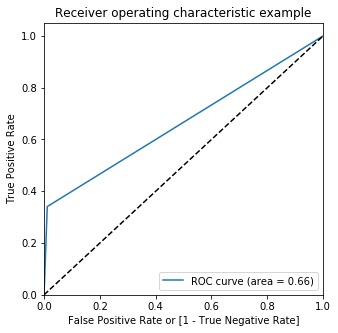

In [168]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.pred_churn)

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  churn_prob  mobile_number  pred_churn  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.037793   7.001327e+09           0    1    0    0    0    0    0   
1      0    0.219851   7.001300e+09           0    1    1    1    0    0    0   
2      0    0.012984   7.000634e+09           0    1    0    0    0    0    0   
3      0    0.074469   7.001591e+09           0    1    0    0    0    0    0   
4      0    0.237575   7.000346e+09           0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083939  1.000000  0.000000
0.1   0.1  0.852697  0.824390  0.855291
0.2   0.2  0.917085  0.639634  0.942508
0.3   0.3  0.929215  0.488415  0.969606
0.4   0.4  0.932286  0.393293  0.981674
0.5   0.5  0.934231  0.340854  0.988602
0.6   0.6  0.935203  0.312805  0.992234
0.7   0.7  0.933565  0.268293  0.994525
0.8   0.8  0.929215  0.185976  0.997318
0.9   0.9  0.919951  0.053049  0.999385


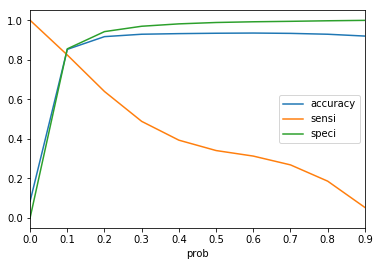

In [171]:
    # Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [172]:
#### From the curve above, 0.13 is the optimum point to take it as a cutoff probability.

In [226]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.13 else 0)

y_train_pred_final.head()

churn  churn_prob  mobile_number  pred_churn  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.037793   7.001327e+09           0    1    0    0    0    0    0   
1      0    0.219851   7.001300e+09           0    1    1    1    0    0    0   
2      0    0.012984   7.000634e+09           0    1    0    0    0    0    0   
3      0    0.074469   7.001591e+09           0    1    0    0    0    0    0   
4      0    0.237575   7.000346e+09           0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                1  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                1

In [227]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.8875012795577848

In [230]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted)

In [231]:
#precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.40988372093023256

In [232]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7737804878048781

In [233]:
from sklearn.metrics import precision_recall_curve

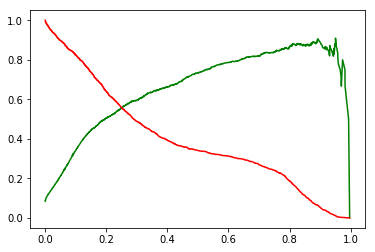

In [234]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.churn_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Prediction Analysis

In [179]:
X_test[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [180]:
X_test = X_test[col]
X_test.head()

offnet_mou_gd_phase  loc_og_mou_gd_phase  std_og_mou_gd_phase  \
mobile_number                                                                  
7.000297e+09              0.213211            -0.626656             0.485133   
7.001646e+09             -0.652873            -0.843276            -0.797155   
7.001171e+09              0.079737             1.324640            -0.761789   
7.001594e+09              1.084326             1.381363            -0.501515   
7.000146e+09             -0.566690            -0.775225             0.367887   

               loc_ic_t2m_mou_gd_phase  std_ic_mou_gd_phase  \
mobile_number                                                 
7.000297e+09                 -0.615998             0.135581   
7.001646e+09                 -0.769537            -0.409080   
7.001171e+09                  0.140019            -0.302116   
7.001594e+09                 -0.467704            -0.341264   
7.000146e+09                 -0.565586            -0.147782   

               onnet_mou_act_phase  loc_og_t2m_mou_act_phase  \
mobile_number                                                  
7.000297e+09             -0.615608                 -0.327207   
7.001646e+09             -0.566738                 -0.777019   
7.001171e+09             -0.076281                  0.986471   
7.001594e+09             -0.536181                  1.420616   
7.000146e+09              0.485833                 -0.755502   

               loc_og_mou_act_phase  std_og_t2m_mou_act_phase  \
mobile_number                                                   
7.000297e+09              -0.761528                 -0.205781   
7.001646e+09              -0.761528                 -0.455861   
7.001171e+09               1.013764                 -0.405487   
7.001594e+09               0.692373                 -0.194825   
7.000146e+09              -0.697762                  0.180667   

               std_ic_t2t_mou_act_phase  std_ic_t2m_mou_act_phase  \
mobile_number                                                       
7.000297e+09                   0.126036                 -0.078480   
7.001646e+09                  -0.252664                 -0.289929   
7.001171e+09                  -0.108328                 -0.019639   
7.001594e+09                   0.176261                 -0.242419   
7.000146e+09                  -0.143658                 -0.067249   

               std_ic_mou_act_phase  last_day_rch_amt_act_phase  \
mobile_number                                                     
7.000297e+09              -0.347039                   -0.750944   
7.001646e+09              -0.347039                    0.080640   
7.001171e+09              -0.071947                    0.654433   
7.001594e+09              -0.121012                   -0.750944   
7.000146e+09              -0.124684                   -0.584627   

               vol_3g_mb_act_phase  monthly_2g_act_phase  \
mobile_number                                              
7.000297e+09             -0.342236             -0.319439   
7.001646e+09             -0.342236             -0.319439   
7.001171e+09             -0.342236             -0.319439   
7.001594e+09             -0.342236             -0.319439   
7.000146e+09             -0.342236             -0.319439   

               Days_btw_last_rech_and_last_month_date_act_phase  
mobile_number                                                    
7.000297e+09                                           0.855152  
7.001646e+09                                           0.138482  
7.001171e+09                                          -0.055378  
7.001594e+09                                          -0.830817  
7.000146e+09                                          -0.830817

In [181]:
X_test_sm = sm.add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [182]:
y_test_pred = log_model.predict(X_test_sm)

In [183]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred.head()

0
mobile_number          
7.000297e+09   0.851322
7.001646e+09   0.139315
7.001171e+09   0.004589
7.001594e+09   0.007242
7.000146e+09   0.071364

In [184]:
y_pred = y_pred.rename(columns={0: 'churn_prob'})

In [185]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
mobile_number       
7.000297e+09       1
7.001646e+09       0
7.001171e+09       0
7.001594e+09       0
7.000146e+09       0

In [186]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [187]:
y_pred_final.head()

churn  churn_prob
mobile_number                   
7.000297e+09       1    0.851322
7.001646e+09       0    0.139315
7.001171e+09       0    0.004589
7.001594e+09       0    0.007242
7.000146e+09       0    0.071364

In [188]:
# resetting the index
y_pred_final.reset_index(inplace=True)
y_pred_final.head()

mobile_number  churn  churn_prob
0   7.000297e+09      1    0.851322
1   7.001646e+09      0    0.139315
2   7.001171e+09      0    0.004589
3   7.001594e+09      0    0.007242
4   7.000146e+09      0    0.071364

In [189]:
y_pred_final['final_predicted'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

mobile_number  churn  churn_prob  final_predicted
0   7.000297e+09      1    0.851322                1
1   7.001646e+09      0    0.139315                0
2   7.001171e+09      0    0.004589                0
3   7.001594e+09      0    0.007242                0
4   7.000146e+09      0    0.071364                0

In [190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9187962741819918

## <font color='brown'> Model Building: Using PCA</font>

## <font color='brown'> Scaling</font>

In [191]:
# taking dataset 'telecom' from an originsal dataset
telecom = df_telecom_original
# removing 'mobile number' and 'churn' columns before scaling
df_original = telecom
df_mob_churn = telecom.loc[:,['mobile_number','churn']]
telecom = telecom.drop(['mobile_number','churn'], axis=1)

# taking dataset 'telecom' from an originsal dataset

# impoting Standard Scaler
import sklearn
from sklearn.preprocessing import StandardScaler
# applying StandardScaler
scaler = StandardScaler()
telecom_scal = scaler.fit_transform(telecom)
telecom_scal

array([[-0.47600248,  3.67260611, -0.59444951, ...,  0.13764664,
        -0.29639176, -0.16743296],
       [-0.97439027, -0.44564607,  0.30621747, ..., -0.6333491 ,
         1.29499997, -0.27595984],
       [ 1.37120483, -0.90434015,  0.09276133, ..., -0.6333491 ,
        -0.35737946, -0.33813146],
       ...,
       [ 1.46228596,  0.1642284 ,  1.12288019, ...,  1.67963813,
         1.56688479,  1.13249497],
       [-0.96108629, -0.5665638 , -0.2328708 , ..., -0.44060016,
        -0.35737946, -0.02851501],
       [-0.80757875, -1.09624855, -0.74983597, ...,  1.29414026,
         3.36109422,  3.93595328]])

In [192]:
# transforming into a Dataframe
telecom_scal = pd.DataFrame(telecom_scal, columns=telecom.columns)
telecom_scal.head()

aon  arpu_gd_phase  onnet_mou_gd_phase  offnet_mou_gd_phase  \
0 -0.476002       3.672606           -0.594450             0.410513   
1 -0.974390      -0.445646            0.306217            -0.876763   
2  1.371205      -0.904340            0.092761            -0.332644   
3 -0.773807      -0.818343           -0.577878            -0.342634   
4 -0.614159      -0.876485            0.900683            -1.049837   

   roam_ic_mou_gd_phase  roam_og_mou_gd_phase  loc_og_t2t_mou_gd_phase  \
0              0.181385             -0.037910                -0.229715   
1             -0.228602             -0.306412                 0.820001   
2              1.154814              0.013160                -0.295208   
3             -0.205266             -0.175302                -0.168960   
4             -0.189351             -0.243887                -0.336108   

   loc_og_t2m_mou_gd_phase  loc_og_t2f_mou_gd_phase  loc_og_t2c_mou_gd_phase  \
0                 1.104453                 3.025000                -0.261254   
1                -0.477049                -0.373246                -0.261254   
2                -0.354421                -0.241686                -0.261254   
3                 0.223451                -0.243425                -0.261254   
4                -0.720369                -0.373246                -0.261254   

   loc_og_mou_gd_phase  std_og_t2t_mou_gd_phase  std_og_t2m_mou_gd_phase  \
0             0.706778                -0.506208                -0.463529   
1             0.235574                -0.158877                -0.558211   
2            -0.426974                 0.282158                -0.093024   
3             0.016524                -0.532945                -0.453966   
4            -0.689160                 1.243144                -0.594469   

   std_og_t2f_mou_gd_phase  std_og_mou_gd_phase  isd_og_mou_gd_phase  \
0                 1.105296            -0.645712            -0.094888   
1                -0.176529            -0.493253            -0.105226   
2                -0.176529             0.134304            -0.105226   
3                -0.176529            -0.687795            -0.105226   
4                -0.176529             0.475837            -0.105226   

   spl_og_mou_gd_phase  og_others_gd_phase  total_og_mou_gd_phase  \
0            -0.262851           -0.241460              -0.169276   
1            -0.407916           -0.241460              -0.338881   
2            -0.407916           -0.241460              -0.166323   
3            -0.302825           -0.241460              -0.671274   
4            -0.324746            0.078099              -0.003112   

   loc_ic_t2t_mou_gd_phase  loc_ic_t2m_mou_gd_phase  loc_ic_t2f_mou_gd_phase  \
0                -0.148021                 0.332227                 2.519262   
1                -0.332912                -0.605163                -0.360070   
2                -0.196721                -0.375975                -0.305462   
3                -0.075101                 0.172675                -0.162642   
4                -0.330109                -0.660873                -0.360070   

   loc_ic_mou_gd_phase  std_ic_t2t_mou_gd_phase  std_ic_t2m_mou_gd_phase  \
0             0.538785                 0.143499                 0.855639   
1            -0.643372                -0.242668                -0.196561   
2            -0.405441                 0.987786                 1.510743   
3             0.056714                 0.935324                 0.161172   
4            -0.679978                -0.178093                -0.334885   

   std_ic_t2f_mou_gd_phase  std_ic_mou_gd_phase  total_ic_mou_gd_phase  \
0                 2.330516             1.034977               0.900522   
1                -0.162347            -0.286583              -0.706643   
2                -0.162347             1.594635               0.834366   
3                -0.147637             0.573991               0.231352   
4                -0.162347            -0.3

## <font color='brown'> Splitting into train and test Datasets</font>

In [193]:
# import library for splitting train and test dataset
from sklearn.model_selection import train_test_split

# Forming X and y Datasets
y = df_mob_churn.loc[:,'churn']
X = telecom_scal

# splitting the Dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

## <font color='brown'> Applying PCA</font>

In [194]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [195]:
# applying PCA on the Dataset
pca = PCA(random_state=42)
first_pca = pca.fit(X_train)
first_pca.explained_variance_ratio_

array([9.62800401e-02, 8.96574651e-02, 7.61068731e-02, 5.49542812e-02,
       4.54072666e-02, 3.82409060e-02, 3.13077196e-02, 2.81817537e-02,
       2.74897444e-02, 2.70050295e-02, 2.62270796e-02, 2.47354849e-02,
       2.34576953e-02, 2.15379373e-02, 2.03812055e-02, 1.86002505e-02,
       1.79206218e-02, 1.73781883e-02, 1.61980634e-02, 1.46903799e-02,
       1.45531387e-02, 1.42686675e-02, 1.27616232e-02, 1.24326688e-02,
       1.19650524e-02, 1.15403226e-02, 1.06872699e-02, 1.04816136e-02,
       1.00182196e-02, 9.18414313e-03, 9.12678892e-03, 8.64228157e-03,
       8.35299040e-03, 8.26420903e-03, 7.97168059e-03, 7.12681673e-03,
       6.87954892e-03, 6.73190334e-03, 6.62184845e-03, 6.06328843e-03,
       5.83897503e-03, 5.74538048e-03, 5.42619572e-03, 5.29769378e-03,
       5.03313038e-03, 4.50639433e-03, 4.36660163e-03, 4.16592457e-03,
       3.93887257e-03, 3.88472515e-03, 3.44406486e-03, 3.32497719e-03,
       3.17680884e-03, 2.95141745e-03, 2.85785565e-03, 2.81184907e-03,
      

#### Plotting a barplot to visualise the variance defined by each  components

<BarContainer object of 91 artists>

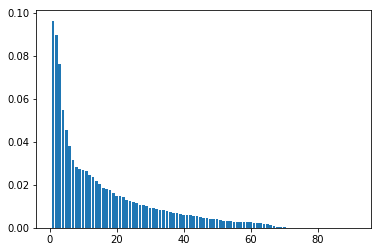

In [196]:
plt.bar(range(1,len(first_pca.explained_variance_ratio_)+1),first_pca.explained_variance_ratio_)

Making a scree plot for the explained variance

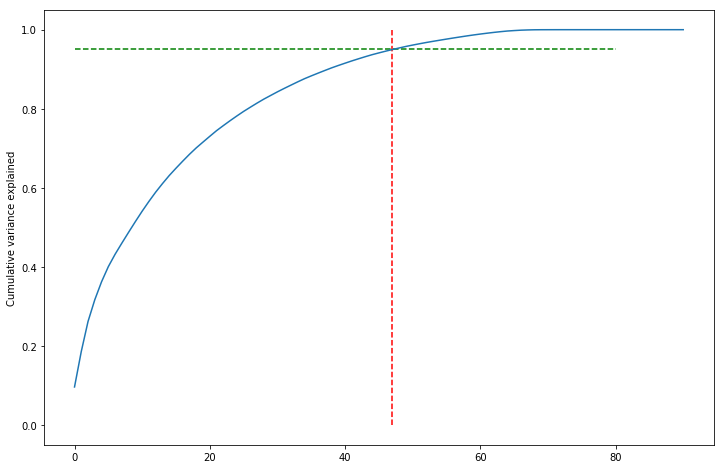

In [197]:
# Defining the cummulative variance ratio varibale
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# plotting the scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=47, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

As we can see almost 95% of the variance could be explained by 48 components

Let us fit the dataset again using pca for the final time, defining components number as 38.

In [198]:
pca_final = IncrementalPCA(n_components=48)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19538, 48)

In [199]:
# applying PCA transformation on test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8374, 48)

In [200]:
cols = []
for x in range(1,49):
    cols.append("PC"+str(x))
df_train = pd.DataFrame(data= df_train_pca, columns= cols)

In [201]:
df_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.135159  1.919765  0.188316 -0.050374 -0.413042  1.574856  0.550544   
1 -1.665490 -3.422200 -2.979774  0.303973  1.479066  0.818706 -0.639385   
2 -4.239045  7.996236  4.187174  2.351618 -0.721957 -0.634702  0.121029   
3  0.052014 -1.040242 -2.011256 -0.933501 -0.553309 -0.348949 -0.006539   
4 -3.279781  0.216064 -0.972256 -0.861938 -0.817477  1.314539  0.757931   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.046711  0.476937  0.230639 -0.196949  0.794374  0.551644 -1.172297   
1 -0.357488  0.983267 -0.816230 -0.114760 -0.320718 -0.199989  0.463946   
2  1.494653 -1.529224 -1.520737 -0.856403  0.552957 -0.403323  1.098762   
3 -0.648798 -0.193101 -0.341734 -0.000944 -0.473387 -0.155905 -0.727655   
4 -1.099212  0.984430  0.137397  0.108839  2.374546  0.940933 -0.834198   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.210256  0.152674 -0.160099  0.127861  0.511230 -0.165216 -0.372746   
1  0.929503 -0.575134 -0.438770  0.061681  0.295801  0.229496  0.669692   
2  0.242919 -0.113594 -0.276976 -0.197146 -0.239339  0.097915  0.434429   
3 -0.357443 -0.233494 -0.329738  0.147166 -0.060316  0.168797 -0.089485   
4  0.119758  0.329765  0.076434  0.318994  0.160581  0.025946 -0.246753   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.474469 -0.564668 -0.066072 -0.290685  0.052985 -0.290087  0.370904   
1 -0.123657  0.240271  0.605554 -0.649582 -0.533957  0.391541 -0.320433   
2  0.368200  0.153252  0.207021  0.717006  0.031402  0.912991  0.783512   
3 -0.646050 -0.271362 -0.302953  0.059263  0.103519 -0.660684 -0.072944   
4 -0.196410 -0.265953 -0.311911  0.661393  0.305256  0.153716  0.087351   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -0.136573 -0.132610 -1.120608  0.313468  0.049131 -0.310408 -0.224696   
1 -0.051629 -0.393363 -0.959739 -0.918902  0.268889 -0.220200  2.285164   
2 -0.491581  0.038204  0.328088  0.935580  0.148983  0.270925  0.720951   
3 -0.417070  1.188497  0.304297  1.572311 -0.777980  0.508778  0.486057   
4 -0.042710 -0.296273  0.106638 -0.624046  0.237543  0.174953 -1.042791   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  0.104933 -0.704783  0.024078 -0.169622  0.723680 -0.485725 -0.022399   
1 -0.388864  1.320327 -1.048906 -1.446529 -0.303957  0.661834 -0.658546   
2 -0.364749 -0.312517 -0.324458  0.365585  0.742490  0.369715 -0.510380   
3 -0.226163 -0.139124 -0.269861 -0.595397  0.109508  0.022783 -0.382881   
4  0.150360  0.331885 -0.047838 -0.216121  0.103865 -1.291992  0.933879   

       PC43      PC44      PC45      PC46      PC47      PC48  
0  0.290348 -0.301624  0.059687  0.000247 -0.215181 -0.274413  
1  0.184364  0.158973 -0.041725  2.311751 -0.622226  0.507731  
2  0.198382 -0.059590 -0.266533 -0.030430 -0.547154 -0.453477  
3  0.187546  0.189373 -0.125820  0.493429 -0.051893 -0.095252  
4  0.051111  0.024681 -0.023024 -0.081257  0.206326  0.079241

*******************************************************************************************************************************************

## <font color='brown'>Logistic Regression: Using PCA</font>

#### Applying logistic regression on the data on our Principal components

In [202]:
# importing Logistic regression library
from sklearn.linear_model import LogisticRegression
# Using class_weight as 'balanced' to take care of the imbalance present in the Data
lr_pca = LogisticRegression(class_weight='balanced')
model_pca = lr_pca.fit(df_train, y_train)

In [203]:
model_pca.score(df_train,y_train)

0.8339133995291227

Making predictions on the test set

In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from imblearn.metrics import sensitivity_specificity_support
# predict churn on test data
y_pred = model_pca.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_pca.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Using TensorFlow backend.


[[6320 1315]
 [ 135  604]]
Sensitivity: 	0.82
Specificity: 	0.83
AUC:    	 0.88


<font color='blue' size=4>We obtained an Accuracy of 89.93% by running the Logistic Regression model using PCA.</font>

***********************************************************************************************************************************************

## <font color='brown'> Random Forest: Using PCA</font>

#### Applying Random Forest on the data on our Principal components

In [207]:
# importing all the necessary libraries for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

# hyperparameter space
params = {"criterion": ['gini', 'entropy']}

# create 5 folds
folds = 5

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='accuracy',)

In [208]:
# fit model
model.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                       

In [209]:
# predict churn on test data
y_pred = model.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7568   67]
 [ 588  151]]
Sensitivity: 	0.2
Specificity: 	0.99
AUC:    	 0.89


<font color='blue' size=4> We have got a good 'Specificity' and 'AUC' score, but the 'Sensitivity' is too low. Hence we need to do 'Hyperparameter Tuning'</font>

## <font color='brown'> Hyperparameter Tuning</font>
#### Tuning Max_depth

In [210]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 80, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(df_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

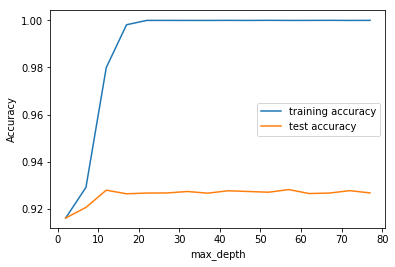

In [211]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color='blue' size=4>28 is the optimal value for this parameter.</font>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [212]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

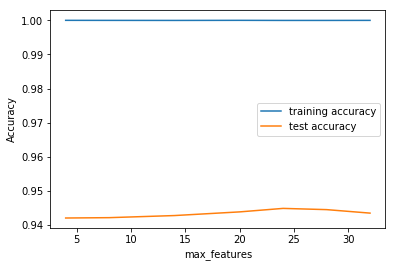

In [213]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<font color='blue' size=4>20 is the optimal value for this parameter.</font>

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [214]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(0, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

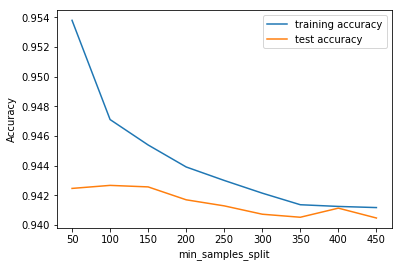

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color='blue' size=4>50 is the optimal value for this parameter.</font>

**Fitting the final model with the best parameters obtained from grid search.**

In [216]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=28,
                             min_samples_leaf=40, 
                             min_samples_split=20,
                             max_features=20,
                             n_estimators=100)
# fit
model = rfc.fit(df_train,y_train)

In [217]:
# predict churn on test data
y_pred = model.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7575   60]
 [ 600  139]]
Sensitivity: 	0.19
Specificity: 	0.99
AUC:    	 0.89


<font color='blue' size=4>We obtained an AUC score of 89%, but a very low 'Sensitivity' from the Random Forest Model.</font>

# Conclusions

We did analysis and found out few variable that having significance role in creating the model and  tell us which customer are more likely to churn.
We have divided the data into two phase i.e. good phase and action phase.
Good phase compromising of two months and action contains one month.
Variable are affecting positive as well as negatively with coefficent value.
List below are variable with meaning and action items that help Network T to avoid churning.

1. total_ic_mou_gd_phase (Total Incoming minutes of usage in good phase) :
In a goodphase if customer having high incoming minute usage, probably consumer is using it for imcoming call, there company must reach out to him.
2. loc_ic_mou_act_phase (local Incoming minutes of usage action phase):
Local incoming usage is another factor that is affecting churn.
3. total_rech_amt_diff (The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.)
4. vol_3g_mb_act_phase (3g data used in action phase):
Reduction in volumes of data consumes by user may likely to churn.
6. monthly_3g_act_phase (monthly 3g recharge count in action phase )
If no. of recharges id dropping then customer is likely to churn.
7. std_og_t2m_mou_act_phase(std outgoing from operator t to other network customer in action phase)
Dropping in minutes of usage of STD outgoing call may results in churn.
8. offnet_mou_gd_phase( call outside network minutes of ussage in good phase)
call outside network minutes of ussage reduction in good phase will affect and increase churn probability.
9. std_ic_t2m_mou_act_phase(std incoming calling to other minutes of usage in action phase).
10. onnet_mou_act/gd (All kind of call within the same network - minutes of usage) :
If the consumer call reduces call within same network is a not good sign, churn in action phase but works opposite in good phase. 


## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* The company should try to improve their services on the regions where they are facing huge churns.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 